In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = False

apply_scaffold_split = True

create_new_data = False

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "GNN"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_regression_random_gnn/model_gnn_conv"
    else:
        filename_basic = "results_regression_random_fp/model_fp"
else:
    if not use_fingerprints:
        filename_basic = "results_regression_scaffold_gnn/model_gnn_conv"
    else:
        filename_basic = "results_regression_scaffold_fp/model_fp"

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [6]:
param_combinations = dict()

hidden_channels_list = [[64], [256], [512]]
linear_sizes_list = [[], [512], [512, 256]]
gcn_layers_list = [1, 2, 3, 4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:
batch_size = 64

In [10]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [2, 3]
    param_combinations_fp["fpSize"] = [1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [11]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [12]:
print(len(combinations))

108


run: 0
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F56169E3D0>, <dgl.data.utils.Subset object at 0x000002F5666B7940>, <dgl.data.utils.Subset object at 0x000002F5666B7BB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  769


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 10.245486164093018 | Validation Loss 9.414766788482666
Epoch 10 | Train Loss 3.849641434351603 | Validation Loss 4.771497964859009
Epoch 20 | Train Loss 3.633398485183716 | Validation Loss 4.543305158615112
Epoch 30 | Train Loss 3.4766549110412597 | Validation Loss 4.523425817489624
Epoch 40 | Train Loss 3.339778693517049 | Validation Loss 4.411806106567383
Epoch 50 | Train Loss 3.5214232842127484 | Validation Loss 4.129918694496155
Epoch 60 | Train Loss 3.2416025002797446 | Validation Loss 4.248782396316528
Epoch 70 | Train Loss 2.9120702385902404 | Validation Loss 4.1452189683914185
Epoch 80 | Train Loss 2.816925279299418 | Validation Loss 4.371139287948608
Epoch 90 | Train Loss 2.808077510197957 | Validation Loss 4.2445409297943115
Epoch 100 | Train Loss 2.6306906859079997 | Validation Loss 4.247758150100708
Epoch 110 | Train Loss 2.606770881017049 | Validation Loss 4.2427321672439575
Epoch 120 | Train Loss 2.6311336517333985 | Validation Loss 3.9053685665130615

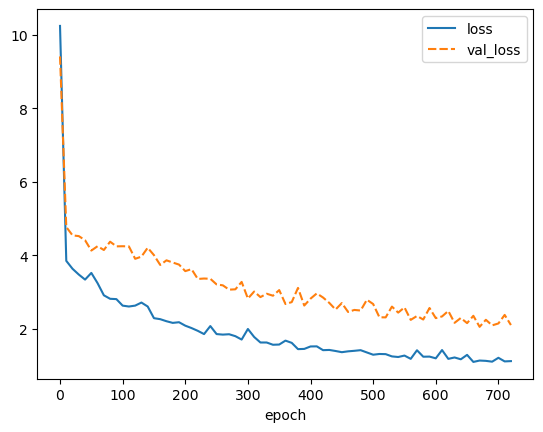

best weights loaded


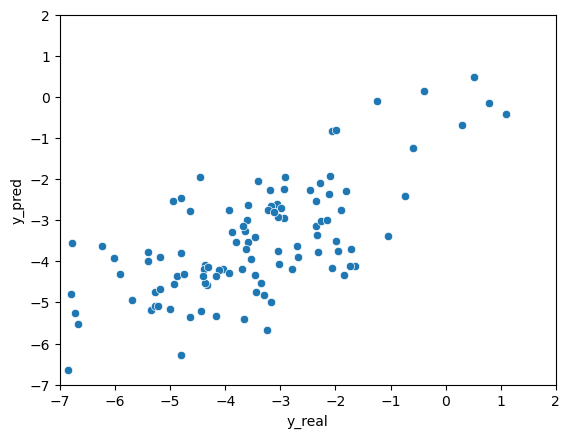

elapsed time: 128.49914526939392
run: 1
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5660B5A60>, <dgl.data.utils.Subset object at 0x000002F5D5E98CD0>, <dgl.data.utils.Subset object at 0x000002F5D5E98F40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  705
Epoch 0 | Train Loss 11.289174588521321 | Validation Loss 12.230501651763916


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 4.094536399841308 | Validation Loss 5.039335608482361
Epoch 20 | Train Loss 3.952411715189616 | Validation Loss 4.7384021282196045
Epoch 30 | Train Loss 3.845433266957601 | Validation Loss 4.418507218360901
Epoch 40 | Train Loss 3.5962141036987303 | Validation Loss 4.57303524017334
Epoch 50 | Train Loss 3.6803650697072348 | Validation Loss 4.301961064338684
Epoch 60 | Train Loss 3.3646756331125895 | Validation Loss 4.298018455505371
Epoch 70 | Train Loss 3.3659361521402995 | Validation Loss 4.296051502227783
Epoch 80 | Train Loss 3.351941204071045 | Validation Loss 4.285735845565796
Epoch 90 | Train Loss 3.144792373975118 | Validation Loss 4.322989463806152
Epoch 100 | Train Loss 2.942635456720988 | Validation Loss 4.266013026237488
Epoch 110 | Train Loss 2.8438491145769755 | Validation Loss 4.260072469711304
Epoch 120 | Train Loss 2.992737404505412 | Validation Loss 4.231152653694153
Epoch 130 | Train Loss 2.900094668070475 | Validation Loss 4.099986791610718
Epo

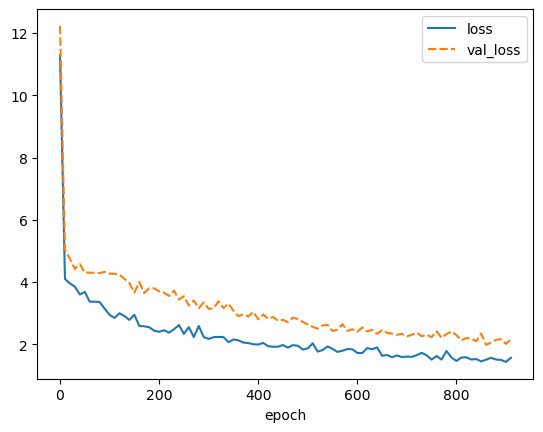

best weights loaded


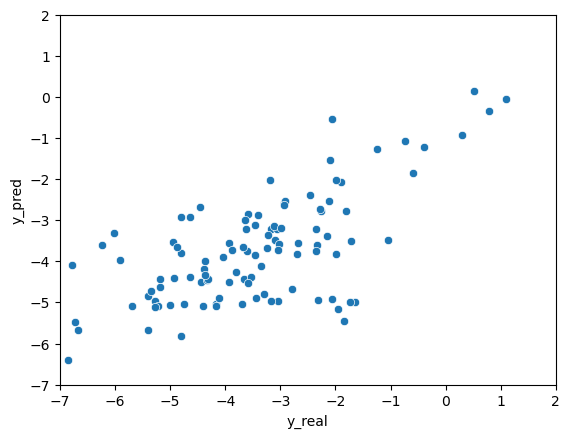

elapsed time: 156.16203999519348
run: 2
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566183040>, <dgl.data.utils.Subset object at 0x000002F5D5E98F70>, <dgl.data.utils.Subset object at 0x000002F5660E4CD0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  705


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 14.800938987731934 | Validation Loss 16.396684646606445
Epoch 10 | Train Loss 4.104070123036703 | Validation Loss 5.205287456512451
Epoch 20 | Train Loss 3.8781524181365965 | Validation Loss 5.124354124069214
Epoch 30 | Train Loss 3.598211574554443 | Validation Loss 4.900841236114502
Epoch 40 | Train Loss 3.3880948861440023 | Validation Loss 4.585355758666992
Epoch 50 | Train Loss 3.5798471927642823 | Validation Loss 4.23891282081604
Epoch 60 | Train Loss 3.2596595764160154 | Validation Loss 4.31355094909668
Epoch 70 | Train Loss 3.2721052805582684 | Validation Loss 4.22596800327301
Epoch 80 | Train Loss 3.1556920846303305 | Validation Loss 4.290089130401611
Epoch 90 | Train Loss 3.105971686045329 | Validation Loss 4.21259617805481
Epoch 100 | Train Loss 3.076427936553955 | Validation Loss 4.392581582069397
Epoch 110 | Train Loss 3.3886216481526694 | Validation Loss 4.21940815448761
Epoch 120 | Train Loss 2.786616766452789 | Validation Loss 4.342534184455872
Epoch 

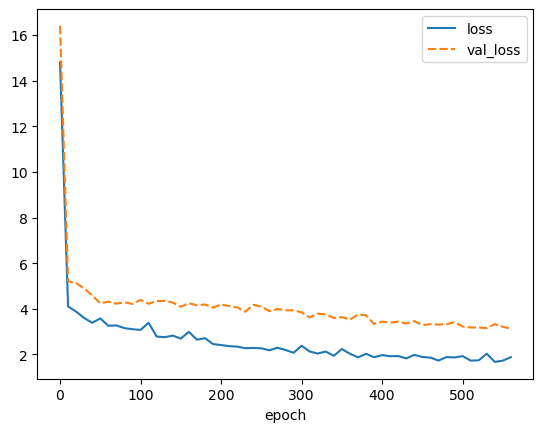

best weights loaded


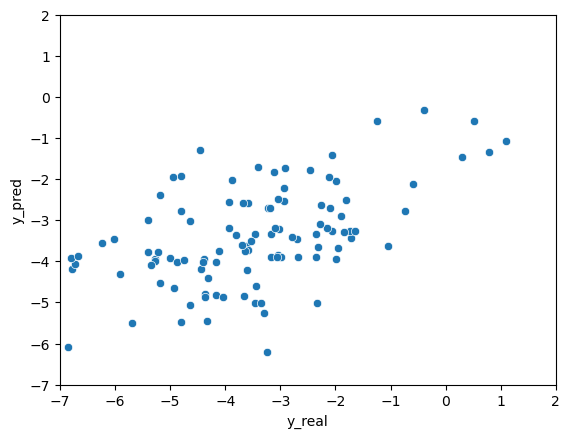

elapsed time: 94.45434260368347
run: 3
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F56639EE80>, <dgl.data.utils.Subset object at 0x000002F5D5FBC490>, <dgl.data.utils.Subset object at 0x000002F5D6FC9160>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  4929


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 13.508611488342286 | Validation Loss 10.779491901397705
Epoch 10 | Train Loss 3.7376850128173826 | Validation Loss 4.994014501571655
Epoch 20 | Train Loss 3.256449055671692 | Validation Loss 4.528707265853882
Epoch 30 | Train Loss 3.1891316095987956 | Validation Loss 4.206230640411377
Epoch 40 | Train Loss 3.0186379750569663 | Validation Loss 4.05278754234314
Epoch 50 | Train Loss 2.529063097635905 | Validation Loss 4.089494228363037
Epoch 60 | Train Loss 2.3568124373753867 | Validation Loss 4.410592317581177
Epoch 70 | Train Loss 2.380744942029317 | Validation Loss 3.661787509918213
Epoch 80 | Train Loss 1.9658466617266337 | Validation Loss 3.738785743713379
Epoch 90 | Train Loss 1.904204281171163 | Validation Loss 3.2950711250305176
Epoch 100 | Train Loss 1.8396073897679648 | Validation Loss 2.9966481924057007
Epoch 110 | Train Loss 2.040344993273417 | Validation Loss 3.0021493434906006
Epoch 120 | Train Loss 1.6905151685078939 | Validation Loss 3.202425360679626

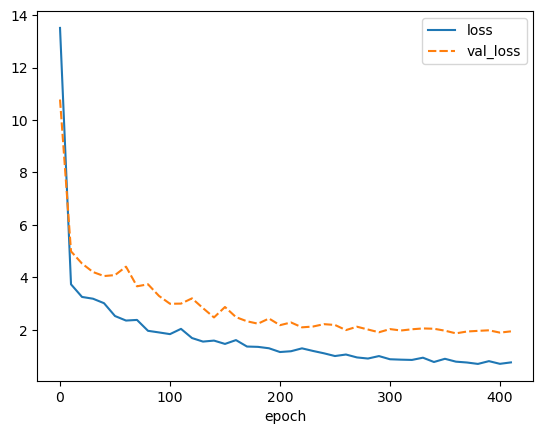

best weights loaded


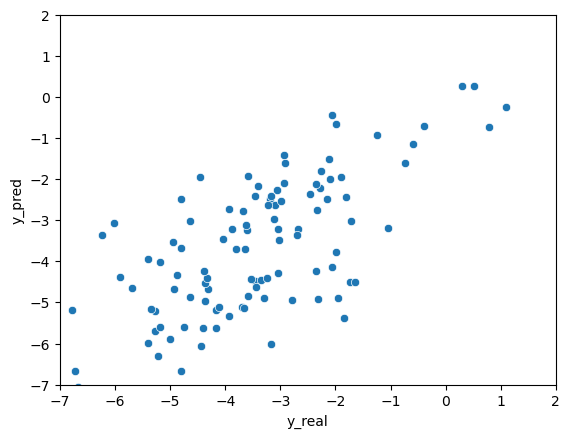

elapsed time: 90.37868976593018
run: 4
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566122790>, <dgl.data.utils.Subset object at 0x000002F5D5E0FB80>, <dgl.data.utils.Subset object at 0x000002F5D5E0F460>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  4865
Epoch 0 | Train Loss 6.785741313298543 | Validation Loss 5.889253616333008


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.7646498044331866 | Validation Loss 4.72131085395813
Epoch 20 | Train Loss 3.4144665161768595 | Validation Loss 4.262749195098877
Epoch 30 | Train Loss 3.4425427754720053 | Validation Loss 4.220305919647217
Epoch 40 | Train Loss 3.2247940858205157 | Validation Loss 4.406778335571289
Epoch 50 | Train Loss 2.7240519086519877 | Validation Loss 4.193254470825195
Epoch 60 | Train Loss 3.0228676160176593 | Validation Loss 3.8982547521591187
Epoch 70 | Train Loss 2.4627180337905883 | Validation Loss 4.048707604408264
Epoch 80 | Train Loss 2.559419584274292 | Validation Loss 3.6419901847839355
Epoch 90 | Train Loss 2.4355833212534588 | Validation Loss 3.6620630025863647
Epoch 100 | Train Loss 2.129523817698161 | Validation Loss 3.561252236366272
Epoch 110 | Train Loss 2.2281705220540364 | Validation Loss 3.279687523841858
Epoch 120 | Train Loss 2.089461835225423 | Validation Loss 3.2396823167800903
Epoch 130 | Train Loss 2.0679917335510254 | Validation Loss 3.07980322837

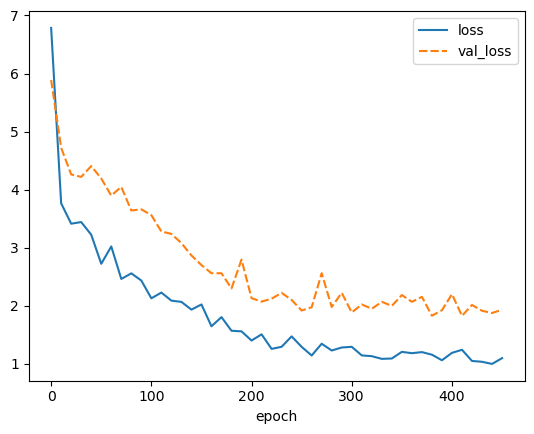

best weights loaded


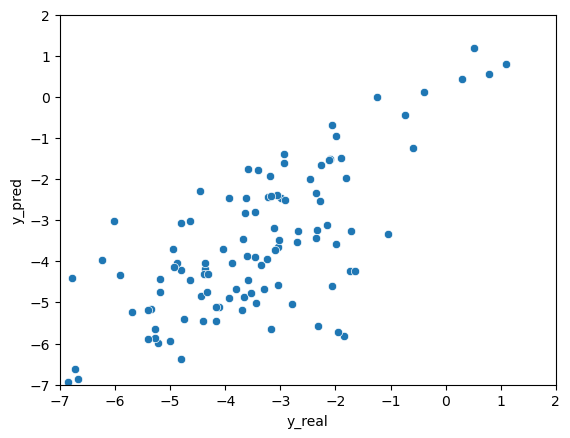

elapsed time: 104.78479027748108
run: 5
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566308C10>, <dgl.data.utils.Subset object at 0x000002F5D5F28970>, <dgl.data.utils.Subset object at 0x000002F5D5F28BE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  4865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.2477401415506995 | Validation Loss 5.920195817947388
Epoch 10 | Train Loss 3.620550028483073 | Validation Loss 4.756272315979004
Epoch 20 | Train Loss 3.294975233078003 | Validation Loss 4.107821941375732
Epoch 30 | Train Loss 3.1450576464335125 | Validation Loss 4.019503712654114
Epoch 40 | Train Loss 2.89953875541687 | Validation Loss 4.242730736732483
Epoch 50 | Train Loss 2.6579350312550862 | Validation Loss 3.985804796218872
Epoch 60 | Train Loss 2.2139914512634276 | Validation Loss 4.027029395103455
Epoch 70 | Train Loss 2.2797868569691975 | Validation Loss 3.5019490718841553
Epoch 80 | Train Loss 2.0268240292867024 | Validation Loss 3.477156400680542
Epoch 90 | Train Loss 2.0189749081929524 | Validation Loss 3.186233162879944
Epoch 100 | Train Loss 1.6052252372105917 | Validation Loss 3.1896743774414062
Epoch 110 | Train Loss 1.770095737775167 | Validation Loss 3.1627864837646484
Epoch 120 | Train Loss 1.526206910610199 | Validation Loss 2.8434319496154785

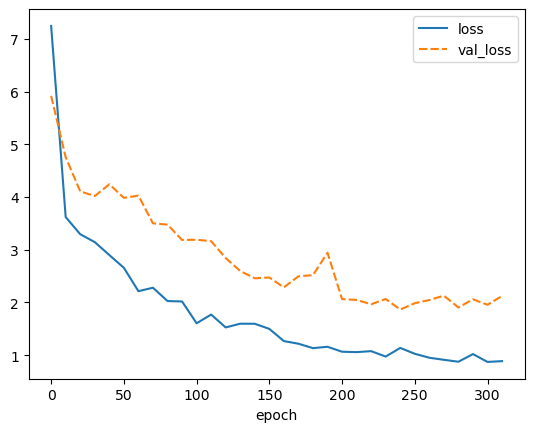

best weights loaded


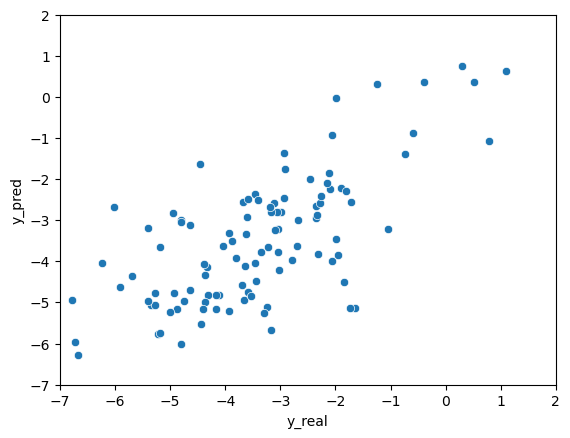

elapsed time: 61.545782804489136
run: 6
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566530DC0>, <dgl.data.utils.Subset object at 0x000002F5663AEAC0>, <dgl.data.utils.Subset object at 0x000002F5663AEF70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  9089


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.353042395909627 | Validation Loss 5.341078758239746
Epoch 10 | Train Loss 3.723142210642497 | Validation Loss 4.444480895996094
Epoch 20 | Train Loss 3.3823254903157554 | Validation Loss 4.152070999145508
Epoch 30 | Train Loss 2.7994486490885415 | Validation Loss 3.7806293964385986
Epoch 40 | Train Loss 2.2550918181737263 | Validation Loss 3.758775234222412
Epoch 50 | Train Loss 2.4497951666514077 | Validation Loss 3.1971601247787476
Epoch 60 | Train Loss 1.7633214155832926 | Validation Loss 3.0713526010513306
Epoch 70 | Train Loss 1.6128611326217652 | Validation Loss 3.0864930152893066
Epoch 80 | Train Loss 1.4963276704152426 | Validation Loss 2.6783560514450073
Epoch 90 | Train Loss 1.7033564408620199 | Validation Loss 2.37494033575058
Epoch 100 | Train Loss 1.3775328397750854 | Validation Loss 2.704307198524475
Epoch 110 | Train Loss 1.2292208790779113 | Validation Loss 2.037241280078888
Epoch 120 | Train Loss 1.1958197037378946 | Validation Loss 1.95963239669

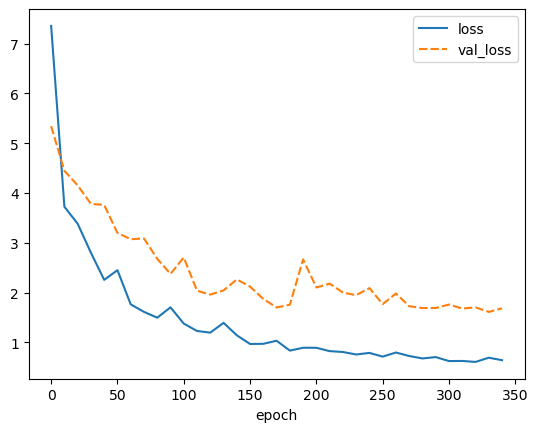

best weights loaded


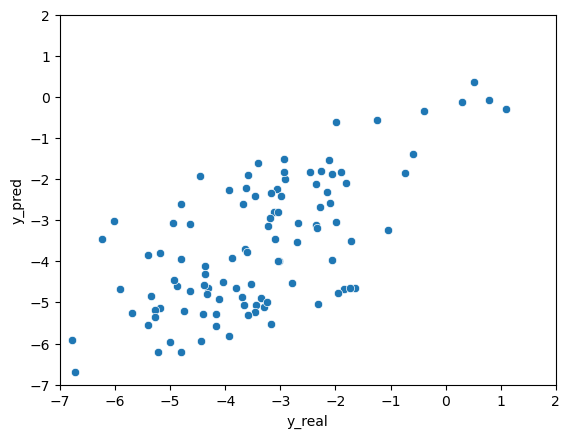

elapsed time: 86.5464231967926
run: 7
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566557910>, <dgl.data.utils.Subset object at 0x000002F566314640>, <dgl.data.utils.Subset object at 0x000002F566314D00>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  9025


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.919505087534587 | Validation Loss 4.915143966674805
Epoch 10 | Train Loss 3.801771291097005 | Validation Loss 4.6242698431015015
Epoch 20 | Train Loss 3.628612009684245 | Validation Loss 4.592833518981934
Epoch 30 | Train Loss 3.4186704953511557 | Validation Loss 4.299367189407349
Epoch 40 | Train Loss 2.875413242975871 | Validation Loss 4.164515256881714
Epoch 50 | Train Loss 2.524122428894043 | Validation Loss 4.257638573646545
Epoch 60 | Train Loss 2.246767290433248 | Validation Loss 4.104982376098633
Epoch 70 | Train Loss 1.9866862773895264 | Validation Loss 3.6002432107925415
Epoch 80 | Train Loss 1.806011160214742 | Validation Loss 2.7635159492492676
Epoch 90 | Train Loss 1.6671919385592142 | Validation Loss 4.1007561683654785
Epoch 100 | Train Loss 1.609346361955007 | Validation Loss 2.1547630429267883
Epoch 110 | Train Loss 1.3495384295781454 | Validation Loss 2.7786046266555786
Epoch 120 | Train Loss 1.3452325145403543 | Validation Loss 1.987458646297454

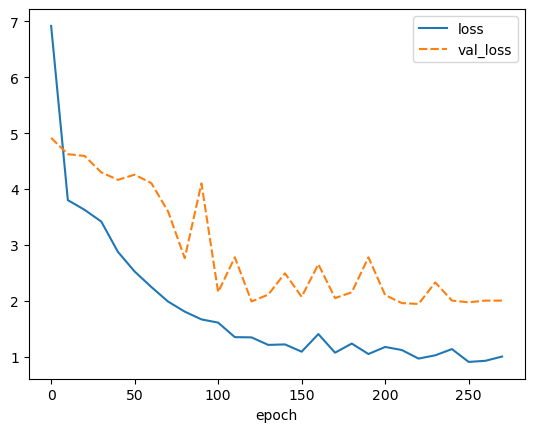

best weights loaded


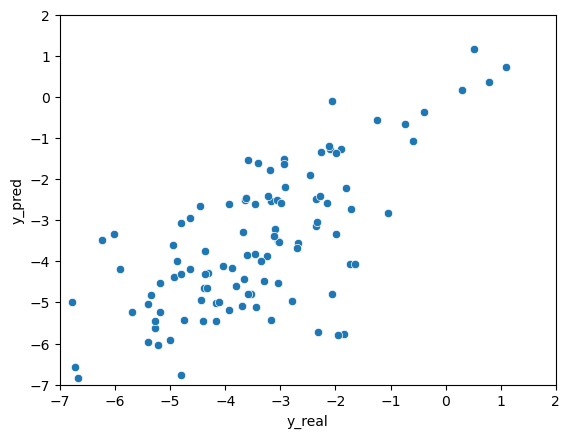

elapsed time: 56.688167095184326
run: 8
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5666355B0>, <dgl.data.utils.Subset object at 0x000002F5D7130850>, <dgl.data.utils.Subset object at 0x000002F5D7130AC0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  9025


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.587383302052816 | Validation Loss 6.250943422317505
Epoch 10 | Train Loss 3.758803113301595 | Validation Loss 4.721818447113037
Epoch 20 | Train Loss 3.1692336718241374 | Validation Loss 4.020096778869629
Epoch 30 | Train Loss 2.279000812768936 | Validation Loss 3.945570230484009
Epoch 40 | Train Loss 2.0957769711812335 | Validation Loss 3.4258311986923218
Epoch 50 | Train Loss 1.8645179510116576 | Validation Loss 3.335711717605591
Epoch 60 | Train Loss 1.5630559225877125 | Validation Loss 2.7151434421539307
Epoch 70 | Train Loss 1.3966391722361247 | Validation Loss 2.506892442703247
Epoch 80 | Train Loss 1.435432747999827 | Validation Loss 2.2425990104675293
Epoch 90 | Train Loss 1.1652323325475058 | Validation Loss 2.1319350600242615
Epoch 100 | Train Loss 1.080753711859385 | Validation Loss 1.978590488433838
Epoch 110 | Train Loss 0.9931543906529744 | Validation Loss 1.9215730428695679
Epoch 120 | Train Loss 1.0997288982073465 | Validation Loss 1.8960609436035

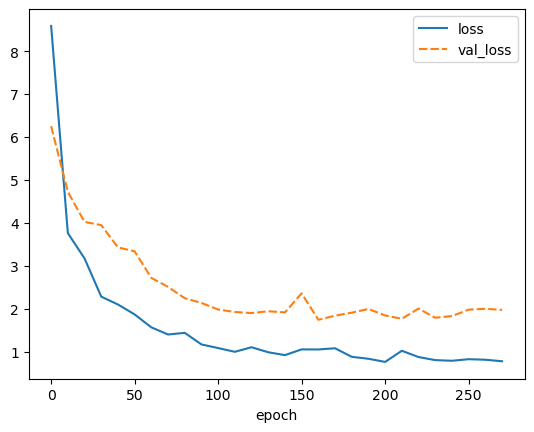

best weights loaded


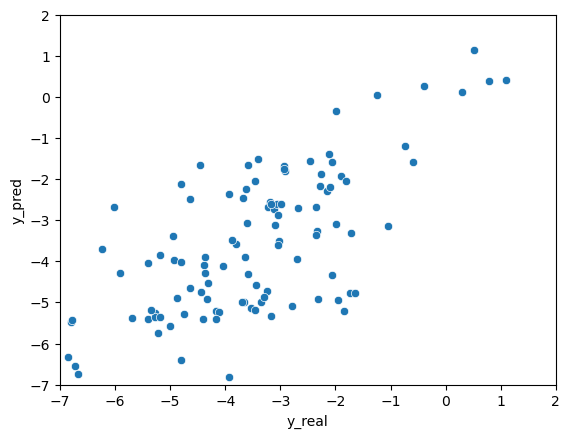

elapsed time: 52.41968894004822
run: 9
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566431A30>, <dgl.data.utils.Subset object at 0x000002F56609CC70>, <dgl.data.utils.Subset object at 0x000002F56609C9D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13249


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.921478621164957 | Validation Loss 4.510210275650024
Epoch 10 | Train Loss 3.3805695533752442 | Validation Loss 4.363311052322388
Epoch 20 | Train Loss 2.355951356887817 | Validation Loss 3.4191945791244507
Epoch 30 | Train Loss 1.7847785671552023 | Validation Loss 2.8857754468917847
Epoch 40 | Train Loss 1.9688591639200845 | Validation Loss 3.9817118644714355
Epoch 50 | Train Loss 1.4329816738764445 | Validation Loss 2.658511996269226
Epoch 60 | Train Loss 1.3411994457244873 | Validation Loss 2.3153860569000244
Epoch 70 | Train Loss 1.6111612955729167 | Validation Loss 1.9351863861083984
Epoch 80 | Train Loss 1.0995673934618633 | Validation Loss 2.071333408355713
Epoch 90 | Train Loss 1.298766303062439 | Validation Loss 2.547992467880249
Epoch 100 | Train Loss 1.2340537707010906 | Validation Loss 2.247682809829712
Epoch 110 | Train Loss 0.9383288939793905 | Validation Loss 2.1889787912368774
Epoch 120 | Train Loss 0.9245374798774719 | Validation Loss 1.8890631198

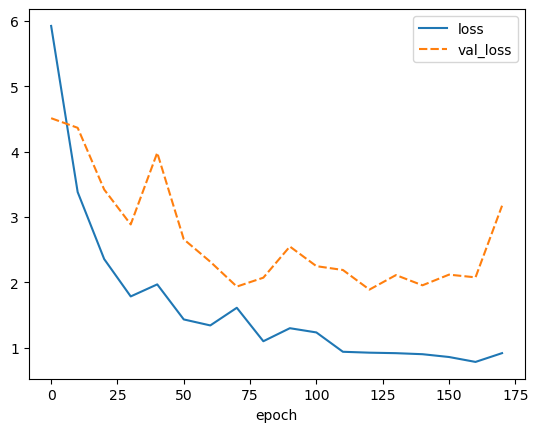

best weights loaded


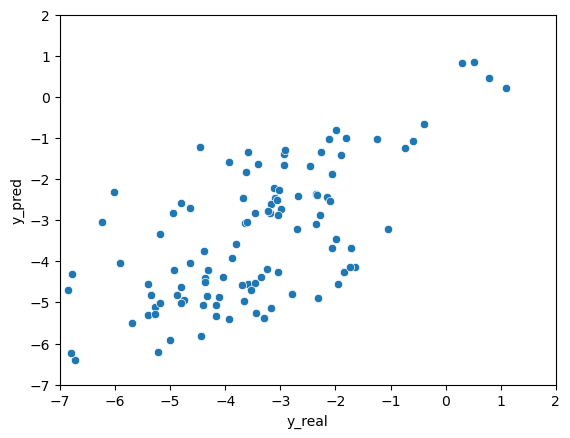

elapsed time: 40.243985414505005
run: 10
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F56658A6D0>, <dgl.data.utils.Subset object at 0x000002F5D5E58250>, <dgl.data.utils.Subset object at 0x000002F5D5E584C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  13185


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.290584421157837 | Validation Loss 5.226559162139893
Epoch 10 | Train Loss 3.965909465154012 | Validation Loss 5.0882885456085205
Epoch 20 | Train Loss 3.647536770502726 | Validation Loss 4.864617824554443
Epoch 30 | Train Loss 2.9269301573435467 | Validation Loss 4.38711416721344
Epoch 40 | Train Loss 2.6170370101928713 | Validation Loss 4.0303672552108765
Epoch 50 | Train Loss 2.091901977856954 | Validation Loss 3.58904492855072
Epoch 60 | Train Loss 2.126119303703308 | Validation Loss 3.5741915702819824
Epoch 70 | Train Loss 1.880405863126119 | Validation Loss 4.148447751998901
Epoch 80 | Train Loss 1.5804246584574382 | Validation Loss 2.3848456144332886
Epoch 90 | Train Loss 2.2510775963465375 | Validation Loss 2.2185349464416504
Epoch 100 | Train Loss 1.461655561129252 | Validation Loss 2.1887952089309692
Epoch 110 | Train Loss 1.3518333594004313 | Validation Loss 3.130659580230713
Epoch 120 | Train Loss 1.2972294767697652 | Validation Loss 2.1959877014160156

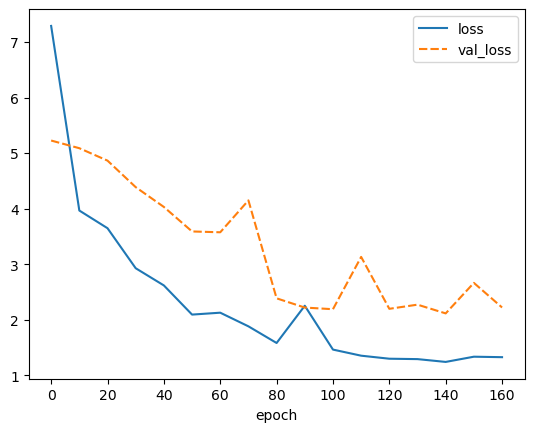

best weights loaded


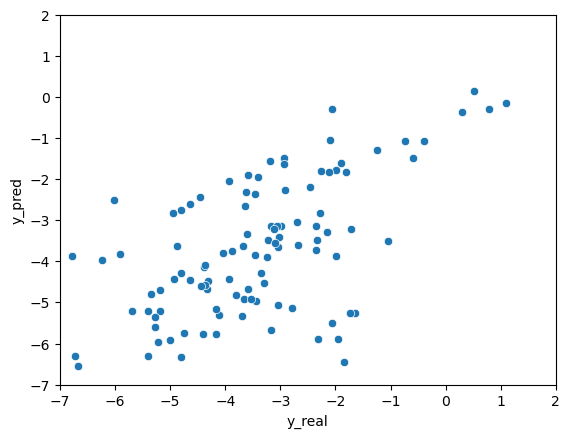

elapsed time: 34.33989214897156
run: 11
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5660FA700>, <dgl.data.utils.Subset object at 0x000002F5663AE1C0>, <dgl.data.utils.Subset object at 0x000002F5D5F19910>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  13185


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.127731688817342 | Validation Loss 7.699792861938477
Epoch 10 | Train Loss 3.5541234811147056 | Validation Loss 4.588324785232544
Epoch 20 | Train Loss 3.655987517038981 | Validation Loss 4.274340867996216
Epoch 30 | Train Loss 3.057891082763672 | Validation Loss 4.022332668304443
Epoch 40 | Train Loss 2.552776543299357 | Validation Loss 4.726775169372559
Epoch 50 | Train Loss 1.978678790728251 | Validation Loss 4.193328380584717
Epoch 60 | Train Loss 2.189159401257833 | Validation Loss 3.059415817260742
Epoch 70 | Train Loss 1.6883602062861125 | Validation Loss 4.33666455745697
Epoch 80 | Train Loss 1.5290675560633342 | Validation Loss 2.7022074460983276
Epoch 90 | Train Loss 1.5632382849852244 | Validation Loss 2.4961503744125366
Epoch 100 | Train Loss 1.379669431845347 | Validation Loss 2.2695045471191406
Epoch 110 | Train Loss 1.3791696190834046 | Validation Loss 2.6867352724075317
Epoch 120 | Train Loss 1.2946308453877766 | Validation Loss 2.085326135158539
E

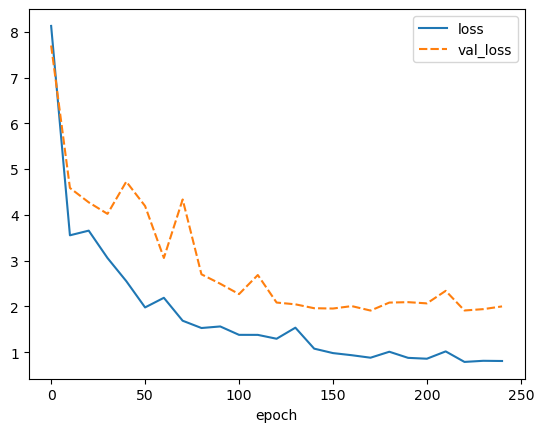

best weights loaded


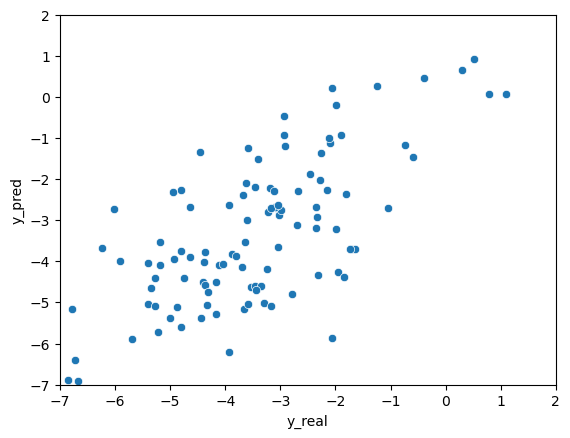

elapsed time: 54.50554823875427
run: 12
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5661E4EE0>, <dgl.data.utils.Subset object at 0x000002F5D5E88340>, <dgl.data.utils.Subset object at 0x000002F5D5E885B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  769
Epoch 0 | Train Loss 11.262166976928711 | Validation Loss 12.052473068237305


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.9964651584625246 | Validation Loss 5.144157648086548
Epoch 20 | Train Loss 3.844138765335083 | Validation Loss 4.660155773162842
Epoch 30 | Train Loss 3.549137798945109 | Validation Loss 4.585339546203613
Epoch 40 | Train Loss 3.295359754562378 | Validation Loss 4.308596849441528
Epoch 50 | Train Loss 3.2446205774943033 | Validation Loss 4.295367002487183
Epoch 60 | Train Loss 3.0894501487414043 | Validation Loss 4.35063910484314
Epoch 70 | Train Loss 3.0198440392812094 | Validation Loss 4.321800947189331
Epoch 80 | Train Loss 3.1047065099080404 | Validation Loss 4.311952590942383
Epoch 90 | Train Loss 3.0570355892181396 | Validation Loss 4.232468843460083
Epoch 100 | Train Loss 2.7083837588628135 | Validation Loss 4.320201992988586
Epoch 110 | Train Loss 2.7114588658014935 | Validation Loss 4.249383449554443
Epoch 120 | Train Loss 2.7589351495107013 | Validation Loss 4.33000373840332
Epoch 130 | Train Loss 2.8634154081344603 | Validation Loss 4.05245304107666
E

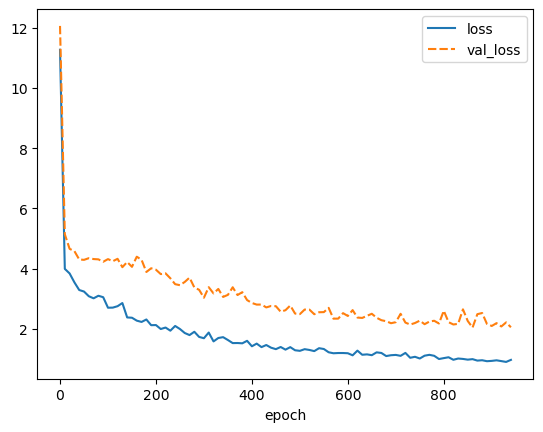

best weights loaded


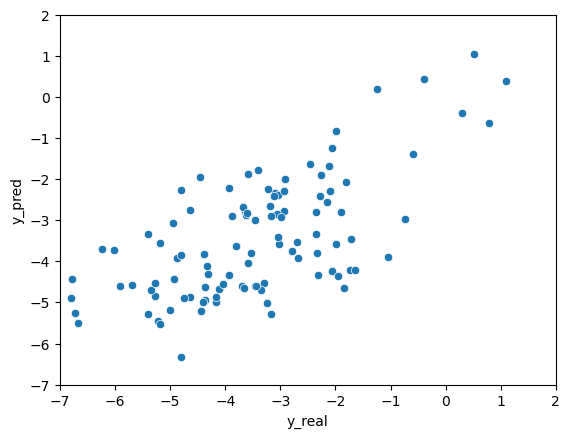

elapsed time: 142.33368277549744
run: 13
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F522F14D90>, <dgl.data.utils.Subset object at 0x000002F5D7165220>, <dgl.data.utils.Subset object at 0x000002F5D7165970>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  705
Epoch 0 | Train Loss 7.0790145556132 | Validation Loss 8.506663799285889


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.894130309422811 | Validation Loss 5.4193830490112305
Epoch 20 | Train Loss 3.619435175259908 | Validation Loss 4.770029067993164
Epoch 30 | Train Loss 3.617029841740926 | Validation Loss 4.492410898208618
Epoch 40 | Train Loss 3.558494512240092 | Validation Loss 4.318184733390808
Epoch 50 | Train Loss 3.920826244354248 | Validation Loss 4.563369035720825
Epoch 60 | Train Loss 3.7898998896280927 | Validation Loss 4.432820081710815
Epoch 70 | Train Loss 3.2253038267294567 | Validation Loss 4.277888536453247
Epoch 80 | Train Loss 3.6214821656545 | Validation Loss 4.12905490398407
Epoch 90 | Train Loss 3.162582023938497 | Validation Loss 4.32077431678772
Epoch 100 | Train Loss 3.049921735127767 | Validation Loss 4.217115879058838
Epoch 110 | Train Loss 3.016124971707662 | Validation Loss 4.352018713951111
Epoch 120 | Train Loss 3.012409480412801 | Validation Loss 4.353133201599121
Epoch 130 | Train Loss 3.0059459686279295 | Validation Loss 4.366026401519775
Epoch 14

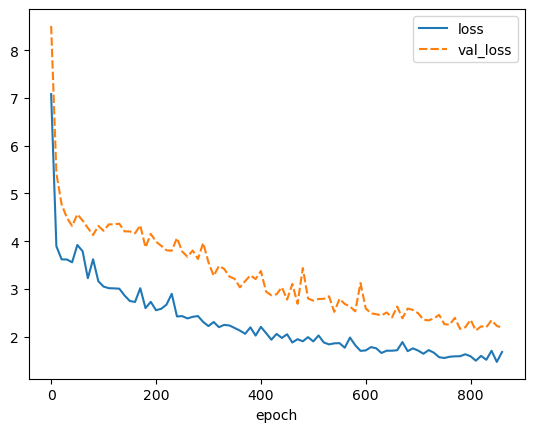

best weights loaded


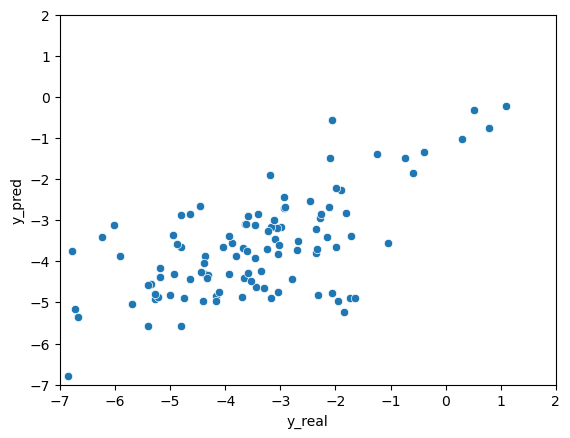

elapsed time: 123.71207189559937
run: 14
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5DEC0D0>, <dgl.data.utils.Subset object at 0x000002F566338E80>, <dgl.data.utils.Subset object at 0x000002F566338F70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  705
Epoch 0 | Train Loss 6.242615040143331 | Validation Loss 8.081978797912598


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.792132043838501 | Validation Loss 5.149878025054932
Epoch 20 | Train Loss 3.700554196039836 | Validation Loss 4.67221736907959
Epoch 30 | Train Loss 3.4761131604512534 | Validation Loss 4.422495365142822
Epoch 40 | Train Loss 3.5469393571217855 | Validation Loss 4.3299455642700195
Epoch 50 | Train Loss 3.2891968568166097 | Validation Loss 4.441745638847351
Epoch 60 | Train Loss 3.7070219993591307 | Validation Loss 4.4410282373428345
Epoch 70 | Train Loss 3.133171860376994 | Validation Loss 4.295623302459717
Epoch 80 | Train Loss 3.0033036947250364 | Validation Loss 4.136041641235352
Epoch 90 | Train Loss 3.06226331392924 | Validation Loss 4.085534334182739
Epoch 100 | Train Loss 2.7979972759882608 | Validation Loss 4.30926513671875
Epoch 110 | Train Loss 2.991204198201497 | Validation Loss 3.868369936943054
Epoch 120 | Train Loss 2.6732755502065024 | Validation Loss 4.067623496055603
Epoch 130 | Train Loss 2.5817006111145018 | Validation Loss 4.018750905990601
E

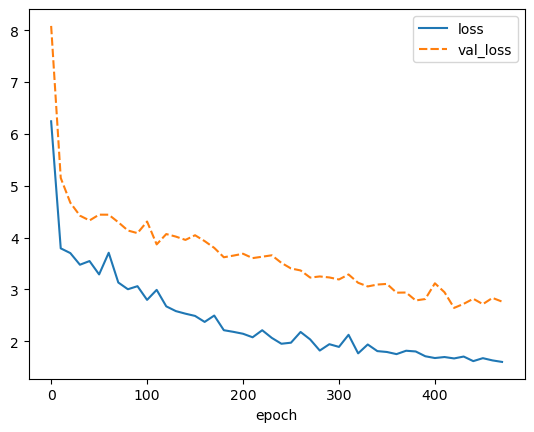

best weights loaded


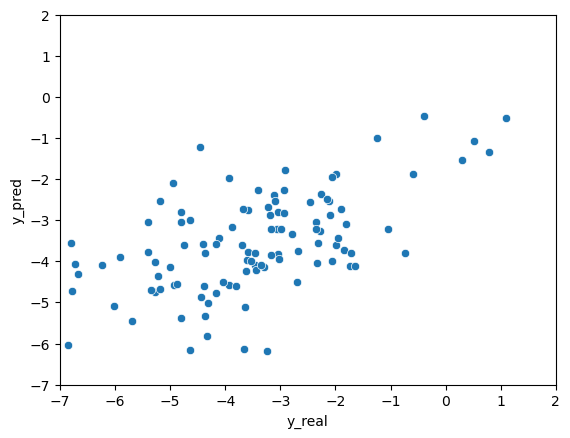

elapsed time: 71.82686042785645
run: 15
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5E09760>, <dgl.data.utils.Subset object at 0x000002F5D71303D0>, <dgl.data.utils.Subset object at 0x000002F5D7130700>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  4929


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.734828408559164 | Validation Loss 7.8063859939575195
Epoch 10 | Train Loss 3.693936840693156 | Validation Loss 4.89239501953125
Epoch 20 | Train Loss 3.280676007270813 | Validation Loss 4.7471923828125
Epoch 30 | Train Loss 3.125010347366333 | Validation Loss 4.1953853368759155
Epoch 40 | Train Loss 2.9181405862172443 | Validation Loss 4.253803610801697
Epoch 50 | Train Loss 2.4275949239730834 | Validation Loss 3.8026152849197388
Epoch 60 | Train Loss 2.276490346590678 | Validation Loss 3.670071244239807
Epoch 70 | Train Loss 2.1851538817087808 | Validation Loss 3.7287867069244385
Epoch 80 | Train Loss 2.046151065826416 | Validation Loss 3.757263660430908
Epoch 90 | Train Loss 1.994120971361796 | Validation Loss 3.286543607711792
Epoch 100 | Train Loss 1.9484456062316895 | Validation Loss 3.2592474222183228
Epoch 110 | Train Loss 1.8408532381057738 | Validation Loss 2.955655336380005
Epoch 120 | Train Loss 1.5852807680765788 | Validation Loss 2.730165123939514
Ep

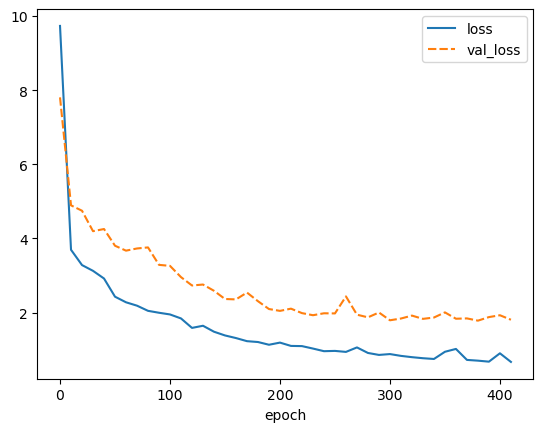

best weights loaded


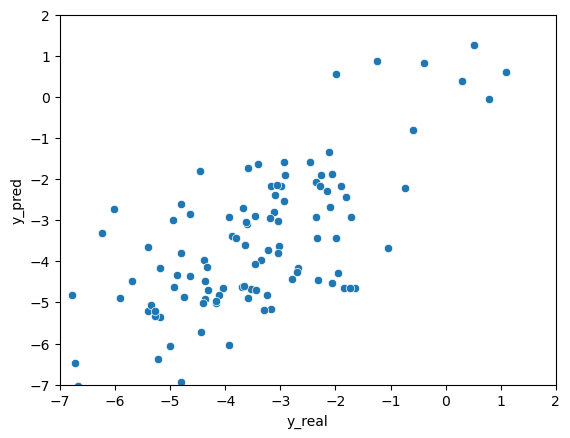

elapsed time: 81.78207683563232
run: 16
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F522EF3D00>, <dgl.data.utils.Subset object at 0x000002F5D5EFDA00>, <dgl.data.utils.Subset object at 0x000002F5D5EFD700>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  4865
Epoch 0 | Train Loss 9.282157802581787 | Validation Loss 9.372557878494263


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 4.142723433176676 | Validation Loss 5.02699875831604
Epoch 20 | Train Loss 3.943493366241455 | Validation Loss 4.763882637023926
Epoch 30 | Train Loss 3.5685895442962647 | Validation Loss 4.699126958847046
Epoch 40 | Train Loss 3.2907413721084593 | Validation Loss 4.648951530456543
Epoch 50 | Train Loss 3.2704654852549235 | Validation Loss 4.99590790271759
Epoch 60 | Train Loss 3.131107298533122 | Validation Loss 4.57734489440918
Epoch 70 | Train Loss 2.762870677312215 | Validation Loss 4.622087717056274
Epoch 80 | Train Loss 2.7400193373362223 | Validation Loss 4.315746426582336
Epoch 90 | Train Loss 2.705467669169108 | Validation Loss 4.233401536941528
Epoch 100 | Train Loss 2.663233423233032 | Validation Loss 4.284796953201294
Epoch 110 | Train Loss 2.4917524337768553 | Validation Loss 4.193287134170532
Epoch 120 | Train Loss 2.420353102684021 | Validation Loss 3.7729477882385254
Epoch 130 | Train Loss 2.1819503625233967 | Validation Loss 3.4991114139556885
Epo

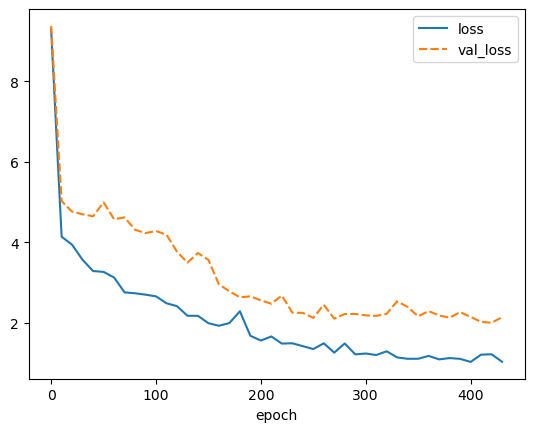

best weights loaded


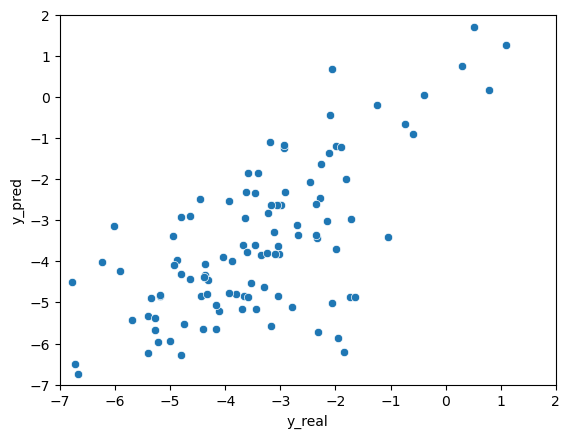

elapsed time: 77.54761624336243
run: 17
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5661711C0>, <dgl.data.utils.Subset object at 0x000002F5D5F5FC70>, <dgl.data.utils.Subset object at 0x000002F5D5F5FFA0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  4865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.80547742843628 | Validation Loss 7.745280504226685
Epoch 10 | Train Loss 3.8722640832265216 | Validation Loss 4.830937147140503
Epoch 20 | Train Loss 3.5974220911661785 | Validation Loss 5.001428127288818
Epoch 30 | Train Loss 3.2476895809173585 | Validation Loss 4.110766887664795
Epoch 40 | Train Loss 3.154091787338257 | Validation Loss 4.046369433403015
Epoch 50 | Train Loss 2.7041526953379313 | Validation Loss 4.132982492446899
Epoch 60 | Train Loss 2.518838119506836 | Validation Loss 4.045113205909729
Epoch 70 | Train Loss 2.4319682121276855 | Validation Loss 3.7633962631225586
Epoch 80 | Train Loss 2.324748953183492 | Validation Loss 3.65689754486084
Epoch 90 | Train Loss 2.10696698029836 | Validation Loss 3.4361815452575684
Epoch 100 | Train Loss 1.956831192970276 | Validation Loss 3.5000357627868652
Epoch 110 | Train Loss 1.8490314245224 | Validation Loss 3.1594513654708862
Epoch 120 | Train Loss 1.7961172024408976 | Validation Loss 3.079300284385681
Epoch

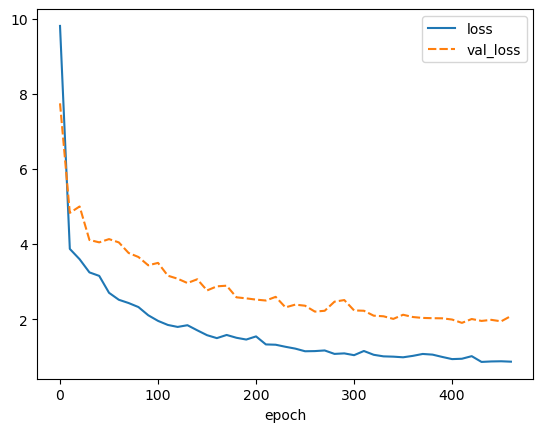

best weights loaded


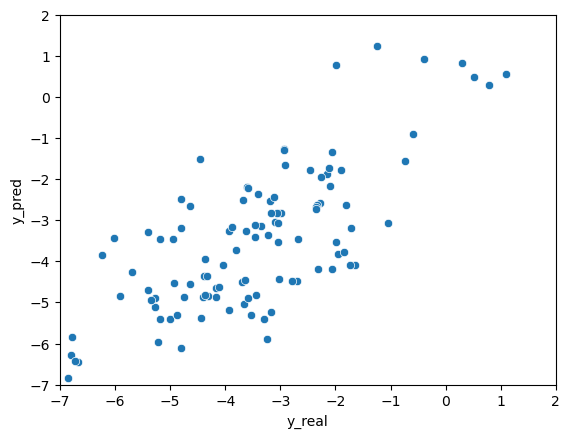

elapsed time: 79.6144950389862
run: 18
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5DAB430>, <dgl.data.utils.Subset object at 0x000002F56631A9A0>, <dgl.data.utils.Subset object at 0x000002F56631A970>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  9089


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.5066698551177975 | Validation Loss 5.017389535903931
Epoch 10 | Train Loss 3.546428136030833 | Validation Loss 4.327238440513611
Epoch 20 | Train Loss 2.7476664145787555 | Validation Loss 4.0201274156570435
Epoch 30 | Train Loss 2.2232441266377765 | Validation Loss 4.157100796699524
Epoch 40 | Train Loss 2.0969760258992514 | Validation Loss 3.3858143091201782
Epoch 50 | Train Loss 1.9724989096323648 | Validation Loss 3.673766016960144
Epoch 60 | Train Loss 1.5795297026634216 | Validation Loss 2.6467500925064087
Epoch 70 | Train Loss 1.3891275266806284 | Validation Loss 2.4682257175445557
Epoch 80 | Train Loss 1.2803666194279988 | Validation Loss 2.399751901626587
Epoch 90 | Train Loss 1.2663506110509237 | Validation Loss 2.7987254858016968
Epoch 100 | Train Loss 1.1196518143018086 | Validation Loss 2.0048945546150208
Epoch 110 | Train Loss 1.3182663679122926 | Validation Loss 1.9715012311935425
Epoch 120 | Train Loss 1.2089266459147134 | Validation Loss 2.1607086

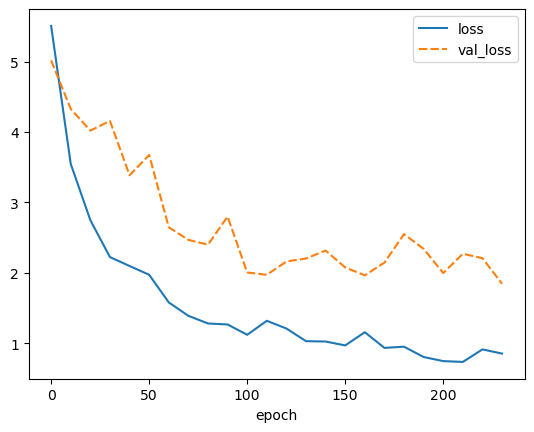

best weights loaded


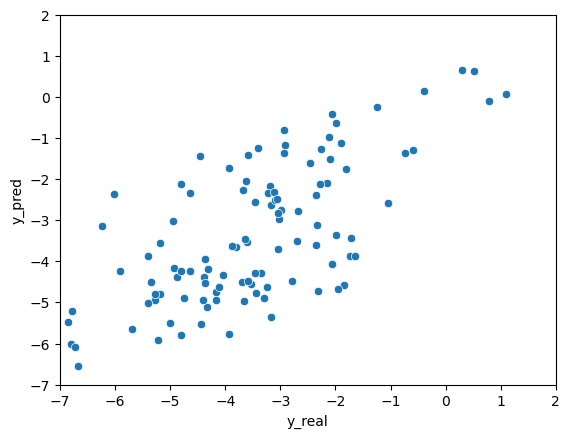

elapsed time: 49.21515607833862
run: 19
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F522EF8E20>, <dgl.data.utils.Subset object at 0x000002F5664C48E0>, <dgl.data.utils.Subset object at 0x000002F5664C4B50>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  9025


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 9.61024351119995 | Validation Loss 9.847511291503906
Epoch 10 | Train Loss 3.7533711512883503 | Validation Loss 4.794103384017944
Epoch 20 | Train Loss 3.4744701027870177 | Validation Loss 4.748643159866333
Epoch 30 | Train Loss 3.1990370114644366 | Validation Loss 4.229404807090759
Epoch 40 | Train Loss 3.1268639087677004 | Validation Loss 5.186021566390991
Epoch 50 | Train Loss 2.735313892364502 | Validation Loss 3.7529972791671753
Epoch 60 | Train Loss 2.297065838177999 | Validation Loss 3.4513444900512695
Epoch 70 | Train Loss 2.342133148511251 | Validation Loss 3.434012770652771
Epoch 80 | Train Loss 2.1147772391637165 | Validation Loss 3.4681252241134644
Epoch 90 | Train Loss 1.837603012720744 | Validation Loss 2.5579460859298706
Epoch 100 | Train Loss 1.7617662270863852 | Validation Loss 2.3747657537460327
Epoch 110 | Train Loss 1.5475448449452718 | Validation Loss 2.117878556251526
Epoch 120 | Train Loss 1.5115792473157248 | Validation Loss 2.63352131843566

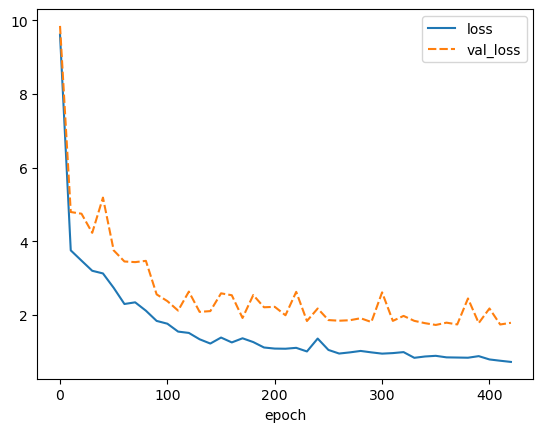

best weights loaded


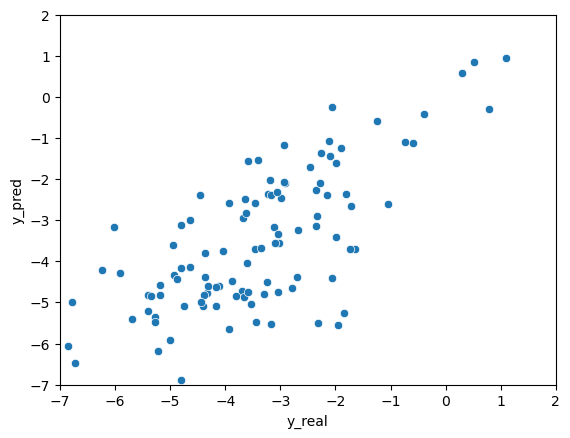

elapsed time: 85.17537879943848
run: 20
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5F20880>, <dgl.data.utils.Subset object at 0x000002F5D5F126A0>, <dgl.data.utils.Subset object at 0x000002F5D5F12C40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  9025


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.5718507448832195 | Validation Loss 5.2389020919799805
Epoch 10 | Train Loss 3.457096878687541 | Validation Loss 4.212519645690918
Epoch 20 | Train Loss 2.8505283037821454 | Validation Loss 4.259310960769653
Epoch 30 | Train Loss 2.2408504486083984 | Validation Loss 4.079998731613159
Epoch 40 | Train Loss 2.070394444465637 | Validation Loss 3.8945882320404053
Epoch 50 | Train Loss 1.8735097885131835 | Validation Loss 3.0199387073516846
Epoch 60 | Train Loss 1.605659023920695 | Validation Loss 2.479832887649536
Epoch 70 | Train Loss 1.3843265970547993 | Validation Loss 3.6600006818771362
Epoch 80 | Train Loss 1.3576553106307983 | Validation Loss 2.2188892364501953
Epoch 90 | Train Loss 1.1814881881078085 | Validation Loss 1.751861810684204
Epoch 100 | Train Loss 1.1149547100067139 | Validation Loss 1.791079819202423
Epoch 110 | Train Loss 1.036255939801534 | Validation Loss 1.9997262954711914
Epoch 120 | Train Loss 0.9604409694671631 | Validation Loss 2.89060854911

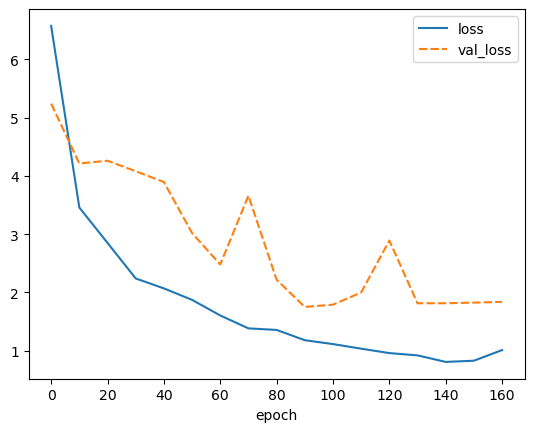

best weights loaded


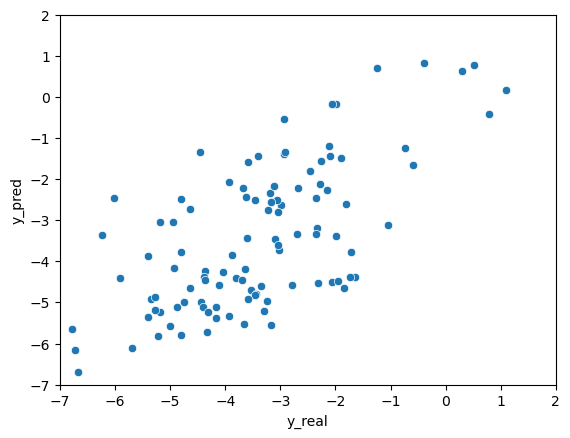

elapsed time: 34.06398892402649
run: 21
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5F8D1F0>, <dgl.data.utils.Subset object at 0x000002F5D708E250>, <dgl.data.utils.Subset object at 0x000002F5D708E4C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13249


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.393460321426391 | Validation Loss 4.745564699172974
Epoch 10 | Train Loss 3.6040006637573243 | Validation Loss 5.1591198444366455
Epoch 20 | Train Loss 3.25512220064799 | Validation Loss 3.9068708419799805
Epoch 30 | Train Loss 2.361793279647827 | Validation Loss 3.8953211307525635
Epoch 40 | Train Loss 1.9968079408009847 | Validation Loss 3.25232195854187
Epoch 50 | Train Loss 1.5067663272221883 | Validation Loss 3.149146318435669
Epoch 60 | Train Loss 1.7212740858395894 | Validation Loss 2.442656636238098
Epoch 70 | Train Loss 1.2112250477075577 | Validation Loss 2.414449095726013
Epoch 80 | Train Loss 1.1494699637095134 | Validation Loss 2.20233690738678
Epoch 90 | Train Loss 1.1682562371095022 | Validation Loss 1.9751482009887695
Epoch 100 | Train Loss 1.0784425894419352 | Validation Loss 1.9640995264053345
Epoch 110 | Train Loss 1.0345529794692994 | Validation Loss 2.1357680559158325
Epoch 120 | Train Loss 1.0288758238156637 | Validation Loss 1.9934877157211

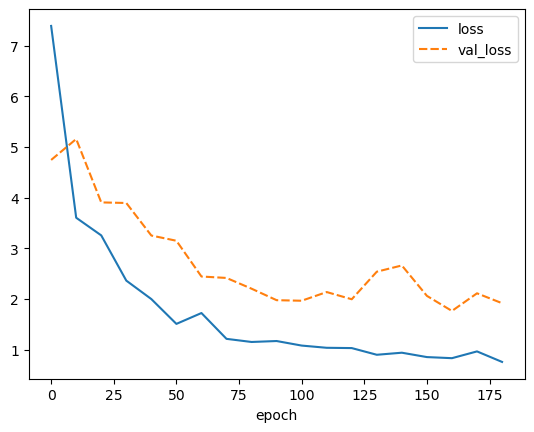

best weights loaded


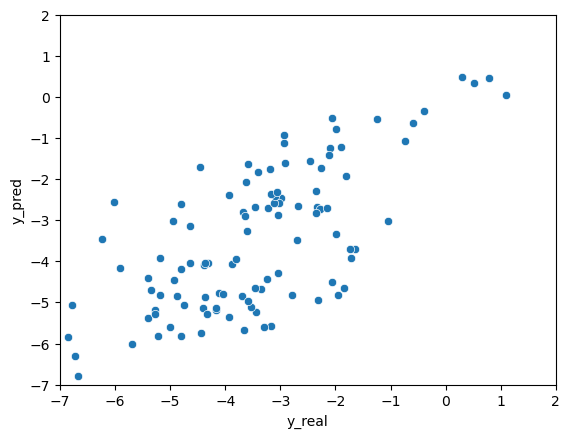

elapsed time: 44.86062955856323
run: 22
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5EC09A0>, <dgl.data.utils.Subset object at 0x000002F5D71B3EE0>, <dgl.data.utils.Subset object at 0x000002F5D71B8190>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  13185


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.6259897470474245 | Validation Loss 6.544674396514893
Epoch 10 | Train Loss 4.008297602335612 | Validation Loss 4.826731204986572
Epoch 20 | Train Loss 3.5827865759531656 | Validation Loss 4.349809408187866
Epoch 30 | Train Loss 2.7236453533172607 | Validation Loss 4.071244835853577
Epoch 40 | Train Loss 2.346843163172404 | Validation Loss 3.3143259286880493
Epoch 50 | Train Loss 2.057767868041992 | Validation Loss 3.889085292816162
Epoch 60 | Train Loss 1.9442428668340048 | Validation Loss 3.9383667707443237
Epoch 70 | Train Loss 1.7824682076772054 | Validation Loss 2.3191500902175903
Epoch 80 | Train Loss 1.3537224054336547 | Validation Loss 2.3256713151931763
Epoch 90 | Train Loss 1.5287479599316915 | Validation Loss 3.2596988677978516
Epoch 100 | Train Loss 1.4640857060750325 | Validation Loss 2.90435791015625
Epoch 110 | Train Loss 1.2164838234583537 | Validation Loss 2.079015612602234
Epoch 120 | Train Loss 1.1754002690315246 | Validation Loss 2.536854267120

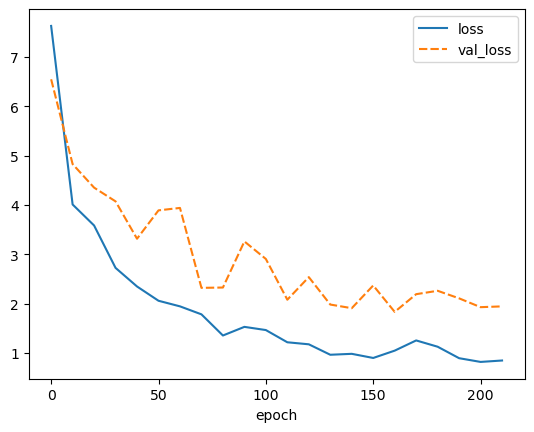

best weights loaded


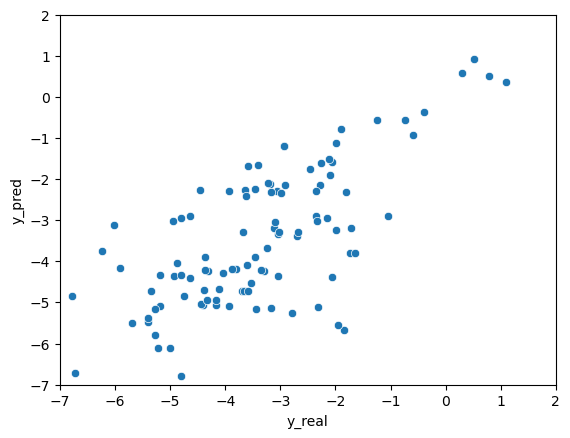

elapsed time: 48.51041054725647
run: 23
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566252FD0>, <dgl.data.utils.Subset object at 0x000002F5D708E3A0>, <dgl.data.utils.Subset object at 0x000002F5D6FC2B20>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  13185


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.015510336558025 | Validation Loss 6.759976625442505
Epoch 10 | Train Loss 3.6406769355138144 | Validation Loss 5.01034951210022
Epoch 20 | Train Loss 3.3162397543589273 | Validation Loss 4.17921257019043
Epoch 30 | Train Loss 2.6604662418365477 | Validation Loss 3.8734846115112305
Epoch 40 | Train Loss 2.4221816937128704 | Validation Loss 4.411785840988159
Epoch 50 | Train Loss 1.9520197629928588 | Validation Loss 3.3920512199401855
Epoch 60 | Train Loss 2.2728926658630373 | Validation Loss 3.212283968925476
Epoch 70 | Train Loss 1.6235349655151368 | Validation Loss 3.1727232933044434
Epoch 80 | Train Loss 1.389796006679535 | Validation Loss 2.416372299194336
Epoch 90 | Train Loss 1.3782169421513875 | Validation Loss 2.4000052213668823
Epoch 100 | Train Loss 1.1572546680768332 | Validation Loss 2.1253944635391235
Epoch 110 | Train Loss 1.1604811469713847 | Validation Loss 2.103459358215332
Epoch 120 | Train Loss 1.173087728023529 | Validation Loss 1.9132187366485

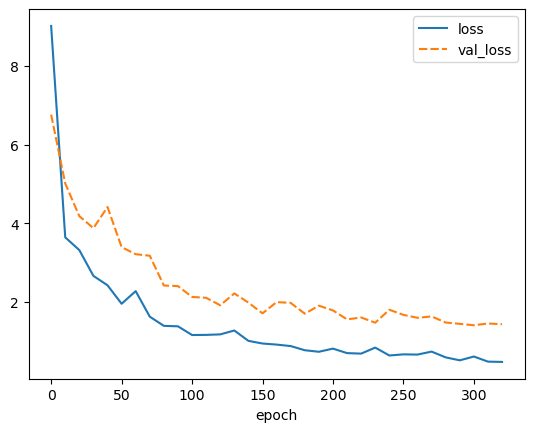

best weights loaded


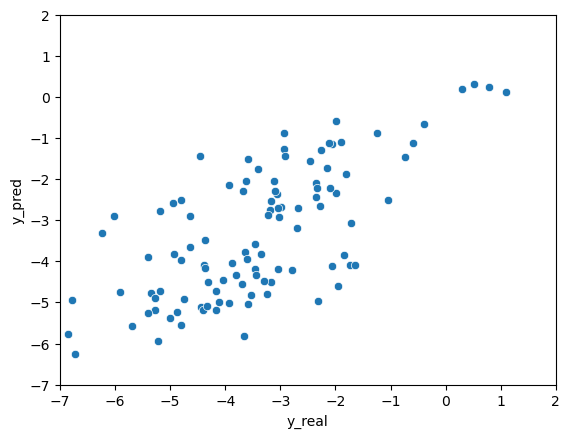

elapsed time: 73.03480792045593
run: 24
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5661F8760>, <dgl.data.utils.Subset object at 0x000002F5D70D4040>, <dgl.data.utils.Subset object at 0x000002F5D70D4730>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  769
Epoch 0 | Train Loss 8.005008427302043 | Validation Loss 7.370361804962158


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.7043697516123455 | Validation Loss 4.994804859161377
Epoch 20 | Train Loss 3.400561459859212 | Validation Loss 4.579511880874634
Epoch 30 | Train Loss 3.5080035448074343 | Validation Loss 4.264878749847412
Epoch 40 | Train Loss 3.132176939646403 | Validation Loss 4.2730712890625
Epoch 50 | Train Loss 3.1072385629018147 | Validation Loss 4.1879723072052
Epoch 60 | Train Loss 2.8102567354838053 | Validation Loss 4.072366237640381
Epoch 70 | Train Loss 2.740845052401225 | Validation Loss 4.224378824234009
Epoch 80 | Train Loss 2.694480276107788 | Validation Loss 4.039556860923767
Epoch 90 | Train Loss 2.8746748129526773 | Validation Loss 4.322049260139465
Epoch 100 | Train Loss 2.7125724156697593 | Validation Loss 3.9111123085021973
Epoch 110 | Train Loss 2.413022748629252 | Validation Loss 4.181743621826172
Epoch 120 | Train Loss 2.312717898686727 | Validation Loss 3.9138059616088867
Epoch 130 | Train Loss 2.230485510826111 | Validation Loss 3.7469863891601562
Epo

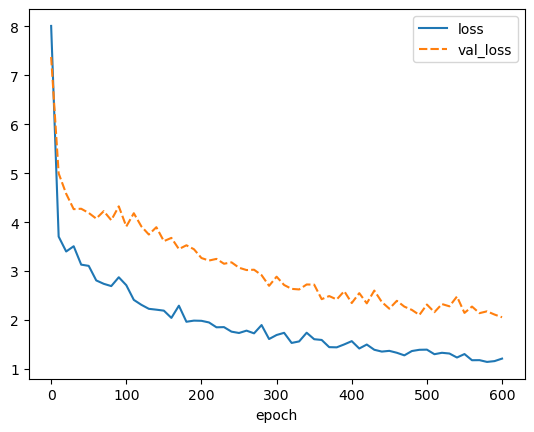

best weights loaded


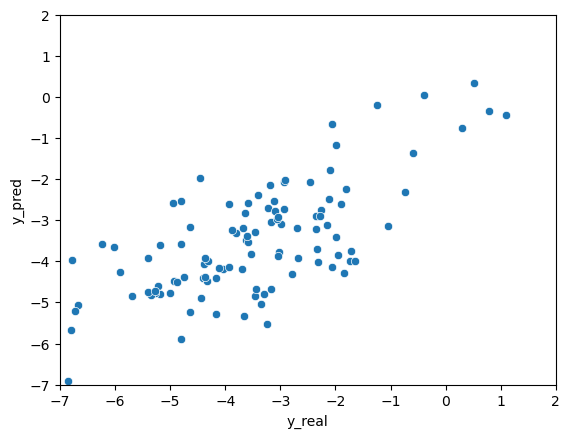

elapsed time: 98.01135420799255
run: 25
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5663F8550>, <dgl.data.utils.Subset object at 0x000002F5D5D703D0>, <dgl.data.utils.Subset object at 0x000002F5D5D70130>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  705
Epoch 0 | Train Loss 9.069120375315348 | Validation Loss 10.65657091140747


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.9685909430185955 | Validation Loss 5.003796100616455
Epoch 20 | Train Loss 4.021666256586711 | Validation Loss 4.634777545928955
Epoch 30 | Train Loss 3.7487219174702964 | Validation Loss 4.585130214691162
Epoch 40 | Train Loss 3.649420801798503 | Validation Loss 4.5632195472717285
Epoch 50 | Train Loss 3.5582991441090903 | Validation Loss 4.511117458343506
Epoch 60 | Train Loss 3.446390962600708 | Validation Loss 4.4422571659088135
Epoch 70 | Train Loss 3.3308422565460205 | Validation Loss 4.330594897270203
Epoch 80 | Train Loss 3.3718214988708497 | Validation Loss 4.656251907348633
Epoch 90 | Train Loss 3.097625728448232 | Validation Loss 4.590690732002258
Epoch 100 | Train Loss 3.147508668899536 | Validation Loss 4.542505502700806
Epoch 110 | Train Loss 2.892907377084096 | Validation Loss 4.560989141464233
Epoch 120 | Train Loss 3.021760272979736 | Validation Loss 4.410562992095947
Epoch 130 | Train Loss 2.9313878218332925 | Validation Loss 4.5809314250946045

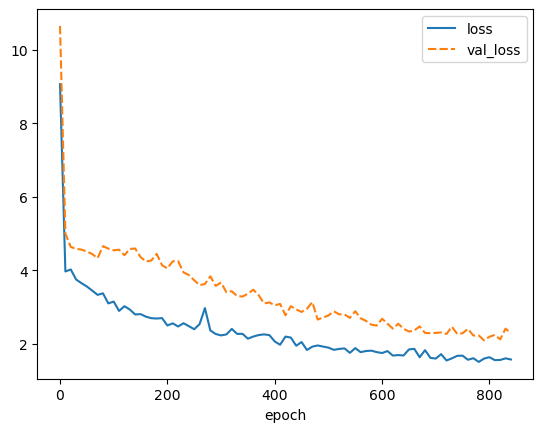

best weights loaded


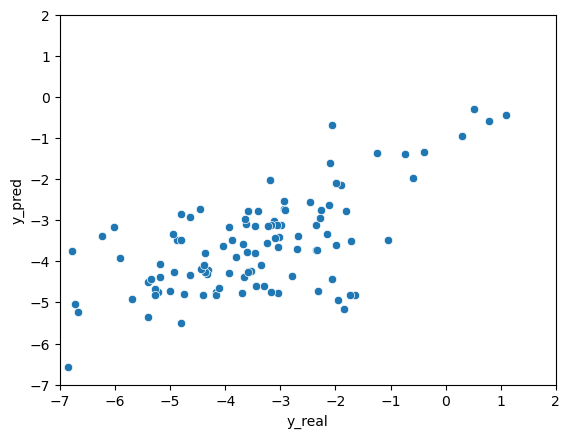

elapsed time: 128.63520216941833
run: 26
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5664D1250>, <dgl.data.utils.Subset object at 0x000002F5D5E0D460>, <dgl.data.utils.Subset object at 0x000002F5D5E0D6D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  705
Epoch 0 | Train Loss 15.636564381917317 | Validation Loss 15.249886989593506


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.9697043180465696 | Validation Loss 5.805335760116577
Epoch 20 | Train Loss 3.715642714500427 | Validation Loss 5.157270669937134
Epoch 30 | Train Loss 3.895857493082682 | Validation Loss 4.705927848815918
Epoch 40 | Train Loss 3.471182918548584 | Validation Loss 4.504047274589539
Epoch 50 | Train Loss 3.4855005105336505 | Validation Loss 4.446075677871704
Epoch 60 | Train Loss 3.433531093597412 | Validation Loss 4.360592842102051
Epoch 70 | Train Loss 3.2839736302693683 | Validation Loss 4.433483600616455
Epoch 80 | Train Loss 3.1992857774098713 | Validation Loss 4.363359689712524
Epoch 90 | Train Loss 3.2037399848302206 | Validation Loss 4.542288780212402
Epoch 100 | Train Loss 3.1524381001790363 | Validation Loss 4.342222809791565
Epoch 110 | Train Loss 2.958206860224406 | Validation Loss 4.419077157974243
Epoch 120 | Train Loss 2.891003195444743 | Validation Loss 4.6084794998168945
Epoch 130 | Train Loss 2.9242892106374105 | Validation Loss 4.367020845413208


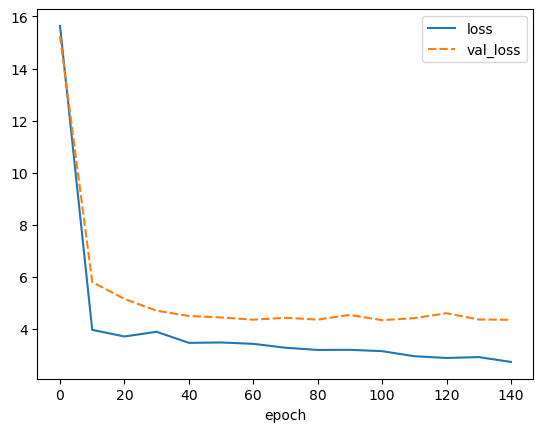

best weights loaded


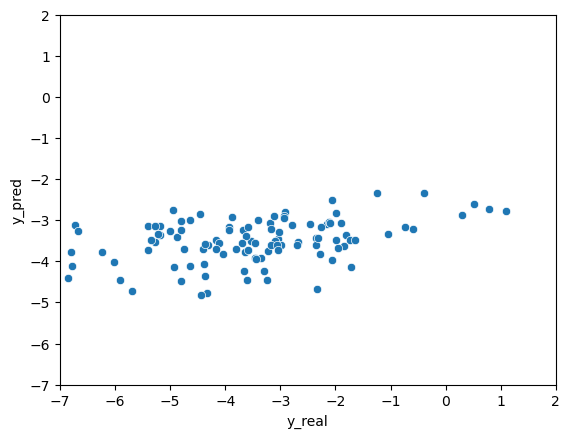

elapsed time: 22.886104583740234
run: 27
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5664C0370>, <dgl.data.utils.Subset object at 0x000002F5661D3520>, <dgl.data.utils.Subset object at 0x000002F566554310>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  4929
Epoch 0 | Train Loss 7.06999618212382 | Validation Loss 6.096109867095947


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 10 | Train Loss 3.848517576853434 | Validation Loss 4.353740692138672
Epoch 20 | Train Loss 3.216973654429118 | Validation Loss 4.206069231033325
Epoch 30 | Train Loss 2.9372883160909016 | Validation Loss 4.290111184120178
Epoch 40 | Train Loss 2.63748615582784 | Validation Loss 4.363570213317871
Epoch 50 | Train Loss 2.430845399697622 | Validation Loss 4.328056573867798
Epoch 60 | Train Loss 2.578214732805888 | Validation Loss 3.9996225833892822
Epoch 70 | Train Loss 2.236145353317261 | Validation Loss 4.000415682792664
Epoch 80 | Train Loss 2.1905686378479006 | Validation Loss 3.8160074949264526
Epoch 90 | Train Loss 2.096024187405904 | Validation Loss 3.6718043088912964
Epoch 100 | Train Loss 2.154543391863505 | Validation Loss 3.972043514251709
Epoch 110 | Train Loss 1.93749893506368 | Validation Loss 3.3300880193710327
Epoch 120 | Train Loss 1.8198326349258422 | Validation Loss 3.69244122505188
Epoch 130 | Train Loss 1.7582539319992065 | Validation Loss 3.1674838066101074
Ep

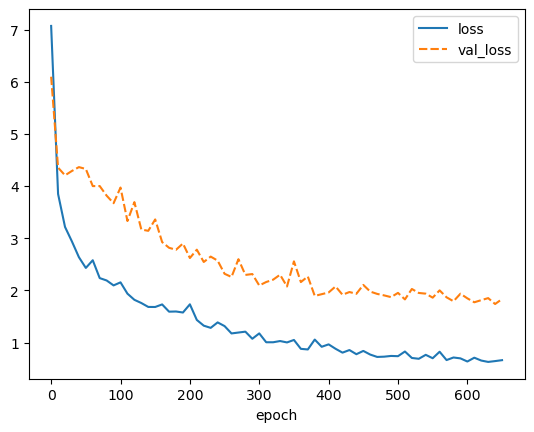

best weights loaded


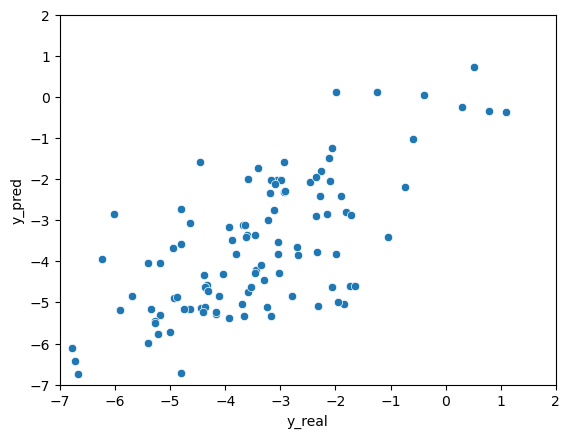

elapsed time: 146.07844972610474
run: 28
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F56660C430>, <dgl.data.utils.Subset object at 0x000002F566623CA0>, <dgl.data.utils.Subset object at 0x000002F566623100>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  4865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.2074552853902185 | Validation Loss 6.949522256851196
Epoch 10 | Train Loss 3.8090785185496014 | Validation Loss 4.997170686721802
Epoch 20 | Train Loss 3.7099645932515464 | Validation Loss 4.682382583618164
Epoch 30 | Train Loss 3.432641879717509 | Validation Loss 4.73311448097229
Epoch 40 | Train Loss 3.4594112237294516 | Validation Loss 4.213534593582153
Epoch 50 | Train Loss 3.174726470311483 | Validation Loss 4.515915393829346
Epoch 60 | Train Loss 2.883475430806478 | Validation Loss 4.2017515897750854
Epoch 70 | Train Loss 2.92094517548879 | Validation Loss 4.135164260864258
Epoch 80 | Train Loss 2.62634441057841 | Validation Loss 3.9215636253356934
Epoch 90 | Train Loss 2.5712092876434327 | Validation Loss 3.853670835494995
Epoch 100 | Train Loss 2.4664252758026124 | Validation Loss 3.605499029159546
Epoch 110 | Train Loss 2.4043362538019815 | Validation Loss 3.8349955081939697
Epoch 120 | Train Loss 2.291780718167623 | Validation Loss 3.4766218662261963
Ep

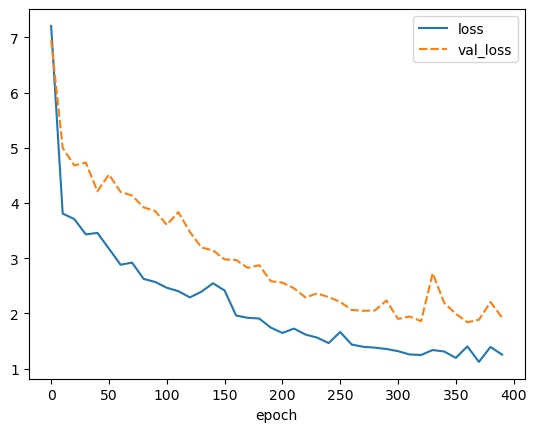

best weights loaded


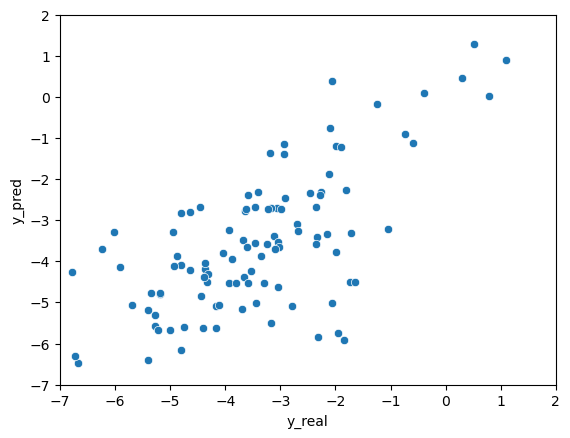

elapsed time: 93.47493195533752
run: 29
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5661E81F0>, <dgl.data.utils.Subset object at 0x000002F5D71CC7F0>, <dgl.data.utils.Subset object at 0x000002F5D71CCA60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  4865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.107202434539795 | Validation Loss 4.955658912658691
Epoch 10 | Train Loss 3.6142900307973225 | Validation Loss 4.928942680358887
Epoch 20 | Train Loss 3.2043662627538043 | Validation Loss 4.217199325561523
Epoch 30 | Train Loss 2.9052796522776285 | Validation Loss 4.021136403083801
Epoch 40 | Train Loss 2.669760815302531 | Validation Loss 3.9673354625701904
Epoch 50 | Train Loss 2.3464197635650637 | Validation Loss 4.2317235469818115
Epoch 60 | Train Loss 2.188919417063395 | Validation Loss 4.218604922294617
Epoch 70 | Train Loss 2.08799041112264 | Validation Loss 3.919915199279785
Epoch 80 | Train Loss 2.0925737222035727 | Validation Loss 3.6768559217453003
Epoch 90 | Train Loss 1.9369422674179078 | Validation Loss 3.460905432701111
Epoch 100 | Train Loss 1.8837704181671142 | Validation Loss 3.370970845222473
Epoch 110 | Train Loss 1.8426324407259622 | Validation Loss 3.2092443704605103
Epoch 120 | Train Loss 1.7451681216557822 | Validation Loss 3.01676344871521

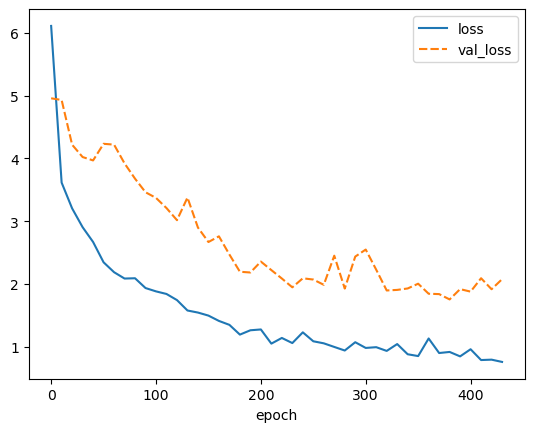

best weights loaded


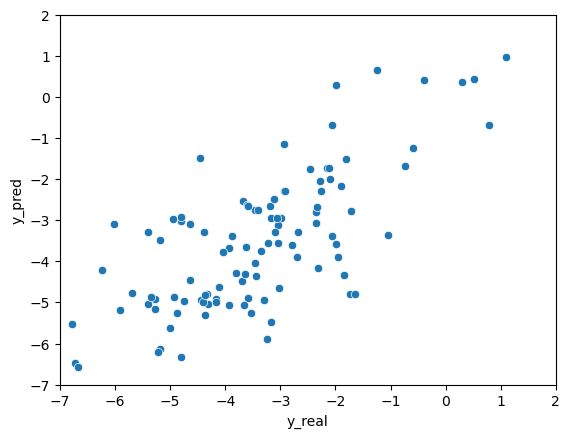

elapsed time: 101.4038233757019
run: 30
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5660D2FA0>, <dgl.data.utils.Subset object at 0x000002F5661F8B20>, <dgl.data.utils.Subset object at 0x000002F5661F8EB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  9089


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.832946399847667 | Validation Loss 4.8896262645721436
Epoch 10 | Train Loss 3.1594223976135254 | Validation Loss 4.3285828828811646
Epoch 20 | Train Loss 2.465654500325521 | Validation Loss 3.7862610816955566
Epoch 30 | Train Loss 1.9741554419199625 | Validation Loss 3.156820297241211
Epoch 40 | Train Loss 1.6606862465540568 | Validation Loss 3.0942952632904053
Epoch 50 | Train Loss 1.5504563570022583 | Validation Loss 2.617258906364441
Epoch 60 | Train Loss 1.2918271144231162 | Validation Loss 2.5129319429397583
Epoch 70 | Train Loss 1.3220118681589763 | Validation Loss 2.6645745038986206
Epoch 80 | Train Loss 1.1354215701421102 | Validation Loss 1.9548363089561462
Epoch 90 | Train Loss 1.13174862464269 | Validation Loss 1.8532439470291138
Epoch 100 | Train Loss 1.3110013961791993 | Validation Loss 2.160778284072876
Epoch 110 | Train Loss 1.0234391530354818 | Validation Loss 1.8220410346984863
Epoch 120 | Train Loss 0.8987413704395294 | Validation Loss 1.80014026

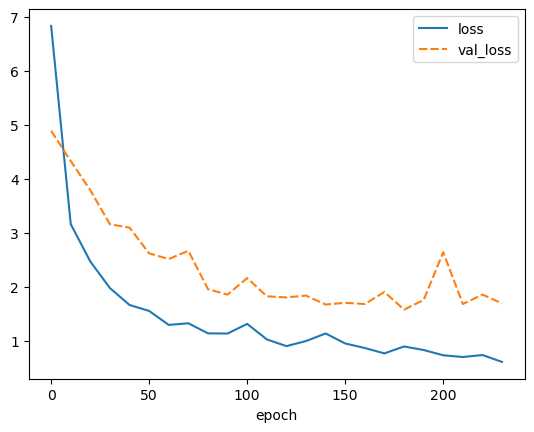

best weights loaded


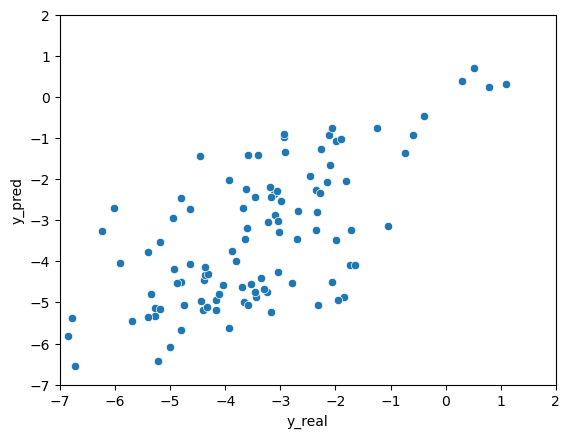

elapsed time: 66.51390075683594
run: 31
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F522F0CB50>, <dgl.data.utils.Subset object at 0x000002F5D70827F0>, <dgl.data.utils.Subset object at 0x000002F5D7082A60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  9025


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.883854794502258 | Validation Loss 5.952745199203491
Epoch 10 | Train Loss 4.1552644570668535 | Validation Loss 4.971449375152588
Epoch 20 | Train Loss 3.345610507329305 | Validation Loss 4.5735859870910645
Epoch 30 | Train Loss 2.989754486083984 | Validation Loss 5.586628198623657
Epoch 40 | Train Loss 2.9539836088816327 | Validation Loss 4.178641080856323
Epoch 50 | Train Loss 2.709370764096578 | Validation Loss 3.4923057556152344
Epoch 60 | Train Loss 2.4313472429911296 | Validation Loss 4.733031749725342
Epoch 70 | Train Loss 2.1951998154322307 | Validation Loss 3.4368444681167603
Epoch 80 | Train Loss 2.3980195840199787 | Validation Loss 3.832359790802002
Epoch 90 | Train Loss 1.917448623975118 | Validation Loss 2.75866162776947
Epoch 100 | Train Loss 1.7636740605036418 | Validation Loss 2.531928777694702
Epoch 110 | Train Loss 1.7099536736806233 | Validation Loss 3.020462393760681
Epoch 120 | Train Loss 1.5290990034739176 | Validation Loss 2.2765085697174072

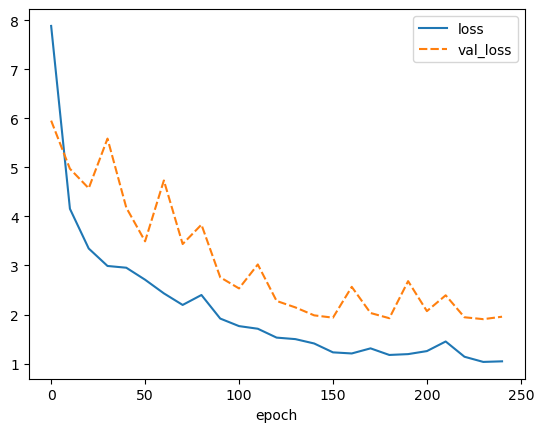

best weights loaded


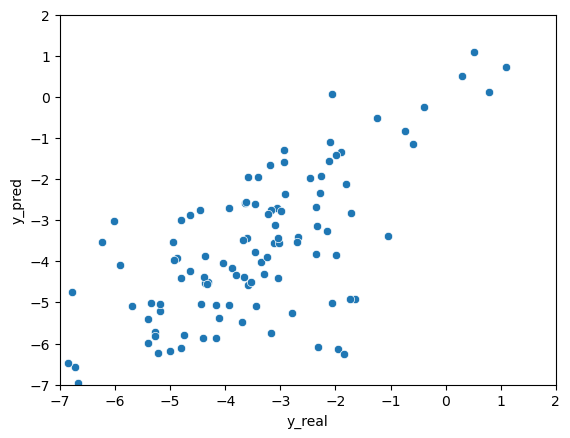

elapsed time: 65.61969304084778
run: 32
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F51EE64370>, <dgl.data.utils.Subset object at 0x000002F522F1ED90>, <dgl.data.utils.Subset object at 0x000002F522F1EC40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  9025


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.035958973566691 | Validation Loss 5.070414304733276
Epoch 10 | Train Loss 3.569453509648641 | Validation Loss 4.593681216239929
Epoch 20 | Train Loss 3.417007557551066 | Validation Loss 4.569137215614319
Epoch 30 | Train Loss 3.0095693429311114 | Validation Loss 4.057433128356934
Epoch 40 | Train Loss 2.2969496647516885 | Validation Loss 3.850399971008301
Epoch 50 | Train Loss 2.0681490023930866 | Validation Loss 3.5670305490493774
Epoch 60 | Train Loss 1.9700619538625082 | Validation Loss 3.4246476888656616
Epoch 70 | Train Loss 1.6682730436325073 | Validation Loss 3.1774545907974243
Epoch 80 | Train Loss 1.5217981616655984 | Validation Loss 3.0409886837005615
Epoch 90 | Train Loss 1.4969726920127868 | Validation Loss 2.7898457050323486
Epoch 100 | Train Loss 1.347974427541097 | Validation Loss 2.48185932636261
Epoch 110 | Train Loss 1.2268250862757364 | Validation Loss 2.2775923013687134
Epoch 120 | Train Loss 1.2851405461629233 | Validation Loss 2.218279063701

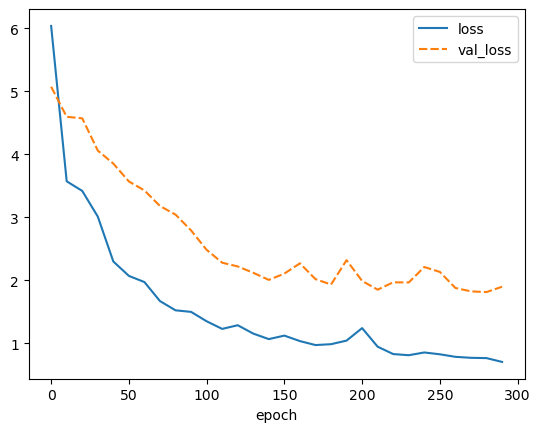

best weights loaded


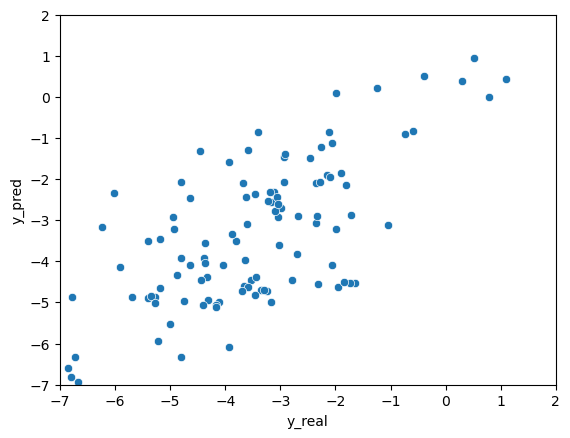

elapsed time: 75.01949620246887
run: 33
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F564252DC0>, <dgl.data.utils.Subset object at 0x000002F51EE91AF0>, <dgl.data.utils.Subset object at 0x000002F51EE91D60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13249


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.484526554743449 | Validation Loss 4.784792184829712
Epoch 10 | Train Loss 4.023978646596273 | Validation Loss 4.877283573150635
Epoch 20 | Train Loss 3.05259903271993 | Validation Loss 4.331951975822449
Epoch 30 | Train Loss 2.414851665496826 | Validation Loss 4.269419431686401
Epoch 40 | Train Loss 2.316217581431071 | Validation Loss 3.69256329536438
Epoch 50 | Train Loss 2.019514067967733 | Validation Loss 3.4161107540130615
Epoch 60 | Train Loss 2.11117848555247 | Validation Loss 2.9879733324050903
Epoch 70 | Train Loss 1.7173446814219158 | Validation Loss 2.9760130643844604
Epoch 80 | Train Loss 1.724849518140157 | Validation Loss 2.6143558025360107
Epoch 90 | Train Loss 1.4187890529632567 | Validation Loss 2.498082160949707
Epoch 100 | Train Loss 1.3559152563412984 | Validation Loss 2.2009910345077515
Epoch 110 | Train Loss 1.5532017946243286 | Validation Loss 2.2191059589385986
Epoch 120 | Train Loss 1.3793001890182495 | Validation Loss 2.176083505153656
Ep

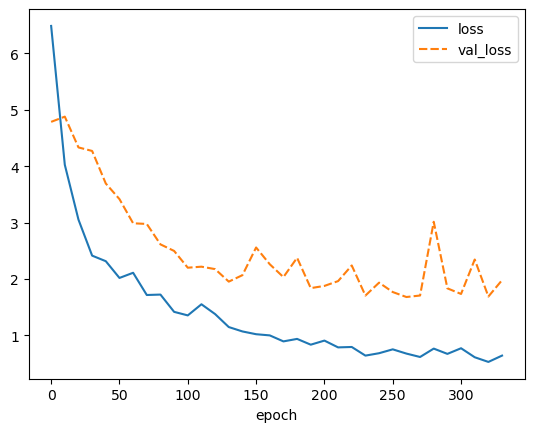

best weights loaded


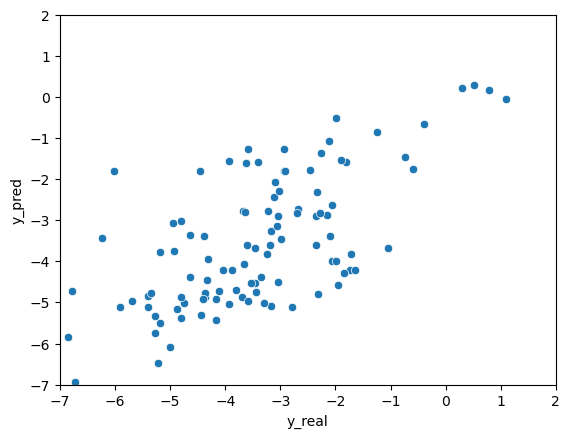

elapsed time: 100.17083048820496
run: 34
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F56617B9A0>, <dgl.data.utils.Subset object at 0x000002F5D7206A30>, <dgl.data.utils.Subset object at 0x000002F5D7206CA0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  13185


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 8.5108460744222 | Validation Loss 6.5442054271698
Epoch 10 | Train Loss 3.8910579363505047 | Validation Loss 4.8028788566589355
Epoch 20 | Train Loss 3.414212115605672 | Validation Loss 4.511675596237183
Epoch 30 | Train Loss 2.5101701577504474 | Validation Loss 4.357974529266357
Epoch 40 | Train Loss 1.9811036427815756 | Validation Loss 2.960262179374695
Epoch 50 | Train Loss 2.0309522708257037 | Validation Loss 2.5090399980545044
Epoch 60 | Train Loss 1.776090137163798 | Validation Loss 4.467595815658569
Epoch 70 | Train Loss 1.4748538494110108 | Validation Loss 1.9566276669502258
Epoch 80 | Train Loss 1.3089680552482605 | Validation Loss 2.2633175253868103
Epoch 90 | Train Loss 1.3615659753481546 | Validation Loss 2.3373943567276
Epoch 100 | Train Loss 1.2553886850674947 | Validation Loss 2.211471736431122
Epoch 110 | Train Loss 1.3137691497802735 | Validation Loss 1.873502254486084
Epoch 120 | Train Loss 1.1577960213025411 | Validation Loss 2.5335018634796143
E

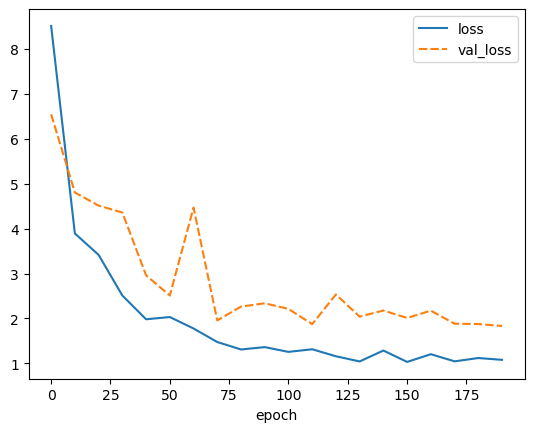

best weights loaded


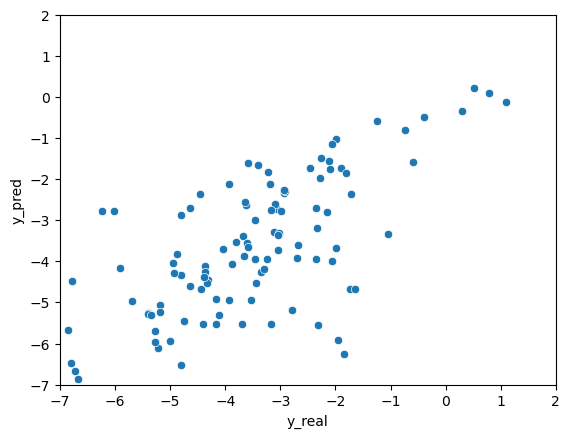

elapsed time: 58.25477457046509
run: 35
{'hidden_channels_list': [64], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5665126D0>, <dgl.data.utils.Subset object at 0x000002F51EE9B5B0>, <dgl.data.utils.Subset object at 0x000002F51EE9B910>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
)
Number of parameters:  13185


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.49739637374878 | Validation Loss 5.00822377204895
Epoch 10 | Train Loss 3.57890940507253 | Validation Loss 5.053091764450073
Epoch 20 | Train Loss 2.60085244178772 | Validation Loss 4.195011258125305
Epoch 30 | Train Loss 2.4304906129837036 | Validation Loss 3.4643179178237915
Epoch 40 | Train Loss 2.0969531695048014 | Validation Loss 3.457829713821411
Epoch 50 | Train Loss 2.0440466006596885 | Validation Loss 3.0754257440567017
Epoch 60 | Train Loss 2.1025697072347005 | Validation Loss 2.5689390897750854
Epoch 70 | Train Loss 1.7029109398523967 | Validation Loss 2.6112687587738037
Epoch 80 | Train Loss 1.515894881884257 | Validation Loss 2.388378620147705
Epoch 90 | Train Loss 1.4359588980674745 | Validation Loss 2.5807727575302124
Epoch 100 | Train Loss 1.394310728708903 | Validation Loss 2.276558518409729
Epoch 110 | Train Loss 1.311347238222758 | Validation Loss 2.470563292503357
Epoch 120 | Train Loss 1.2137246529261272 | Validation Loss 2.3781731724739075
E

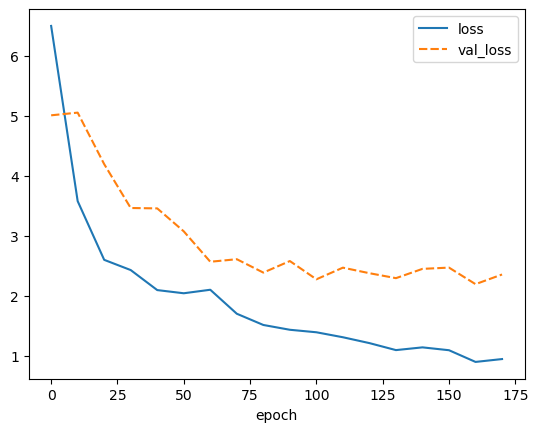

best weights loaded


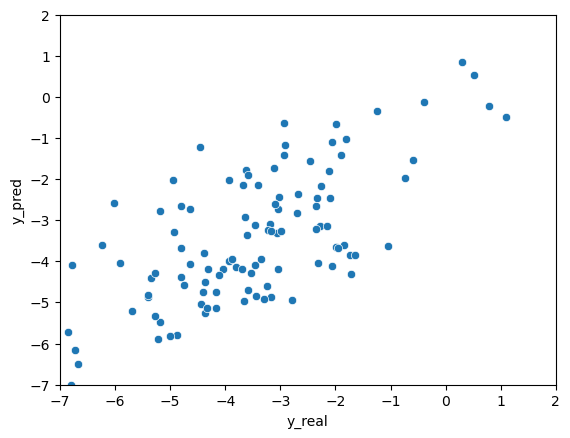

elapsed time: 52.786231994628906
run: 36
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D7171A60>, <dgl.data.utils.Subset object at 0x000002F5D7237B20>, <dgl.data.utils.Subset object at 0x000002F5D7237D90>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  3073


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.945291058222453 | Validation Loss 4.7977612018585205
Epoch 10 | Train Loss 3.587288411458333 | Validation Loss 4.750352382659912
Epoch 20 | Train Loss 3.541937494277954 | Validation Loss 4.277527332305908
Epoch 30 | Train Loss 3.5056164105733236 | Validation Loss 4.3526952266693115
Epoch 40 | Train Loss 2.896666749318441 | Validation Loss 4.7468581199646
Epoch 50 | Train Loss 2.877412470181783 | Validation Loss 4.224782228469849
Epoch 60 | Train Loss 2.642811377843221 | Validation Loss 4.124480962753296
Epoch 70 | Train Loss 2.443241095542908 | Validation Loss 4.1018226146698
Epoch 80 | Train Loss 2.250983381271362 | Validation Loss 3.880392551422119
Epoch 90 | Train Loss 2.15710608959198 | Validation Loss 3.963715434074402
Epoch 100 | Train Loss 2.3322124004364015 | Validation Loss 3.682823896408081
Epoch 110 | Train Loss 2.0314594984054564 | Validation Loss 4.065856099128723
Epoch 120 | Train Loss 2.065905968348185 | Validation Loss 3.418911337852478
Epoch 130 

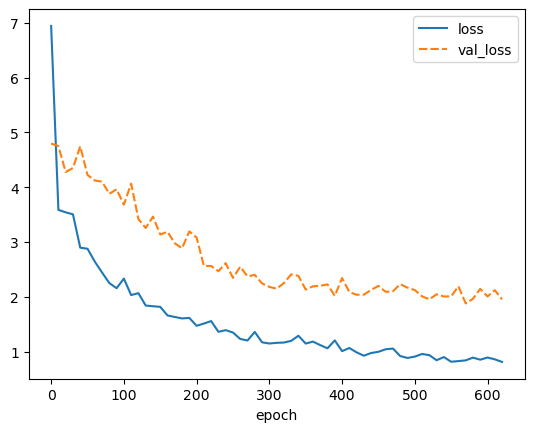

best weights loaded


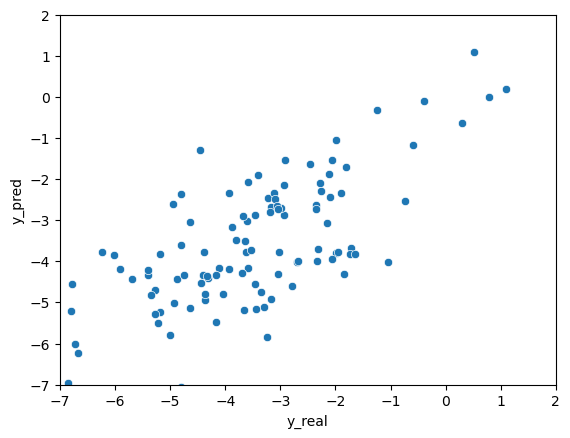

elapsed time: 132.33516001701355
run: 37
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566462310>, <dgl.data.utils.Subset object at 0x000002F566676DC0>, <dgl.data.utils.Subset object at 0x000002F5666765B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  2817


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.235064872105917 | Validation Loss 6.291925430297852
Epoch 10 | Train Loss 3.906927156448364 | Validation Loss 4.666605472564697
Epoch 20 | Train Loss 3.9548787117004394 | Validation Loss 4.398192882537842
Epoch 30 | Train Loss 3.67581737836202 | Validation Loss 4.410966634750366
Epoch 40 | Train Loss 3.3619855523109434 | Validation Loss 4.422075510025024
Epoch 50 | Train Loss 3.3892197450002035 | Validation Loss 4.4018731117248535
Epoch 60 | Train Loss 3.0703970432281493 | Validation Loss 4.24116063117981
Epoch 70 | Train Loss 2.952799407641093 | Validation Loss 4.835934638977051
Epoch 80 | Train Loss 2.9001489957173665 | Validation Loss 3.9734373092651367
Epoch 90 | Train Loss 2.906503979365031 | Validation Loss 3.934871792793274
Epoch 100 | Train Loss 2.828603967030843 | Validation Loss 3.882776975631714
Epoch 110 | Train Loss 2.6139252026875814 | Validation Loss 3.8344552516937256
Epoch 120 | Train Loss 2.681765874226888 | Validation Loss 3.8845964670181274
Ep

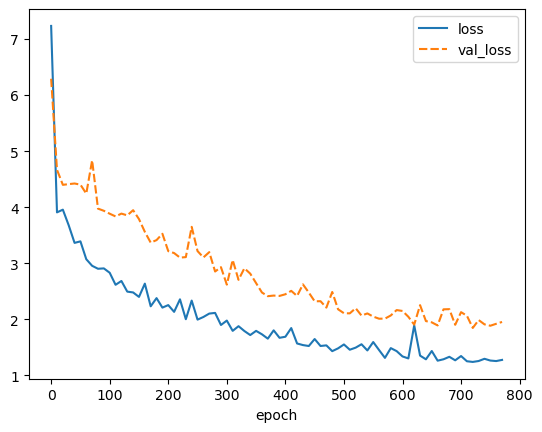

best weights loaded


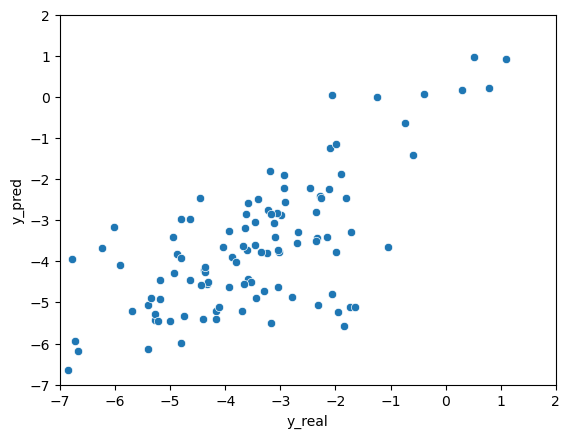

elapsed time: 173.7259006500244
run: 38
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F53FBC42E0>, <dgl.data.utils.Subset object at 0x000002F5D5DC7460>, <dgl.data.utils.Subset object at 0x000002F5D5DEF250>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  2817


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.043306620915731 | Validation Loss 5.366374969482422
Epoch 10 | Train Loss 3.5944544712702435 | Validation Loss 4.804888963699341
Epoch 20 | Train Loss 3.313303844134013 | Validation Loss 4.463354825973511
Epoch 30 | Train Loss 3.2027958552042644 | Validation Loss 4.540805220603943
Epoch 40 | Train Loss 3.052220884958903 | Validation Loss 4.439721345901489
Epoch 50 | Train Loss 2.9550562381744383 | Validation Loss 4.133311152458191
Epoch 60 | Train Loss 2.880932402610779 | Validation Loss 4.340534210205078
Epoch 70 | Train Loss 2.542711450656255 | Validation Loss 4.408755421638489
Epoch 80 | Train Loss 2.4068700790405275 | Validation Loss 4.2245423793792725
Epoch 90 | Train Loss 2.6290339787801105 | Validation Loss 4.019870162010193
Epoch 100 | Train Loss 2.484961978594462 | Validation Loss 3.9530715942382812
Epoch 110 | Train Loss 2.1477288246154784 | Validation Loss 4.132264614105225
Epoch 120 | Train Loss 2.325848094622294 | Validation Loss 3.758673071861267
Ep

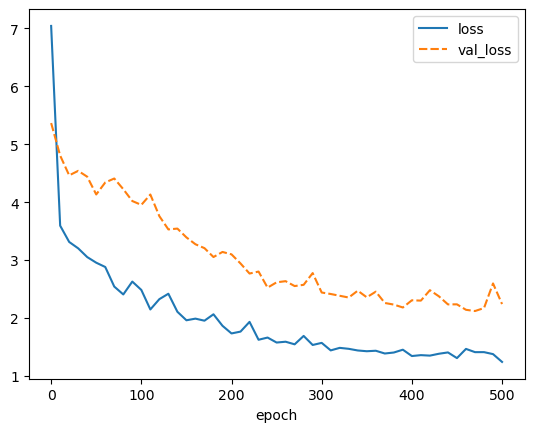

best weights loaded


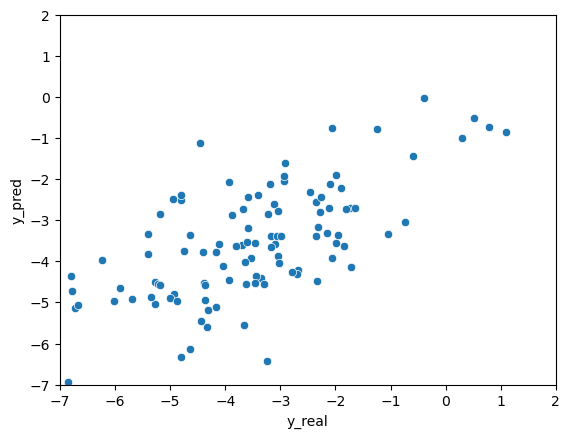

elapsed time: 100.02480506896973
run: 39
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5D64310>, <dgl.data.utils.Subset object at 0x000002F566573820>, <dgl.data.utils.Subset object at 0x000002F5665ECFA0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  68865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.4427191893259685 | Validation Loss 6.355213165283203
Epoch 10 | Train Loss 3.574559958775838 | Validation Loss 4.384799003601074
Epoch 20 | Train Loss 2.6997859319051107 | Validation Loss 4.080850124359131
Epoch 30 | Train Loss 2.2144374370574953 | Validation Loss 4.022688508033752
Epoch 40 | Train Loss 2.298208777109782 | Validation Loss 3.3501944541931152
Epoch 50 | Train Loss 1.7327657063802084 | Validation Loss 3.2095720767974854
Epoch 60 | Train Loss 1.7129679520924885 | Validation Loss 2.801798939704895
Epoch 70 | Train Loss 1.668175506591797 | Validation Loss 2.5541670322418213
Epoch 80 | Train Loss 1.370224944750468 | Validation Loss 2.4196447134017944
Epoch 90 | Train Loss 1.209744123617808 | Validation Loss 2.2191327810287476
Epoch 100 | Train Loss 1.1898431698481242 | Validation Loss 2.9886990785598755
Epoch 110 | Train Loss 1.0076388239860534 | Validation Loss 2.152320683002472
Epoch 120 | Train Loss 0.918153977394104 | Validation Loss 2.1667126417160

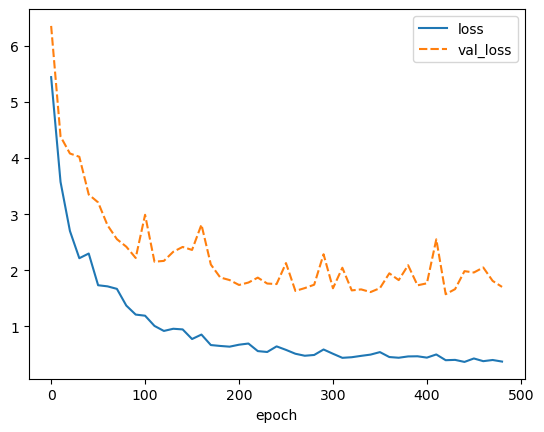

best weights loaded


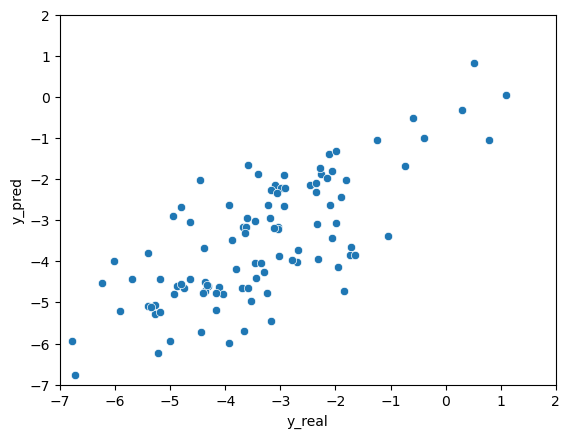

elapsed time: 110.2060215473175
run: 40
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F56638CD00>, <dgl.data.utils.Subset object at 0x000002F566758310>, <dgl.data.utils.Subset object at 0x000002F566758550>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  68609


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.073008759816488 | Validation Loss 4.977444171905518
Epoch 10 | Train Loss 3.7157350381215415 | Validation Loss 4.287316918373108
Epoch 20 | Train Loss 3.32558118502299 | Validation Loss 4.347637891769409
Epoch 30 | Train Loss 2.7809561173121136 | Validation Loss 4.251515865325928
Epoch 40 | Train Loss 2.5636314392089843 | Validation Loss 3.6717053651809692
Epoch 50 | Train Loss 2.112135736147563 | Validation Loss 3.7380775213241577
Epoch 60 | Train Loss 2.0252259890238444 | Validation Loss 3.086276888847351
Epoch 70 | Train Loss 1.7575559695561727 | Validation Loss 2.805670380592346
Epoch 80 | Train Loss 1.9520272413889568 | Validation Loss 3.156769633293152
Epoch 90 | Train Loss 1.4391539613405864 | Validation Loss 2.683694362640381
Epoch 100 | Train Loss 1.531131927172343 | Validation Loss 2.451813578605652
Epoch 110 | Train Loss 1.510452159245809 | Validation Loss 2.1851366758346558
Epoch 120 | Train Loss 1.2314326564470928 | Validation Loss 2.0396859645843506

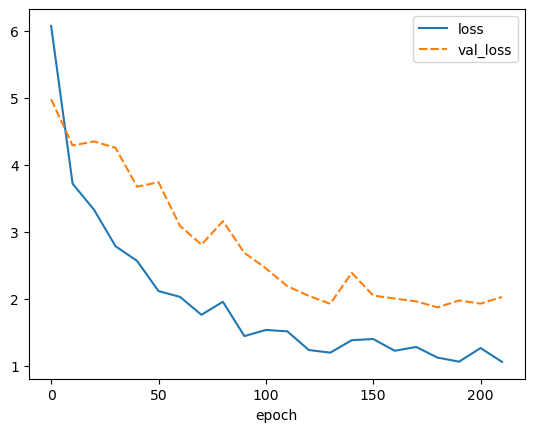

best weights loaded


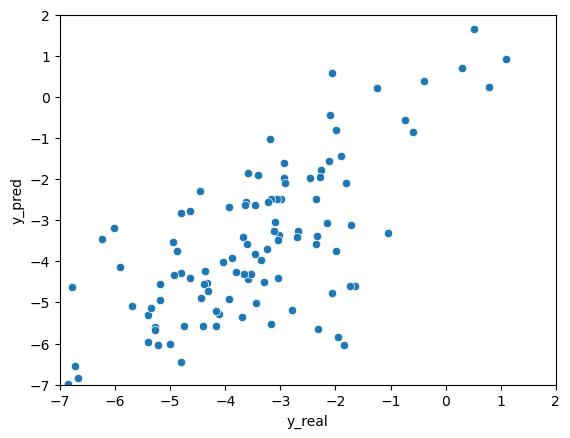

elapsed time: 47.67151641845703
run: 41
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D6FC3970>, <dgl.data.utils.Subset object at 0x000002F51EED62E0>, <dgl.data.utils.Subset object at 0x000002F51EED6550>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  68609


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.852421871821085 | Validation Loss 5.741752624511719
Epoch 10 | Train Loss 3.656949345270793 | Validation Loss 4.180520296096802
Epoch 20 | Train Loss 2.768098990122477 | Validation Loss 4.035657167434692
Epoch 30 | Train Loss 2.297875150044759 | Validation Loss 3.808906316757202
Epoch 40 | Train Loss 1.953535944223404 | Validation Loss 3.351807117462158
Epoch 50 | Train Loss 2.49912592569987 | Validation Loss 3.2086949348449707
Epoch 60 | Train Loss 1.5406248331069947 | Validation Loss 2.691059112548828
Epoch 70 | Train Loss 1.39239750901858 | Validation Loss 2.3873575925827026
Epoch 80 | Train Loss 1.4097813606262206 | Validation Loss 2.194881319999695
Epoch 90 | Train Loss 1.7118794957796732 | Validation Loss 2.541013717651367
Epoch 100 | Train Loss 1.2525969584782919 | Validation Loss 2.066045582294464
Epoch 110 | Train Loss 1.1496537605921426 | Validation Loss 2.2027580738067627
Epoch 120 | Train Loss 1.0590336839358012 | Validation Loss 2.555814802646637
Epo

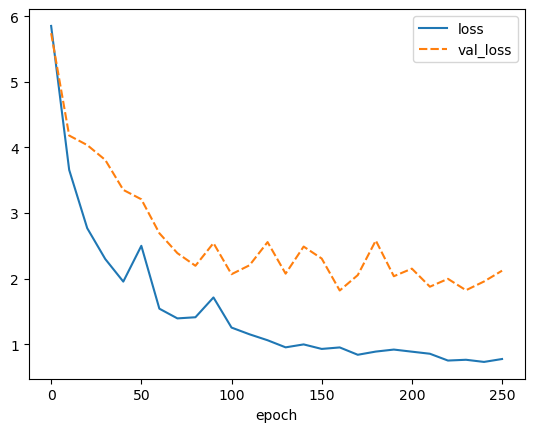

best weights loaded


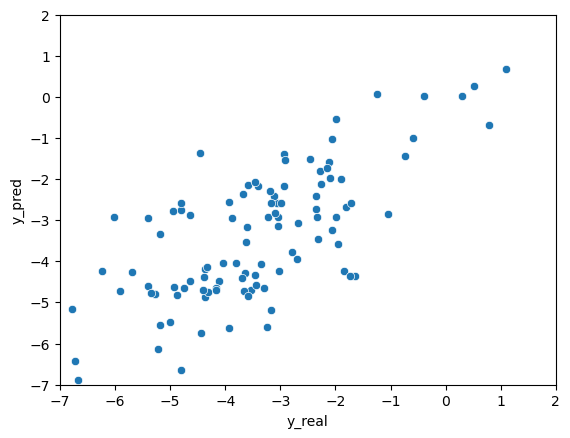

elapsed time: 57.60003733634949
run: 42
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5F8CDF0>, <dgl.data.utils.Subset object at 0x000002F56665B5B0>, <dgl.data.utils.Subset object at 0x000002F566530910>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  134657


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.34276933670044 | Validation Loss 7.527266025543213
Epoch 10 | Train Loss 2.9789872725804645 | Validation Loss 4.317305326461792
Epoch 20 | Train Loss 2.116306487719218 | Validation Loss 4.473250865936279
Epoch 30 | Train Loss 2.0784606178601583 | Validation Loss 3.59374737739563
Epoch 40 | Train Loss 1.7847564776738485 | Validation Loss 2.9069727659225464
Epoch 50 | Train Loss 1.722631780306498 | Validation Loss 2.5388253927230835
Epoch 60 | Train Loss 1.3607106884320577 | Validation Loss 2.7092514038085938
Epoch 70 | Train Loss 1.0265510429938633 | Validation Loss 1.9515966773033142
Epoch 80 | Train Loss 1.1878350377082825 | Validation Loss 2.5306025743484497
Epoch 90 | Train Loss 0.8507044672966003 | Validation Loss 1.9077092409133911
Epoch 100 | Train Loss 0.845521334807078 | Validation Loss 1.986954391002655
Epoch 110 | Train Loss 0.7402618527412415 | Validation Loss 2.309567868709564
Epoch 120 | Train Loss 0.8123700261116028 | Validation Loss 2.7808170318603

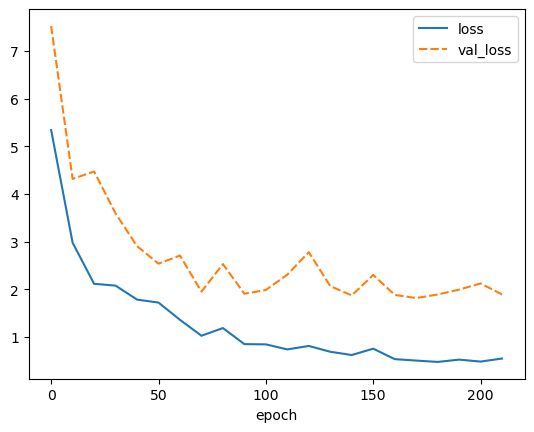

best weights loaded


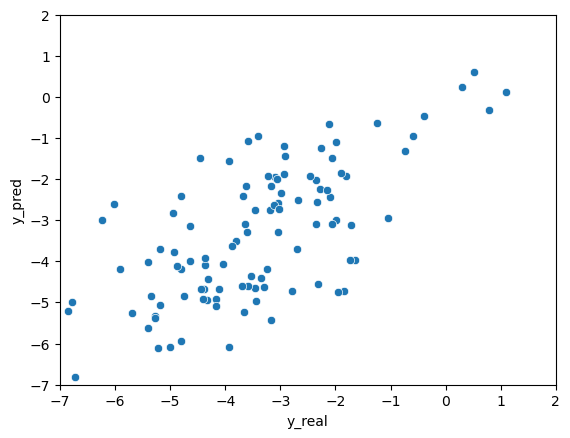

elapsed time: 55.659629583358765
run: 43
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F56609C190>, <dgl.data.utils.Subset object at 0x000002F5D723A280>, <dgl.data.utils.Subset object at 0x000002F5D723A4F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  134401


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.662073103586833 | Validation Loss 7.379740238189697
Epoch 10 | Train Loss 3.4798676490783693 | Validation Loss 4.850696563720703
Epoch 20 | Train Loss 2.815758530298869 | Validation Loss 3.9984995126724243
Epoch 30 | Train Loss 2.557519006729126 | Validation Loss 3.511600971221924
Epoch 40 | Train Loss 1.9063228766123455 | Validation Loss 2.739283323287964
Epoch 50 | Train Loss 1.5499456644058227 | Validation Loss 3.4350035190582275
Epoch 60 | Train Loss 1.4024151682853698 | Validation Loss 1.9860585927963257
Epoch 70 | Train Loss 1.4157876054445901 | Validation Loss 3.2241783142089844
Epoch 80 | Train Loss 1.4465644796689352 | Validation Loss 3.475441813468933
Epoch 90 | Train Loss 1.1075726389884948 | Validation Loss 3.618142247200012
Epoch 100 | Train Loss 1.1221062421798706 | Validation Loss 1.8243513703346252
Epoch 110 | Train Loss 1.0320793290932972 | Validation Loss 2.0275917053222656
Epoch 120 | Train Loss 1.231226642926534 | Validation Loss 1.73441576957

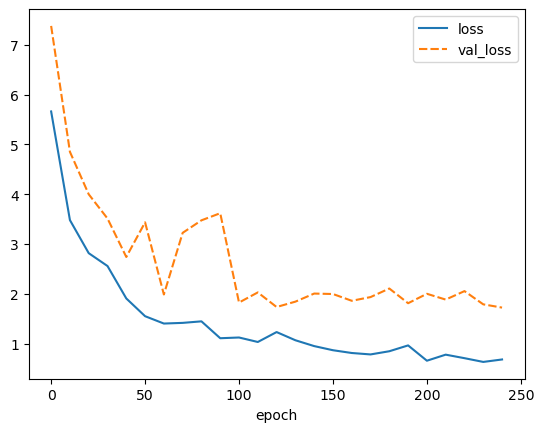

best weights loaded


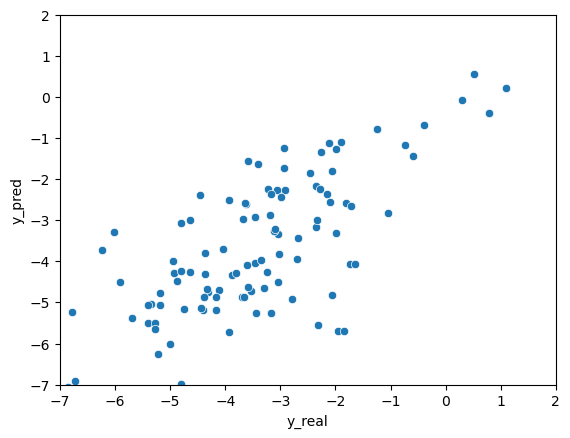

elapsed time: 61.139070987701416
run: 44
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F53FBC4580>, <dgl.data.utils.Subset object at 0x000002F5D5F1F3A0>, <dgl.data.utils.Subset object at 0x000002F5D5F1F1C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  134401


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.724641640981038 | Validation Loss 7.4876549243927
Epoch 10 | Train Loss 3.2405948479970297 | Validation Loss 4.48910927772522
Epoch 20 | Train Loss 2.7562174638112387 | Validation Loss 4.1736671924591064
Epoch 30 | Train Loss 2.327031397819519 | Validation Loss 3.614588499069214
Epoch 40 | Train Loss 2.488456622759501 | Validation Loss 3.1594247817993164
Epoch 50 | Train Loss 1.8955879211425781 | Validation Loss 2.8047667741775513
Epoch 60 | Train Loss 1.3262966871261597 | Validation Loss 2.4472532272338867
Epoch 70 | Train Loss 1.149099882443746 | Validation Loss 2.9216099977493286
Epoch 80 | Train Loss 1.206854224205017 | Validation Loss 2.3289071321487427
Epoch 90 | Train Loss 0.9862392107645671 | Validation Loss 2.714454770088196
Epoch 100 | Train Loss 0.9029893318812052 | Validation Loss 2.1162400245666504
Epoch 110 | Train Loss 0.8669053534666697 | Validation Loss 2.197865307331085
Epoch 120 | Train Loss 0.9494571288426717 | Validation Loss 1.79429715871810

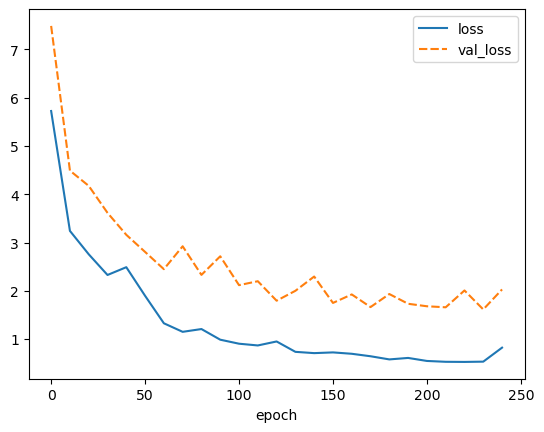

best weights loaded


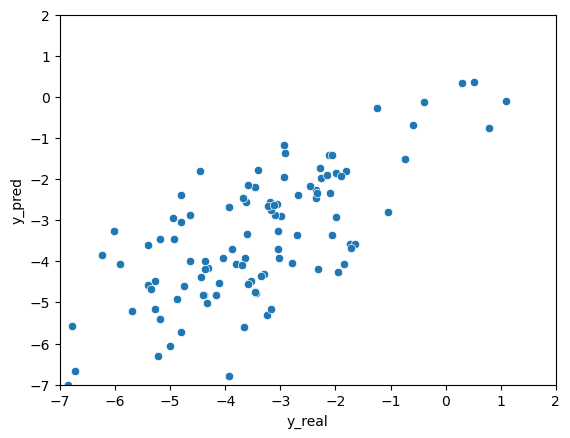

elapsed time: 63.88862228393555
run: 45
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5CD55B0>, <dgl.data.utils.Subset object at 0x000002F5D5D77DC0>, <dgl.data.utils.Subset object at 0x000002F5D5D68070>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.997266594568888 | Validation Loss 8.138221263885498
Epoch 10 | Train Loss 3.4073105653127036 | Validation Loss 4.1494786739349365
Epoch 20 | Train Loss 2.6577735424041746 | Validation Loss 3.832362651824951
Epoch 30 | Train Loss 1.9768929998079936 | Validation Loss 2.878631591796875
Epoch 40 | Train Loss 2.8083236535390217 | Validation Loss 3.2479583024978638
Epoch 50 | Train Loss 1.523839779694875 | Validation Loss 2.2439175844192505
Epoch 60 | Train Loss 1.4750170151392619 | Validation Loss 2.376542806625366
Epoch 70 | Train Loss 1.0403019726276397 | Validation Loss 2.298895239830017
Epoch 80 | Train Loss 0.8391595999399821 | Validation Loss 1.8673423528671265
Epoch 90 | Train Loss 0.7119554897149404 | Validation Loss 1.99545156955719
Epoch 100 | Train Loss 0.7387814919153849 | Validation Loss 1.9656548500061035
Epoch 110 | Train Loss 0.735261615117391 | Validation Loss 1.6513543128967285
Epoch 120 | Train Loss 0.8060756862163544 | Validation Loss 1.58593720197

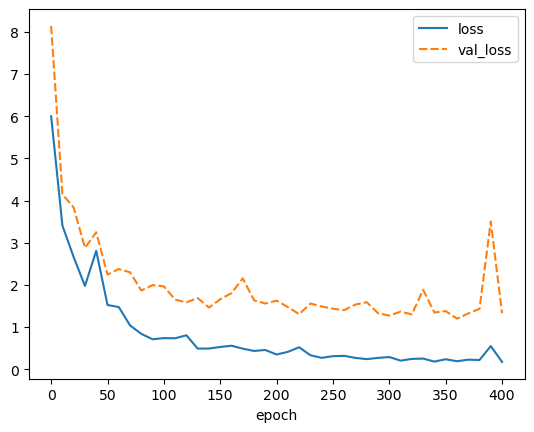

best weights loaded


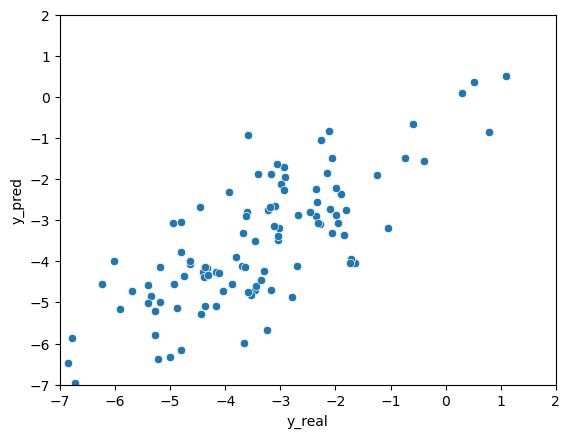

elapsed time: 119.7274158000946
run: 46
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F56642DA90>, <dgl.data.utils.Subset object at 0x000002F5664F5460>, <dgl.data.utils.Subset object at 0x000002F5664F5DC0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.397082916895548 | Validation Loss 6.597899913787842
Epoch 10 | Train Loss 3.386433219909668 | Validation Loss 4.386729001998901
Epoch 20 | Train Loss 2.5965967814127606 | Validation Loss 3.6985974311828613
Epoch 30 | Train Loss 2.035945097605387 | Validation Loss 2.757695198059082
Epoch 40 | Train Loss 1.8028272151947022 | Validation Loss 2.2422962188720703
Epoch 50 | Train Loss 1.8403213183085123 | Validation Loss 2.092270612716675
Epoch 60 | Train Loss 1.2019319772720336 | Validation Loss 2.214208960533142
Epoch 70 | Train Loss 1.0983475248018901 | Validation Loss 1.9957236051559448
Epoch 80 | Train Loss 1.2063802202542624 | Validation Loss 3.1413878202438354
Epoch 90 | Train Loss 1.0934446811676026 | Validation Loss 1.8512088060379028
Epoch 100 | Train Loss 0.9905281523863475 | Validation Loss 2.027015268802643
Epoch 110 | Train Loss 1.2039677143096923 | Validation Loss 1.8779352307319641
Epoch 120 | Train Loss 1.4436219498515128 | Validation Loss 1.7418474555

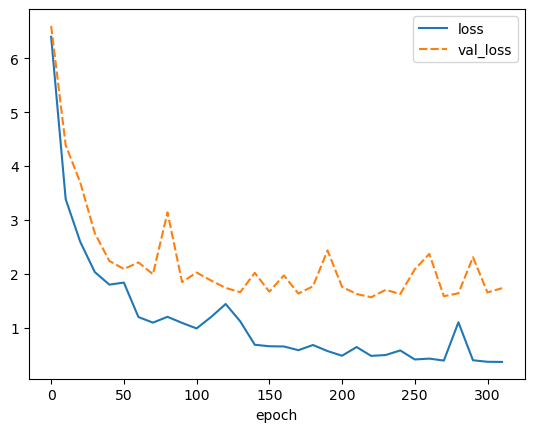

best weights loaded


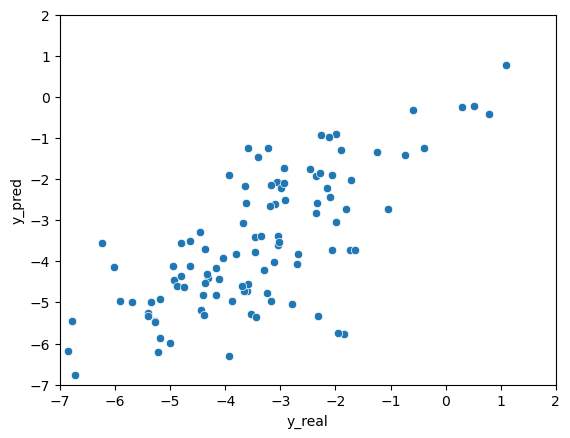

elapsed time: 89.12075686454773
run: 47
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5F0D550>, <dgl.data.utils.Subset object at 0x000002F566633A60>, <dgl.data.utils.Subset object at 0x000002F566633CD0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.764206329981486 | Validation Loss 7.613913059234619
Epoch 10 | Train Loss 2.7888723691304524 | Validation Loss 3.9524346590042114
Epoch 20 | Train Loss 2.2468196868896486 | Validation Loss 3.4440664052963257
Epoch 30 | Train Loss 1.7339480559031168 | Validation Loss 2.408342123031616
Epoch 40 | Train Loss 1.4137729247411093 | Validation Loss 2.2151190042495728
Epoch 50 | Train Loss 1.3510558684666951 | Validation Loss 3.097168803215027
Epoch 60 | Train Loss 1.1964921673138937 | Validation Loss 2.6118576526641846
Epoch 70 | Train Loss 0.9865239302317301 | Validation Loss 2.0390413403511047
Epoch 80 | Train Loss 1.0504745284716288 | Validation Loss 2.7370537519454956
Epoch 90 | Train Loss 0.6802463511625926 | Validation Loss 2.5308234691619873
Epoch 100 | Train Loss 0.7456328630447387 | Validation Loss 2.1083920001983643
Epoch 110 | Train Loss 0.8880279421806335 | Validation Loss 2.054420530796051
Epoch 120 | Train Loss 0.7353670994440714 | Validation Loss 1.961321

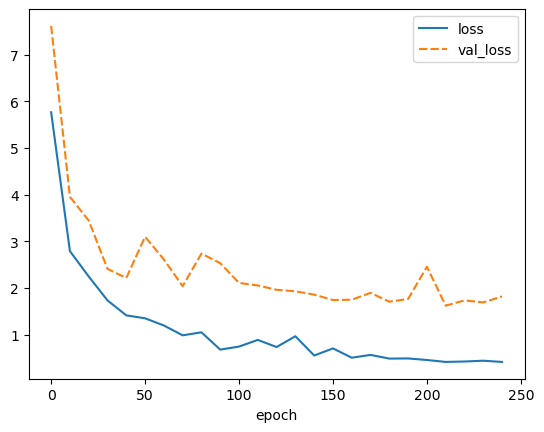

best weights loaded


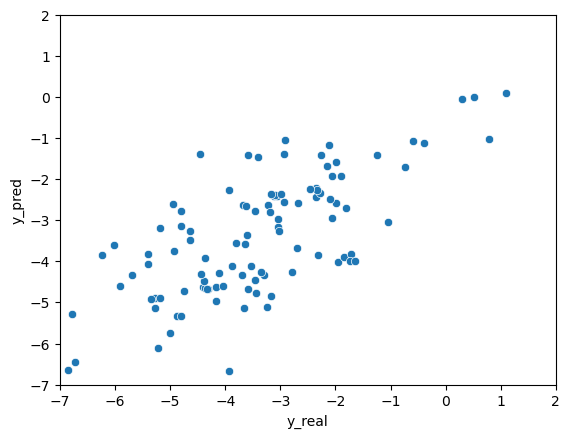

elapsed time: 74.18529200553894
run: 48
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5E68DF0>, <dgl.data.utils.Subset object at 0x000002F5660C1460>, <dgl.data.utils.Subset object at 0x000002F56634CA90>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  3073


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.174742285410563 | Validation Loss 4.780035018920898
Epoch 10 | Train Loss 3.486490273475647 | Validation Loss 4.526657819747925
Epoch 20 | Train Loss 3.314666430155436 | Validation Loss 4.269282817840576
Epoch 30 | Train Loss 3.1710458596547446 | Validation Loss 4.1916433572769165
Epoch 40 | Train Loss 2.9539145628611245 | Validation Loss 4.340789079666138
Epoch 50 | Train Loss 2.6613083918889364 | Validation Loss 4.336601495742798
Epoch 60 | Train Loss 2.4266401688257853 | Validation Loss 4.340749025344849
Epoch 70 | Train Loss 2.455661145846049 | Validation Loss 3.963874936103821
Epoch 80 | Train Loss 2.2064697186152142 | Validation Loss 4.137503147125244
Epoch 90 | Train Loss 2.1788471937179565 | Validation Loss 4.002792239189148
Epoch 100 | Train Loss 1.990475300947825 | Validation Loss 4.211902141571045
Epoch 110 | Train Loss 1.988573932647705 | Validation Loss 3.4973970651626587
Epoch 120 | Train Loss 1.877614943186442 | Validation Loss 3.5175909996032715
E

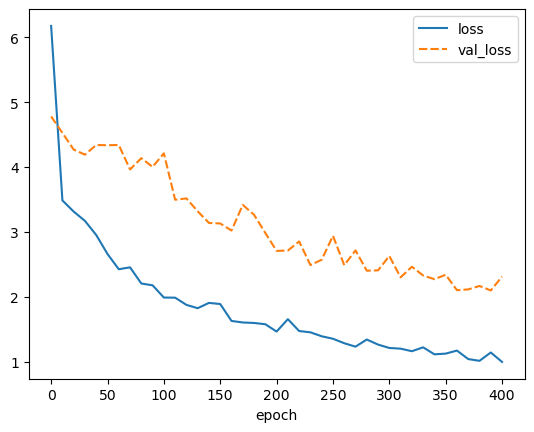

best weights loaded


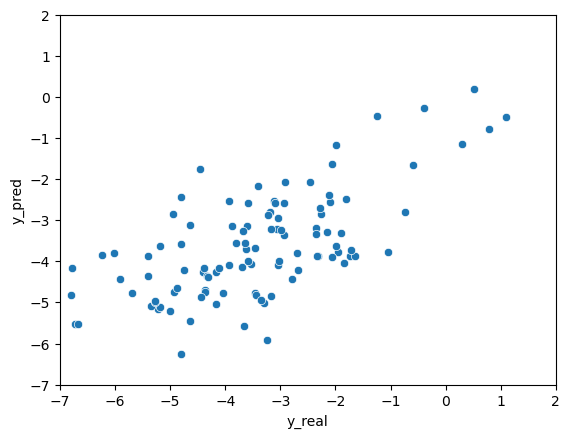

elapsed time: 85.2419102191925
run: 49
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5665204F0>, <dgl.data.utils.Subset object at 0x000002F566341040>, <dgl.data.utils.Subset object at 0x000002F566341DF0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  2817


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.123663489023844 | Validation Loss 6.248069763183594
Epoch 10 | Train Loss 3.7928878466288247 | Validation Loss 4.647130608558655
Epoch 20 | Train Loss 3.721610991160075 | Validation Loss 4.633086681365967
Epoch 30 | Train Loss 3.7662505149841308 | Validation Loss 4.890018939971924
Epoch 40 | Train Loss 3.3657431761423746 | Validation Loss 4.6595330238342285
Epoch 50 | Train Loss 3.4072125275929768 | Validation Loss 4.302891135215759
Epoch 60 | Train Loss 3.159571671485901 | Validation Loss 4.505584239959717
Epoch 70 | Train Loss 3.0825566689173383 | Validation Loss 4.126260161399841
Epoch 80 | Train Loss 2.8779758056004843 | Validation Loss 4.413296818733215
Epoch 90 | Train Loss 2.844613862037659 | Validation Loss 3.9301726818084717
Epoch 100 | Train Loss 2.655233097076416 | Validation Loss 4.248853445053101
Epoch 110 | Train Loss 2.8044142882029215 | Validation Loss 3.919691324234009
Epoch 120 | Train Loss 2.5844544569651284 | Validation Loss 3.8850449323654175

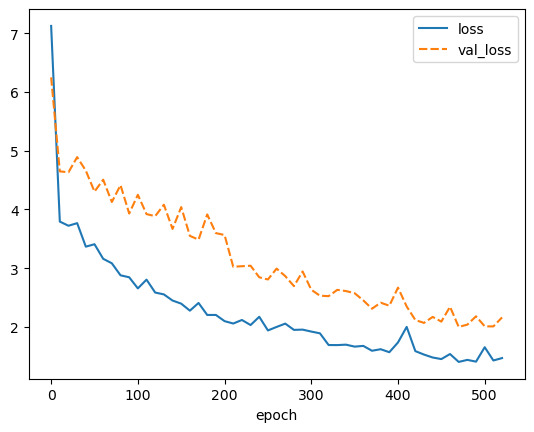

best weights loaded


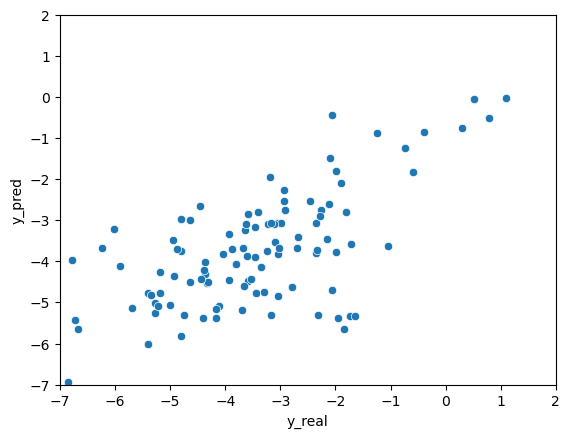

elapsed time: 102.24794030189514
run: 50
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F53FBD95E0>, <dgl.data.utils.Subset object at 0x000002F5D7273040>, <dgl.data.utils.Subset object at 0x000002F5D72797F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  2817


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.838812923431396 | Validation Loss 5.173688650131226
Epoch 10 | Train Loss 3.7480372905731203 | Validation Loss 4.842506647109985
Epoch 20 | Train Loss 3.6327201684315997 | Validation Loss 4.3522210121154785
Epoch 30 | Train Loss 3.131029538313548 | Validation Loss 4.429385185241699
Epoch 40 | Train Loss 3.043071683247884 | Validation Loss 4.37586236000061
Epoch 50 | Train Loss 3.150264326731364 | Validation Loss 4.110981583595276
Epoch 60 | Train Loss 2.8686118125915527 | Validation Loss 4.385001182556152
Epoch 70 | Train Loss 2.7502903938293457 | Validation Loss 4.198763012886047
Epoch 80 | Train Loss 2.658682386080424 | Validation Loss 4.21731960773468
Epoch 90 | Train Loss 2.6001410643259684 | Validation Loss 4.148826599121094


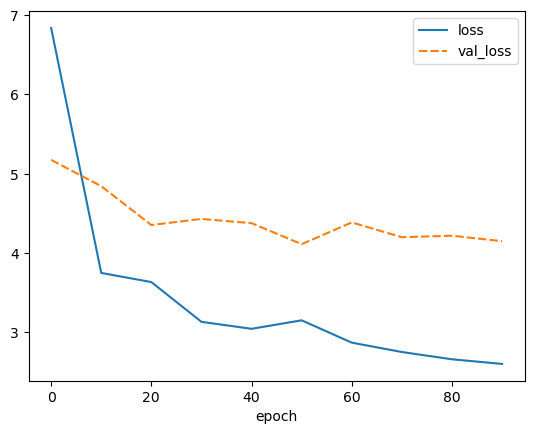

best weights loaded


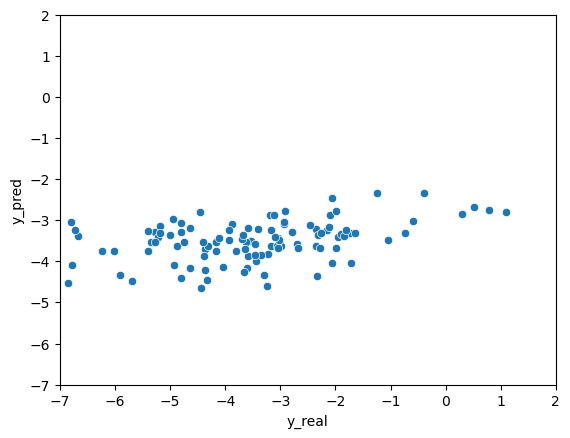

elapsed time: 20.36667513847351
run: 51
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566276310>, <dgl.data.utils.Subset object at 0x000002F56664CA60>, <dgl.data.utils.Subset object at 0x000002F56664CD00>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  68865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.697155567010244 | Validation Loss 5.671322584152222
Epoch 10 | Train Loss 3.6294943968455 | Validation Loss 4.665076732635498
Epoch 20 | Train Loss 2.679663300514221 | Validation Loss 4.413290977478027
Epoch 30 | Train Loss 2.2665980736414593 | Validation Loss 3.774498462677002
Epoch 40 | Train Loss 2.423761836687724 | Validation Loss 3.4261717796325684
Epoch 50 | Train Loss 1.847749662399292 | Validation Loss 3.188065528869629
Epoch 60 | Train Loss 1.774645249048869 | Validation Loss 2.8700058460235596
Epoch 70 | Train Loss 1.6892151355743408 | Validation Loss 2.605080485343933
Epoch 80 | Train Loss 1.5640590031941732 | Validation Loss 2.316574215888977
Epoch 90 | Train Loss 1.1962562402089436 | Validation Loss 2.1400980949401855
Epoch 100 | Train Loss 1.1426008661588034 | Validation Loss 2.1935030817985535
Epoch 110 | Train Loss 0.9727276047070821 | Validation Loss 2.1428210735321045
Epoch 120 | Train Loss 0.9274225274721781 | Validation Loss 1.982201099395752


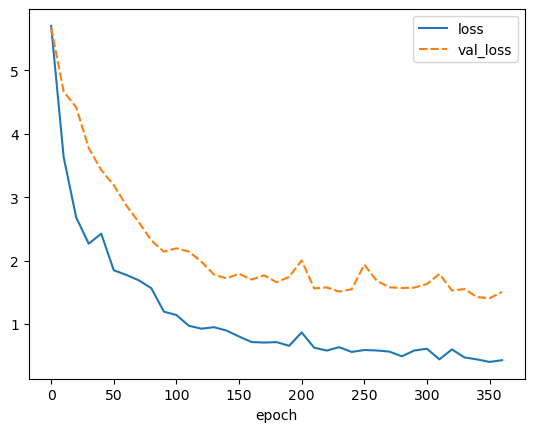

best weights loaded


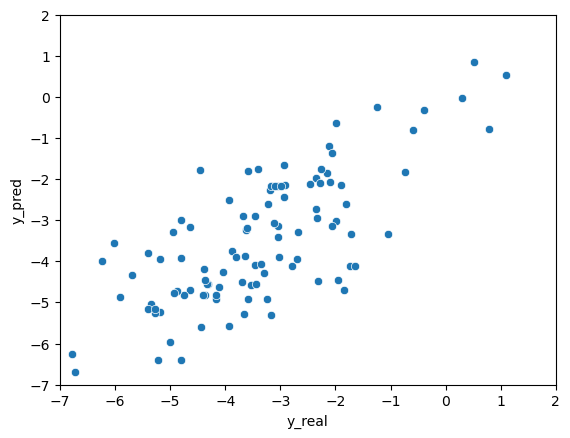

elapsed time: 90.38357400894165
run: 52
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566426B80>, <dgl.data.utils.Subset object at 0x000002F5D72536A0>, <dgl.data.utils.Subset object at 0x000002F5D7253910>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  68609


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.514932664235433 | Validation Loss 5.251735687255859
Epoch 10 | Train Loss 3.8880661964416503 | Validation Loss 4.490884780883789
Epoch 20 | Train Loss 3.391747315724691 | Validation Loss 4.0237414836883545
Epoch 30 | Train Loss 2.6402723948160807 | Validation Loss 3.820401191711426
Epoch 40 | Train Loss 2.1928216934204103 | Validation Loss 3.24476420879364
Epoch 50 | Train Loss 2.162153426806132 | Validation Loss 2.9651440382003784
Epoch 60 | Train Loss 1.8119826237360637 | Validation Loss 2.5976101756095886
Epoch 70 | Train Loss 1.8296026229858398 | Validation Loss 2.27894127368927
Epoch 80 | Train Loss 1.4739909648895264 | Validation Loss 2.1744120717048645
Epoch 90 | Train Loss 1.4446076591809591 | Validation Loss 2.8605910539627075
Epoch 100 | Train Loss 1.3708210865656534 | Validation Loss 1.9731516242027283
Epoch 110 | Train Loss 1.2096791205306847 | Validation Loss 1.895189106464386
Epoch 120 | Train Loss 1.2159704248110452 | Validation Loss 1.828608274459

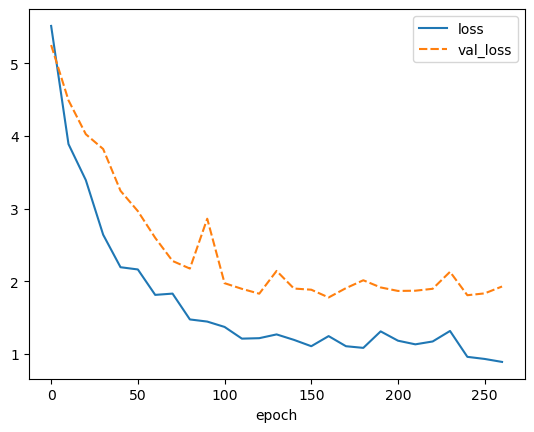

best weights loaded


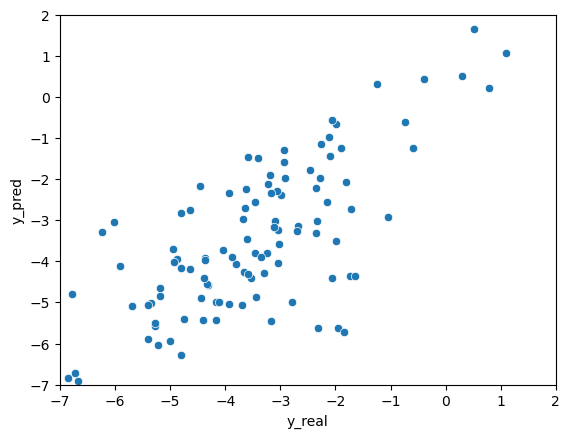

elapsed time: 61.746777057647705
run: 53
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5D99100>, <dgl.data.utils.Subset object at 0x000002F5D5D18580>, <dgl.data.utils.Subset object at 0x000002F5D5D18640>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  68609


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.074530982971192 | Validation Loss 5.711199045181274
Epoch 10 | Train Loss 3.5198856830596923 | Validation Loss 4.566542387008667
Epoch 20 | Train Loss 2.6667560338974 | Validation Loss 4.300166487693787
Epoch 30 | Train Loss 2.400993259747823 | Validation Loss 3.861642837524414
Epoch 40 | Train Loss 1.9783290386199952 | Validation Loss 3.578921675682068
Epoch 50 | Train Loss 2.0563113768895467 | Validation Loss 3.925447106361389
Epoch 60 | Train Loss 1.572551041841507 | Validation Loss 2.8700270652770996
Epoch 70 | Train Loss 1.8508058865865071 | Validation Loss 2.8329139947891235
Epoch 80 | Train Loss 1.4318724314371745 | Validation Loss 2.316581904888153
Epoch 90 | Train Loss 1.3330941160519918 | Validation Loss 4.402837038040161
Epoch 100 | Train Loss 1.3223862886428832 | Validation Loss 2.6309714317321777
Epoch 110 | Train Loss 1.103068200747172 | Validation Loss 2.095572829246521
Epoch 120 | Train Loss 1.1537422021230062 | Validation Loss 2.270553708076477
E

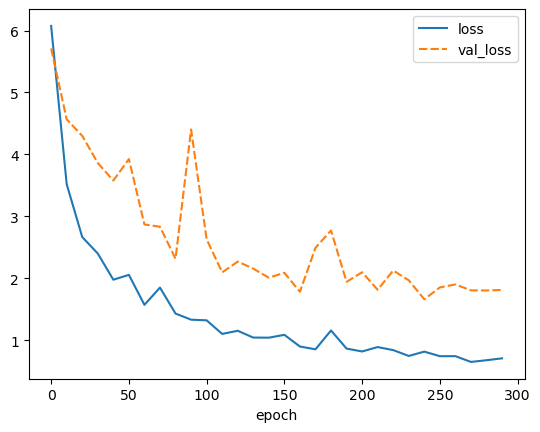

best weights loaded


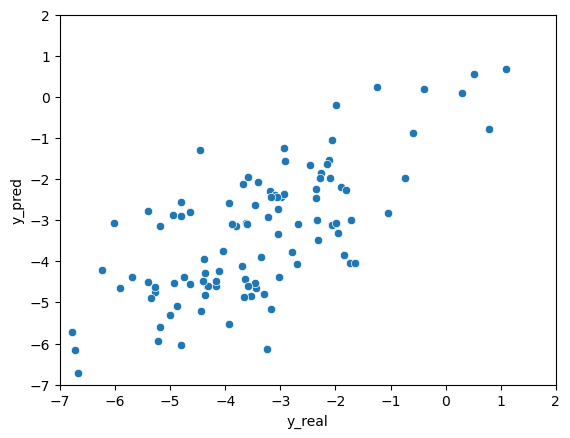

elapsed time: 81.78425884246826
run: 54
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5E51FD0>, <dgl.data.utils.Subset object at 0x000002F5D5EF6D60>, <dgl.data.utils.Subset object at 0x000002F566487CD0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  134657


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.7045316378275555 | Validation Loss 7.176547527313232
Epoch 10 | Train Loss 3.03013235727946 | Validation Loss 4.220077276229858
Epoch 20 | Train Loss 2.355361493428548 | Validation Loss 3.655253291130066
Epoch 30 | Train Loss 1.979177180926005 | Validation Loss 2.6804070472717285
Epoch 40 | Train Loss 1.493106468518575 | Validation Loss 2.76066517829895
Epoch 50 | Train Loss 1.413118632634481 | Validation Loss 2.2725889682769775
Epoch 60 | Train Loss 1.2464031100273132 | Validation Loss 2.03642874956131
Epoch 70 | Train Loss 1.0249300479888916 | Validation Loss 2.022605061531067
Epoch 80 | Train Loss 0.9634333252906799 | Validation Loss 1.8047699928283691
Epoch 90 | Train Loss 0.8769636829694112 | Validation Loss 2.397676706314087
Epoch 100 | Train Loss 0.8019458413124084 | Validation Loss 1.7796209454536438
Epoch 110 | Train Loss 0.6947366972764333 | Validation Loss 1.87778902053833
Epoch 120 | Train Loss 0.6918728053569794 | Validation Loss 1.6729351878166199
E

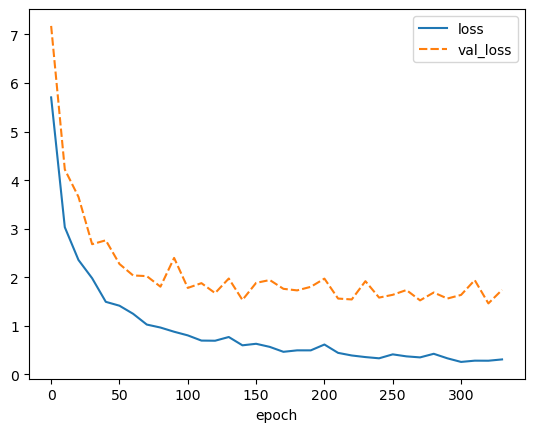

best weights loaded


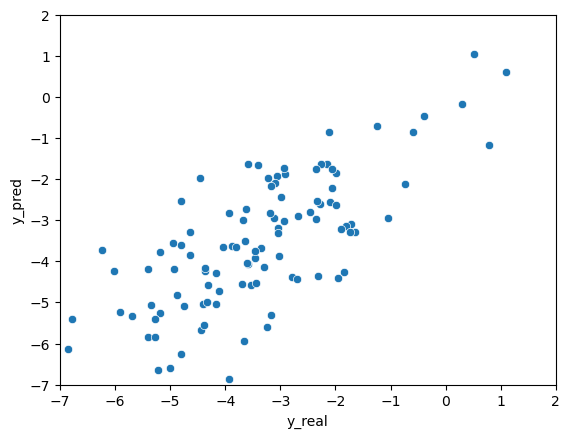

elapsed time: 97.19773483276367
run: 55
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5DE05E0>, <dgl.data.utils.Subset object at 0x000002F5D92AEA00>, <dgl.data.utils.Subset object at 0x000002F5D92AEC70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  134401


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.6520220597585045 | Validation Loss 6.75551176071167
Epoch 10 | Train Loss 3.5719498793284097 | Validation Loss 4.8752686977386475
Epoch 20 | Train Loss 3.324696739514669 | Validation Loss 4.2360999584198
Epoch 30 | Train Loss 2.52399906317393 | Validation Loss 4.231202960014343
Epoch 40 | Train Loss 2.909198757012685 | Validation Loss 3.759517788887024
Epoch 50 | Train Loss 1.987166198094686 | Validation Loss 3.5927562713623047
Epoch 60 | Train Loss 1.50885808467865 | Validation Loss 2.2336851358413696
Epoch 70 | Train Loss 1.5354398647944132 | Validation Loss 2.122866988182068
Epoch 80 | Train Loss 1.6905773242314657 | Validation Loss 2.85741651058197
Epoch 90 | Train Loss 1.1469646414120993 | Validation Loss 2.6127755641937256
Epoch 100 | Train Loss 1.3041603128115336 | Validation Loss 1.982850968837738
Epoch 110 | Train Loss 1.1799888094266255 | Validation Loss 2.209516167640686
Epoch 120 | Train Loss 1.2453105290730795 | Validation Loss 2.1414631605148315
Epo

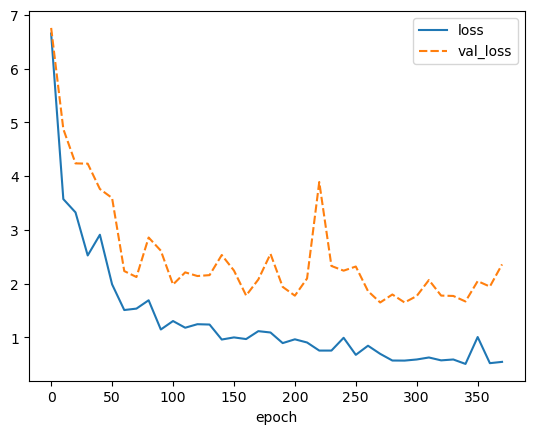

best weights loaded


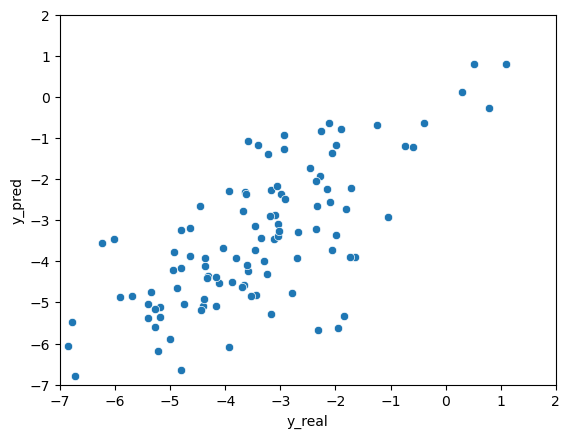

elapsed time: 102.76406359672546
run: 56
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566431100>, <dgl.data.utils.Subset object at 0x000002F566422AC0>, <dgl.data.utils.Subset object at 0x000002F566422D90>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  134401


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.751419274012248 | Validation Loss 6.97704553604126
Epoch 10 | Train Loss 3.1128661314646404 | Validation Loss 3.948278546333313
Epoch 20 | Train Loss 2.432578372955322 | Validation Loss 3.9192699193954468
Epoch 30 | Train Loss 2.2019104321797687 | Validation Loss 3.3449918031692505
Epoch 40 | Train Loss 1.5924269795417785 | Validation Loss 3.041225552558899
Epoch 50 | Train Loss 1.6496015787124634 | Validation Loss 2.6757237911224365
Epoch 60 | Train Loss 1.8257479508717855 | Validation Loss 2.0418678522109985
Epoch 70 | Train Loss 1.010723320643107 | Validation Loss 2.050169050693512
Epoch 80 | Train Loss 0.964346436659495 | Validation Loss 2.440160870552063
Epoch 90 | Train Loss 0.9673733393351237 | Validation Loss 2.0547935962677
Epoch 100 | Train Loss 0.7899240990479787 | Validation Loss 2.0657597184181213
Epoch 110 | Train Loss 0.8145838002363841 | Validation Loss 2.02108371257782
Epoch 120 | Train Loss 0.7826721211274464 | Validation Loss 1.9767470955848694

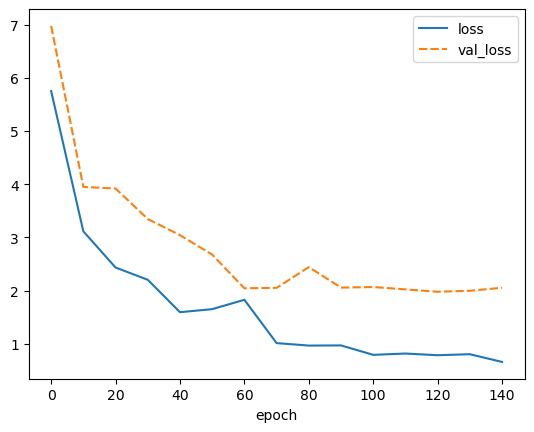

best weights loaded


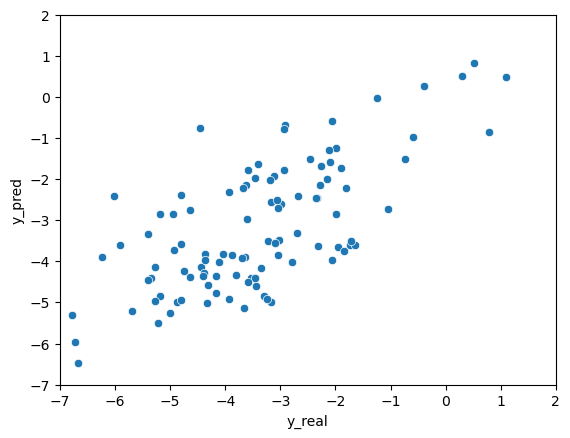

elapsed time: 44.916502237319946
run: 57
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566431F10>, <dgl.data.utils.Subset object at 0x000002F522EDE2E0>, <dgl.data.utils.Subset object at 0x000002F522EDE550>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.2642953554789225 | Validation Loss 7.492938041687012
Epoch 10 | Train Loss 2.8264591217041017 | Validation Loss 4.332202911376953
Epoch 20 | Train Loss 2.383949788411458 | Validation Loss 4.105209231376648
Epoch 30 | Train Loss 1.875076715151469 | Validation Loss 2.733691930770874
Epoch 40 | Train Loss 1.4695222099622092 | Validation Loss 2.0701431035995483
Epoch 50 | Train Loss 1.2256215373675028 | Validation Loss 2.6251786947250366
Epoch 60 | Train Loss 1.2067711750666301 | Validation Loss 1.801390290260315
Epoch 70 | Train Loss 1.0695797244707743 | Validation Loss 2.6817548274993896
Epoch 80 | Train Loss 0.8999961276849111 | Validation Loss 2.074555456638336
Epoch 90 | Train Loss 0.775078022480011 | Validation Loss 2.1326920986175537
Epoch 100 | Train Loss 0.775729755560557 | Validation Loss 2.2398940324783325
Epoch 110 | Train Loss 0.6531143665313721 | Validation Loss 1.93784499168396
Epoch 120 | Train Loss 0.6055829008420308 | Validation Loss 2.8560942411422

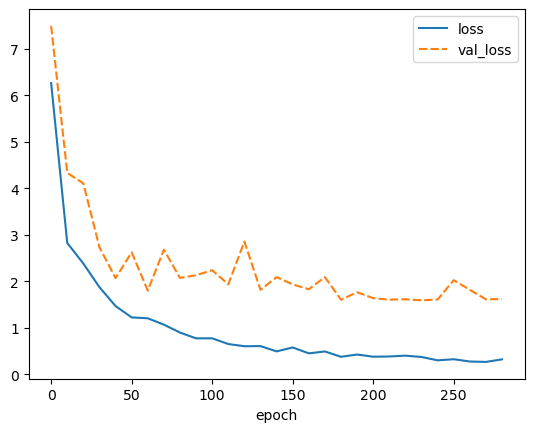

best weights loaded


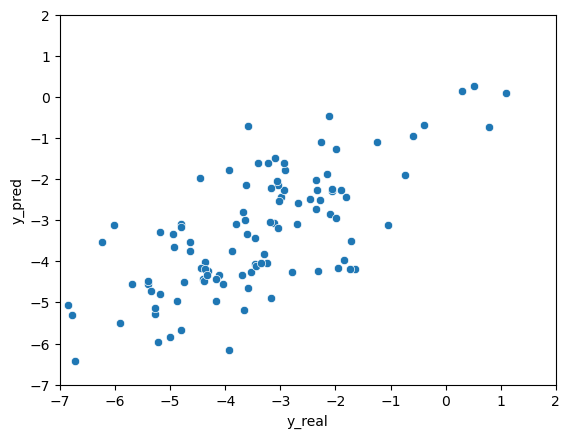

elapsed time: 94.2073814868927
run: 58
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5664145E0>, <dgl.data.utils.Subset object at 0x000002F5D5F8E760>, <dgl.data.utils.Subset object at 0x000002F5D5F8ED00>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.56910506884257 | Validation Loss 7.288322925567627
Epoch 10 | Train Loss 3.628223355611165 | Validation Loss 4.303669810295105
Epoch 20 | Train Loss 3.0145952145258588 | Validation Loss 4.176190733909607
Epoch 30 | Train Loss 2.330331039428711 | Validation Loss 3.235617995262146
Epoch 40 | Train Loss 1.9122302611668904 | Validation Loss 2.234539270401001
Epoch 50 | Train Loss 1.534216837088267 | Validation Loss 2.183021664619446
Epoch 60 | Train Loss 1.305601183573405 | Validation Loss 2.3644529581069946
Epoch 70 | Train Loss 1.153628146648407 | Validation Loss 2.791274905204773
Epoch 80 | Train Loss 1.7173972527186077 | Validation Loss 2.4333640336990356
Epoch 90 | Train Loss 1.605151395003001 | Validation Loss 1.8603559136390686
Epoch 100 | Train Loss 1.0867914795875548 | Validation Loss 2.5427732467651367
Epoch 110 | Train Loss 0.7611921350161235 | Validation Loss 2.0223933458328247
Epoch 120 | Train Loss 0.8225385457277298 | Validation Loss 1.8464752435684204

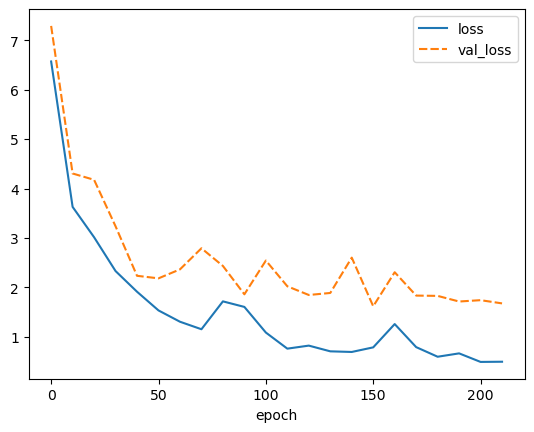

best weights loaded


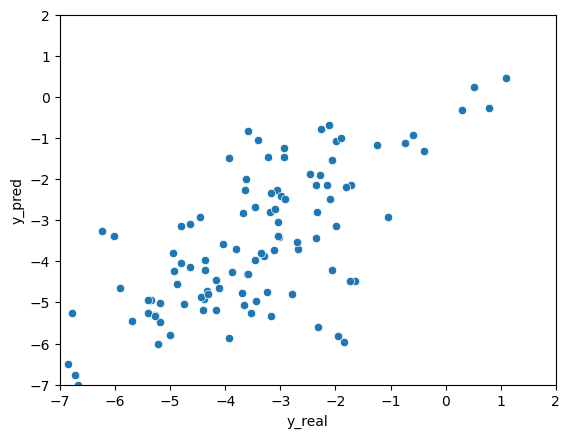

elapsed time: 66.85359525680542
run: 59
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5EE0C10>, <dgl.data.utils.Subset object at 0x000002F5D5D418B0>, <dgl.data.utils.Subset object at 0x000002F5D5D41B20>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.40707086722056 | Validation Loss 6.466450452804565
Epoch 10 | Train Loss 3.326164404551188 | Validation Loss 4.222179174423218
Epoch 20 | Train Loss 2.340194320678711 | Validation Loss 4.453060865402222
Epoch 30 | Train Loss 1.7991244316101074 | Validation Loss 2.4052928686141968
Epoch 40 | Train Loss 1.5003517230351766 | Validation Loss 3.177433133125305
Epoch 50 | Train Loss 1.1687050422032674 | Validation Loss 2.306129217147827
Epoch 60 | Train Loss 0.9984107096989949 | Validation Loss 2.293615996837616
Epoch 70 | Train Loss 1.1765019237995147 | Validation Loss 1.8121432662010193
Epoch 80 | Train Loss 0.7919161558151245 | Validation Loss 3.481683135032654
Epoch 90 | Train Loss 0.7305655280749003 | Validation Loss 1.8752644062042236
Epoch 100 | Train Loss 1.0060176114241282 | Validation Loss 1.8766987323760986
Epoch 110 | Train Loss 0.8999932289123536 | Validation Loss 1.9192352294921875
Epoch 120 | Train Loss 1.0060256401697794 | Validation Loss 1.794800162315

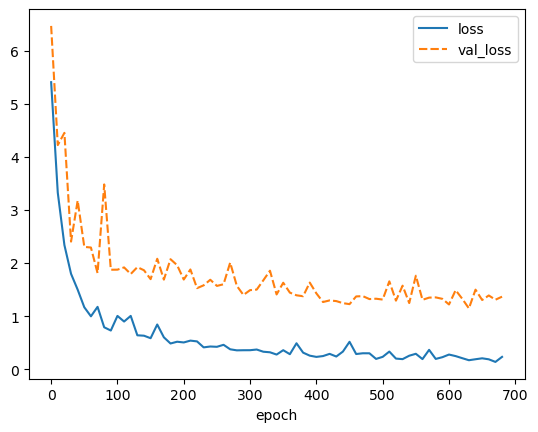

best weights loaded


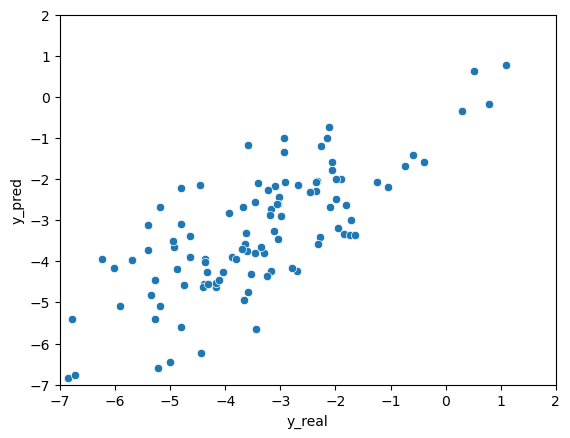

elapsed time: 212.09859991073608
run: 60
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5661A9A00>, <dgl.data.utils.Subset object at 0x000002F522F29190>, <dgl.data.utils.Subset object at 0x000002F5D5DFED60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  3073


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.78141222000122 | Validation Loss 4.578457951545715
Epoch 10 | Train Loss 3.947382164001465 | Validation Loss 4.586205720901489
Epoch 20 | Train Loss 3.2586157162984213 | Validation Loss 4.342673301696777
Epoch 30 | Train Loss 3.027138908704122 | Validation Loss 4.374501466751099
Epoch 40 | Train Loss 3.104379916191101 | Validation Loss 4.072246074676514
Epoch 50 | Train Loss 2.6838523546854653 | Validation Loss 4.2855541706085205
Epoch 60 | Train Loss 2.458636514345805 | Validation Loss 4.335641860961914
Epoch 70 | Train Loss 2.3696961402893066 | Validation Loss 3.888889193534851
Epoch 80 | Train Loss 2.1455208102862042 | Validation Loss 4.203026533126831
Epoch 90 | Train Loss 2.1141607840855916 | Validation Loss 3.843336820602417
Epoch 100 | Train Loss 2.0310468395551045 | Validation Loss 4.134811758995056
Epoch 110 | Train Loss 2.136605413754781 | Validation Loss 3.6156160831451416
Epoch 120 | Train Loss 1.9366800626118978 | Validation Loss 3.7888338565826416
E

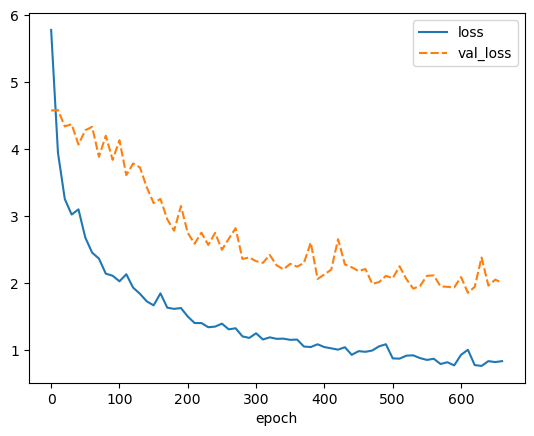

best weights loaded


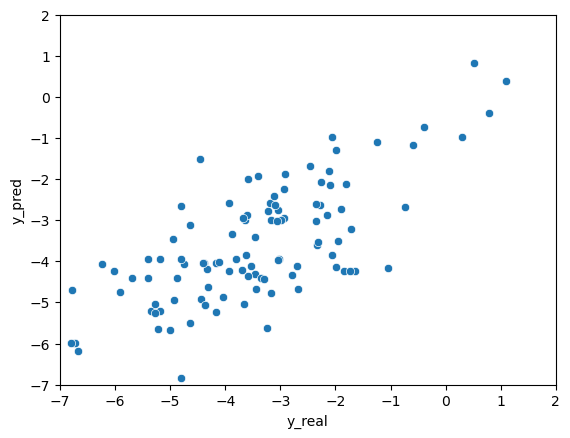

elapsed time: 154.3371205329895
run: 61
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5F8DFA0>, <dgl.data.utils.Subset object at 0x000002F51EE84640>, <dgl.data.utils.Subset object at 0x000002F51EE848B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  2817
Epoch 0 | Train Loss 9.723157087961832 | Validation Loss 8.128775119781494


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.972316106160482 | Validation Loss 4.7398459911346436
Epoch 20 | Train Loss 3.788187599182129 | Validation Loss 4.809263706207275
Epoch 30 | Train Loss 3.4945667664210003 | Validation Loss 4.359564542770386
Epoch 40 | Train Loss 3.414084959030151 | Validation Loss 4.552781820297241
Epoch 50 | Train Loss 3.398271338144938 | Validation Loss 4.481091022491455
Epoch 60 | Train Loss 3.041261593500773 | Validation Loss 4.415712356567383
Epoch 70 | Train Loss 3.126904344558716 | Validation Loss 4.36147141456604
Epoch 80 | Train Loss 2.9760283629099527 | Validation Loss 3.9632097482681274
Epoch 90 | Train Loss 2.6777212142944338 | Validation Loss 4.333012342453003
Epoch 100 | Train Loss 2.6944719314575196 | Validation Loss 3.8181684017181396
Epoch 110 | Train Loss 2.6273591995239256 | Validation Loss 4.014787673950195
Epoch 120 | Train Loss 2.762025896708171 | Validation Loss 4.261893391609192
Epoch 130 | Train Loss 2.6382034540176393 | Validation Loss 3.7168025970458984

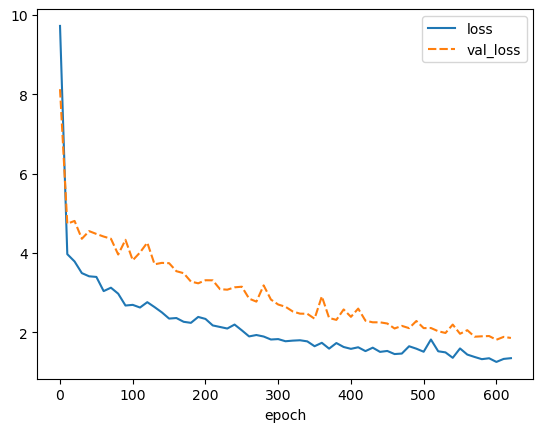

best weights loaded


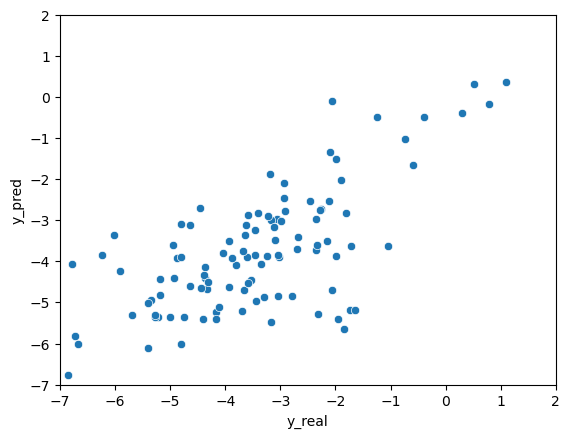

elapsed time: 134.68536686897278
run: 62
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5616A7AF0>, <dgl.data.utils.Subset object at 0x000002F5D92DB070>, <dgl.data.utils.Subset object at 0x000002F5D92DBBE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  2817


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.976139132181803 | Validation Loss 5.149785757064819
Epoch 10 | Train Loss 3.6558825333913165 | Validation Loss 4.7731406688690186
Epoch 20 | Train Loss 3.4741816679636637 | Validation Loss 4.3693578243255615
Epoch 30 | Train Loss 3.1496331771214803 | Validation Loss 4.275295734405518
Epoch 40 | Train Loss 3.2070292154947917 | Validation Loss 4.337310791015625
Epoch 50 | Train Loss 2.967969870567322 | Validation Loss 4.188045501708984
Epoch 60 | Train Loss 2.975836928685506 | Validation Loss 4.319306254386902
Epoch 70 | Train Loss 2.9493549903233847 | Validation Loss 4.091863989830017
Epoch 80 | Train Loss 2.5528523047765095 | Validation Loss 4.114433526992798
Epoch 90 | Train Loss 2.4478584051132204 | Validation Loss 4.0932124853134155
Epoch 100 | Train Loss 2.3650713602701825 | Validation Loss 4.116500735282898
Epoch 110 | Train Loss 2.2947258631388348 | Validation Loss 3.8769118785858154
Epoch 120 | Train Loss 2.319528881708781 | Validation Loss 3.7557065486907

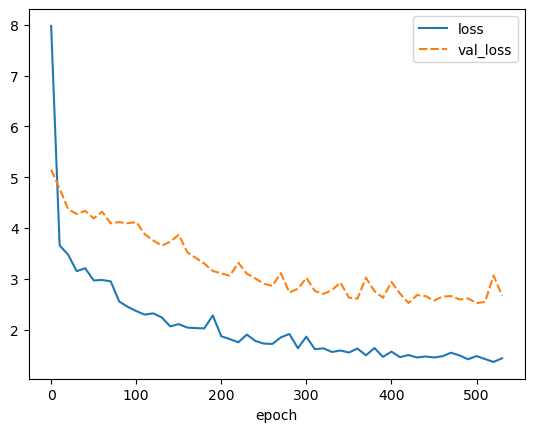

best weights loaded


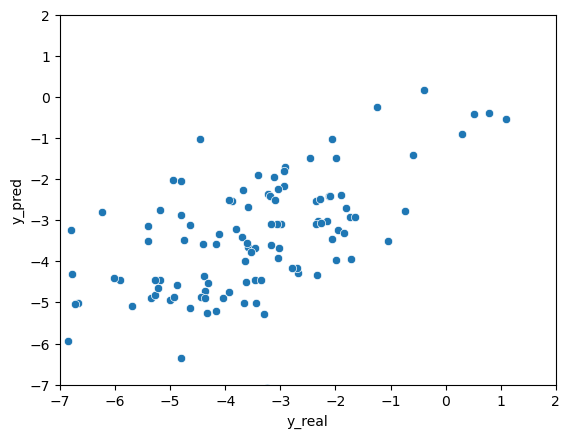

elapsed time: 111.1754400730133
run: 63
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5D9EA90>, <dgl.data.utils.Subset object at 0x000002F5665EC8B0>, <dgl.data.utils.Subset object at 0x000002F5665ECA60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  68865


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.754922819137573 | Validation Loss 4.967777967453003
Epoch 10 | Train Loss 3.448891011873881 | Validation Loss 4.339522361755371
Epoch 20 | Train Loss 3.1635785420735676 | Validation Loss 4.848111867904663
Epoch 30 | Train Loss 2.339509359995524 | Validation Loss 3.956032872200012
Epoch 40 | Train Loss 2.0343477725982666 | Validation Loss 3.5049980878829956
Epoch 50 | Train Loss 1.97093292872111 | Validation Loss 2.9370510578155518
Epoch 60 | Train Loss 1.6179592291514078 | Validation Loss 2.7166091203689575
Epoch 70 | Train Loss 1.4879606008529662 | Validation Loss 2.609068751335144
Epoch 80 | Train Loss 1.4218174457550048 | Validation Loss 2.4135221242904663
Epoch 90 | Train Loss 1.3185269395510355 | Validation Loss 2.594233274459839
Epoch 100 | Train Loss 1.2383618116378785 | Validation Loss 2.191667675971985
Epoch 110 | Train Loss 1.335339399178823 | Validation Loss 2.117099404335022
Epoch 120 | Train Loss 1.0414857427279154 | Validation Loss 1.956178665161132

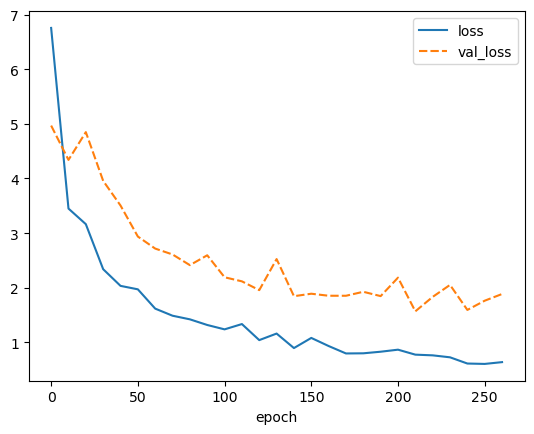

best weights loaded


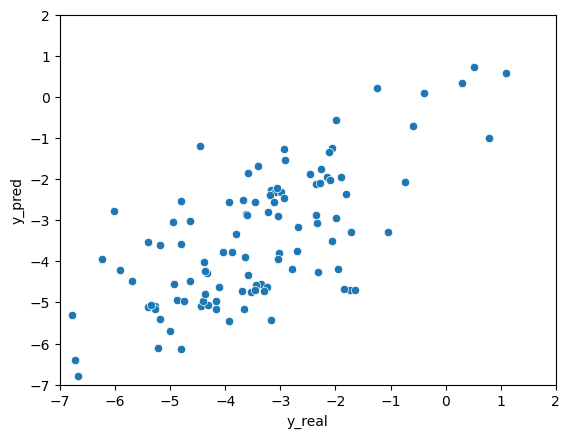

elapsed time: 66.83803844451904
run: 64
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5616A7AF0>, <dgl.data.utils.Subset object at 0x000002F5D5CDA8E0>, <dgl.data.utils.Subset object at 0x000002F5D5CDAB50>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  68609


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.546227677663167 | Validation Loss 5.267224073410034
Epoch 10 | Train Loss 4.093090995152791 | Validation Loss 4.56651771068573
Epoch 20 | Train Loss 3.2479660987854 | Validation Loss 4.078495264053345
Epoch 30 | Train Loss 2.993641455968221 | Validation Loss 4.1467366218566895
Epoch 40 | Train Loss 2.726315212249756 | Validation Loss 4.155186772346497
Epoch 50 | Train Loss 2.302233338356018 | Validation Loss 3.288289189338684
Epoch 60 | Train Loss 2.1727069139480593 | Validation Loss 3.176786422729492
Epoch 70 | Train Loss 1.9967038790384928 | Validation Loss 2.8969026803970337
Epoch 80 | Train Loss 2.011329968770345 | Validation Loss 2.5996205806732178
Epoch 90 | Train Loss 1.768958576520284 | Validation Loss 2.375336766242981
Epoch 100 | Train Loss 1.6078675111134848 | Validation Loss 2.404819965362549
Epoch 110 | Train Loss 1.4939406077067057 | Validation Loss 2.0243369340896606
Epoch 120 | Train Loss 1.4216073671976726 | Validation Loss 2.3189330101013184
Epo

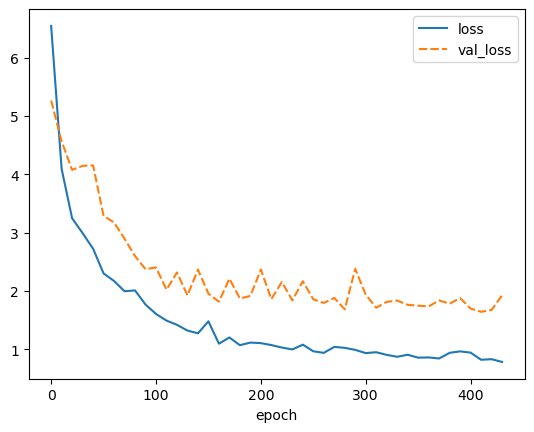

best weights loaded


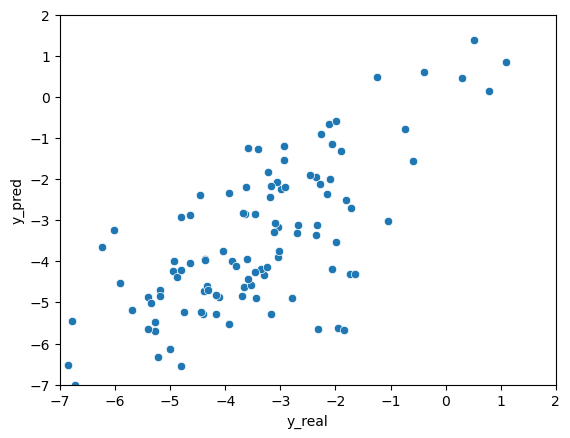

elapsed time: 106.41787147521973
run: 65
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5F642E0>, <dgl.data.utils.Subset object at 0x000002F5663FD8B0>, <dgl.data.utils.Subset object at 0x000002F5D6FC7C40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  68609


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.072940572102865 | Validation Loss 7.741069793701172
Epoch 10 | Train Loss 3.1782622655232746 | Validation Loss 4.579651117324829
Epoch 20 | Train Loss 2.6792705217997232 | Validation Loss 4.057840824127197
Epoch 30 | Train Loss 2.3799785216649374 | Validation Loss 4.110067844390869
Epoch 40 | Train Loss 2.2730757077534993 | Validation Loss 3.891737699508667
Epoch 50 | Train Loss 1.9476332028706869 | Validation Loss 3.495943784713745
Epoch 60 | Train Loss 1.822649343808492 | Validation Loss 3.5699492692947388
Epoch 70 | Train Loss 1.6189253012339273 | Validation Loss 2.9898133277893066
Epoch 80 | Train Loss 1.497630536556244 | Validation Loss 2.7205110788345337
Epoch 90 | Train Loss 1.5609099467595418 | Validation Loss 2.5679813623428345
Epoch 100 | Train Loss 1.389980932076772 | Validation Loss 2.392598271369934
Epoch 110 | Train Loss 1.2200518210728963 | Validation Loss 2.1200199127197266
Epoch 120 | Train Loss 1.0803817371527353 | Validation Loss 2.075021922588

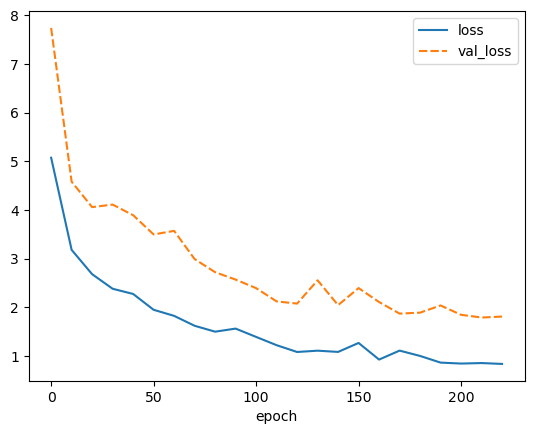

best weights loaded


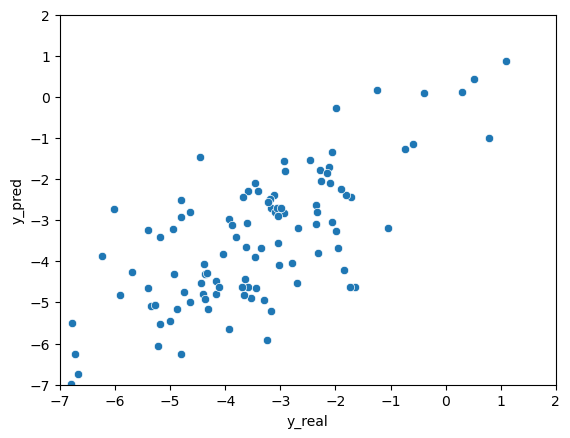

elapsed time: 60.79675030708313
run: 66
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F56662CEE0>, <dgl.data.utils.Subset object at 0x000002F5D71CDDF0>, <dgl.data.utils.Subset object at 0x000002F5D71FF070>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  134657


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.268502712249756 | Validation Loss 6.598782777786255
Epoch 10 | Train Loss 3.1452491760253904 | Validation Loss 4.225024342536926
Epoch 20 | Train Loss 2.565869156519572 | Validation Loss 4.018308401107788
Epoch 30 | Train Loss 2.0910613377889 | Validation Loss 3.015848159790039
Epoch 40 | Train Loss 1.6948509534200034 | Validation Loss 2.7324801683425903
Epoch 50 | Train Loss 1.6854620536168416 | Validation Loss 3.406049609184265
Epoch 60 | Train Loss 1.3052071491877237 | Validation Loss 2.0671133995056152
Epoch 70 | Train Loss 1.0063267330328622 | Validation Loss 2.306903839111328
Epoch 80 | Train Loss 0.9196913878122965 | Validation Loss 1.8866612911224365
Epoch 90 | Train Loss 0.8402914315462112 | Validation Loss 2.1092551350593567
Epoch 100 | Train Loss 0.7562365969022115 | Validation Loss 1.9437360763549805
Epoch 110 | Train Loss 0.734334933757782 | Validation Loss 2.0101717710494995
Epoch 120 | Train Loss 0.7162372628847758 | Validation Loss 1.9036124944686

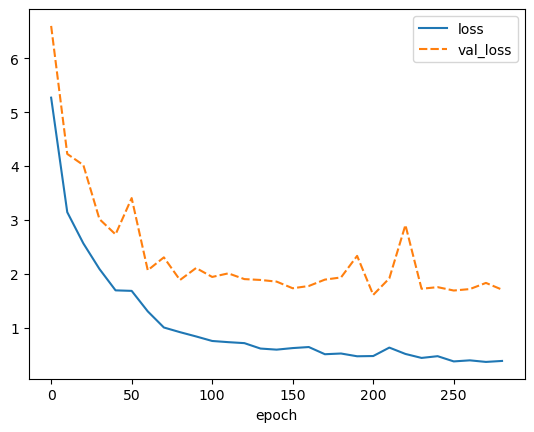

best weights loaded


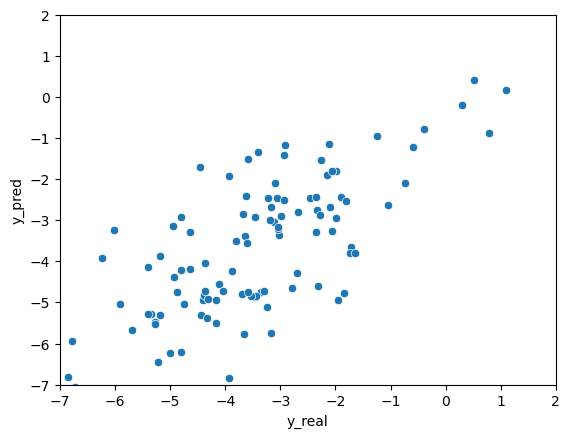

elapsed time: 83.60545754432678
run: 67
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566171130>, <dgl.data.utils.Subset object at 0x000002F5D9386430>, <dgl.data.utils.Subset object at 0x000002F5D93866A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  134401


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.902012666066487 | Validation Loss 6.398402214050293
Epoch 10 | Train Loss 3.4678861618041994 | Validation Loss 4.7464659214019775
Epoch 20 | Train Loss 2.5865296204884847 | Validation Loss 5.220945477485657
Epoch 30 | Train Loss 2.186267280578613 | Validation Loss 3.7853363752365112
Epoch 40 | Train Loss 1.747592520713806 | Validation Loss 2.493410110473633
Epoch 50 | Train Loss 1.7251641352971394 | Validation Loss 2.1494388580322266
Epoch 60 | Train Loss 1.3480452179908753 | Validation Loss 2.1510531306266785
Epoch 70 | Train Loss 1.4621613343556723 | Validation Loss 2.303162157535553
Epoch 80 | Train Loss 1.276534660657247 | Validation Loss 2.182749390602112
Epoch 90 | Train Loss 1.2483313123385111 | Validation Loss 2.5165825486183167
Epoch 100 | Train Loss 1.0474345584710438 | Validation Loss 2.9234025478363037
Epoch 110 | Train Loss 1.1655805468559266 | Validation Loss 1.99680095911026
Epoch 120 | Train Loss 1.0278911511103312 | Validation Loss 1.963091015815

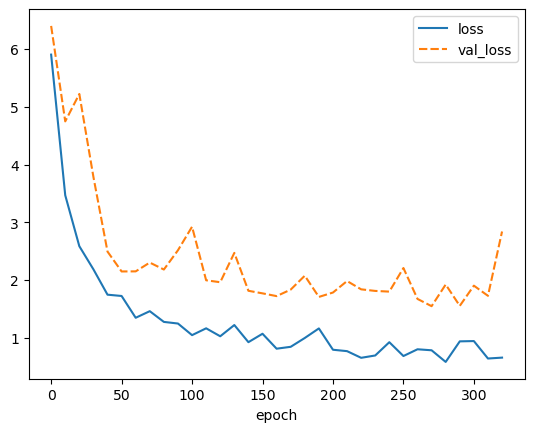

best weights loaded


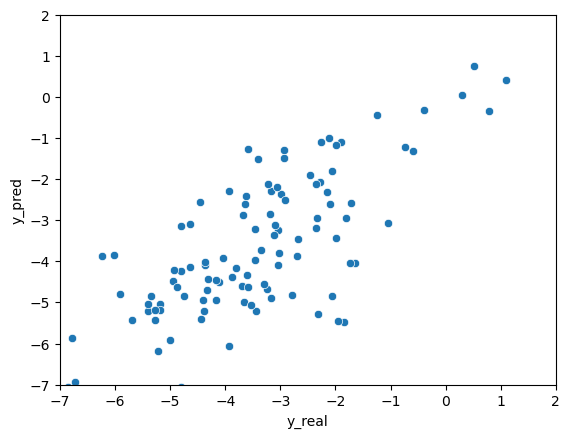

elapsed time: 87.70620942115784
run: 68
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F56660CC40>, <dgl.data.utils.Subset object at 0x000002F5D5D24D90>, <dgl.data.utils.Subset object at 0x000002F5D5D24B20>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  134401


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.440802192687988 | Validation Loss 6.4979331493377686
Epoch 10 | Train Loss 3.041417868932088 | Validation Loss 4.324288964271545
Epoch 20 | Train Loss 2.2681787888209026 | Validation Loss 3.9099262952804565
Epoch 30 | Train Loss 2.054979165395101 | Validation Loss 3.323926329612732
Epoch 40 | Train Loss 1.9410732507705688 | Validation Loss 3.343189239501953
Epoch 50 | Train Loss 1.3591925998528798 | Validation Loss 2.809817910194397
Epoch 60 | Train Loss 1.2220377365748087 | Validation Loss 2.1428640484809875
Epoch 70 | Train Loss 1.0765693187713623 | Validation Loss 1.9588038325309753
Epoch 80 | Train Loss 0.8833478649457296 | Validation Loss 1.9906660318374634
Epoch 90 | Train Loss 0.8444732030232748 | Validation Loss 2.0064552426338196
Epoch 100 | Train Loss 0.7935601353645325 | Validation Loss 2.2156805992126465
Epoch 110 | Train Loss 0.8456106384595236 | Validation Loss 2.047455847263336
Epoch 120 | Train Loss 0.8217475215593973 | Validation Loss 1.937112867

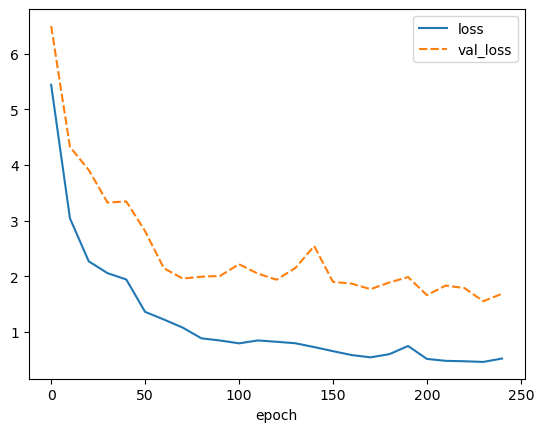

best weights loaded


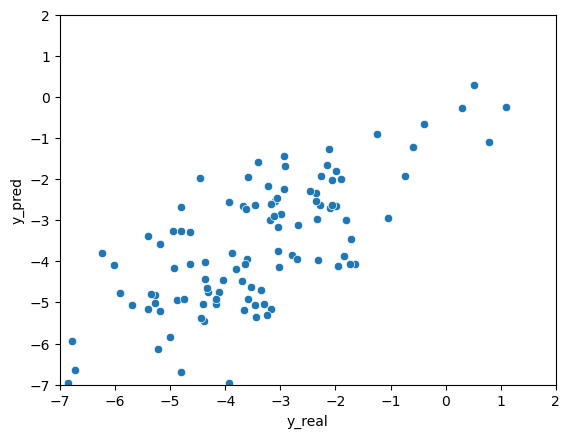

elapsed time: 67.3187186717987
run: 69
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5661E4D00>, <dgl.data.utils.Subset object at 0x000002F5D722A3A0>, <dgl.data.utils.Subset object at 0x000002F5D722A610>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.569883950551351 | Validation Loss 7.017329931259155
Epoch 10 | Train Loss 3.034221363067627 | Validation Loss 3.9722119569778442
Epoch 20 | Train Loss 2.3153396447499595 | Validation Loss 4.218116521835327
Epoch 30 | Train Loss 1.690371823310852 | Validation Loss 2.9096391201019287
Epoch 40 | Train Loss 1.3957640012105306 | Validation Loss 3.4457831382751465
Epoch 50 | Train Loss 1.1690835138161977 | Validation Loss 1.9439358115196228
Epoch 60 | Train Loss 1.3822863817214965 | Validation Loss 2.0812620520591736
Epoch 70 | Train Loss 0.7998097568750382 | Validation Loss 1.9386767148971558
Epoch 80 | Train Loss 0.8032810360193252 | Validation Loss 1.8910473585128784
Epoch 90 | Train Loss 0.8356256723403931 | Validation Loss 2.0925233364105225
Epoch 100 | Train Loss 0.6296702027320862 | Validation Loss 1.7385567426681519
Epoch 110 | Train Loss 0.6789606054623921 | Validation Loss 1.6362255215644836
Epoch 120 | Train Loss 0.7199318548043568 | Validation Loss 1.588879

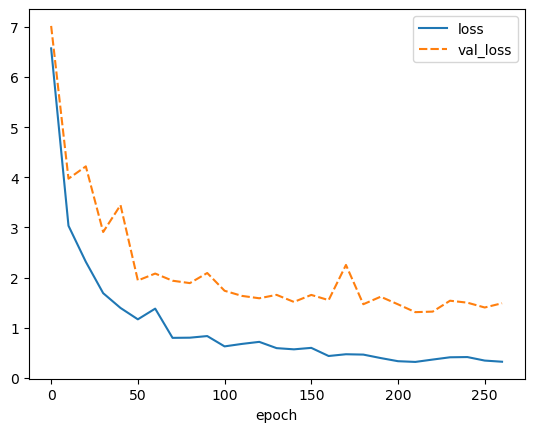

best weights loaded


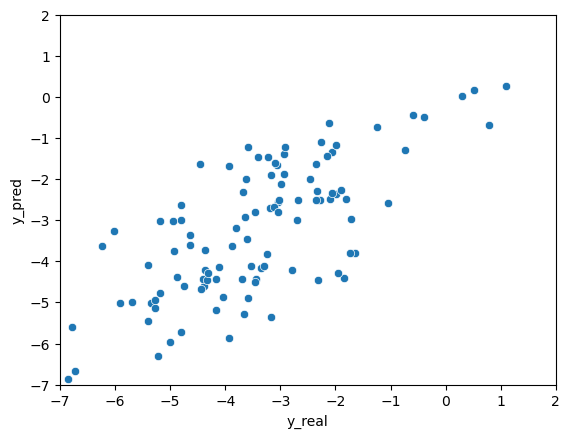

elapsed time: 85.84224772453308
run: 70
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5662B04F0>, <dgl.data.utils.Subset object at 0x000002F5661303A0>, <dgl.data.utils.Subset object at 0x000002F5665498E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.1268049875895185 | Validation Loss 7.616633653640747
Epoch 10 | Train Loss 3.6817992528279624 | Validation Loss 4.249775648117065
Epoch 20 | Train Loss 2.7418872356414794 | Validation Loss 3.729538917541504
Epoch 30 | Train Loss 2.228608127435048 | Validation Loss 3.6662039756774902
Epoch 40 | Train Loss 2.166959110895793 | Validation Loss 2.7679476737976074
Epoch 50 | Train Loss 1.9553836027781168 | Validation Loss 2.264239549636841
Epoch 60 | Train Loss 1.3943222641944886 | Validation Loss 2.139521062374115
Epoch 70 | Train Loss 1.122137153148651 | Validation Loss 2.0883034467697144
Epoch 80 | Train Loss 1.226460619767507 | Validation Loss 2.0838980674743652
Epoch 90 | Train Loss 0.8712400356928508 | Validation Loss 2.8039298057556152
Epoch 100 | Train Loss 0.9006167531013489 | Validation Loss 1.9768473505973816
Epoch 110 | Train Loss 1.0534931222597759 | Validation Loss 5.447279453277588
Epoch 120 | Train Loss 0.7722554524739583 | Validation Loss 1.90145736932

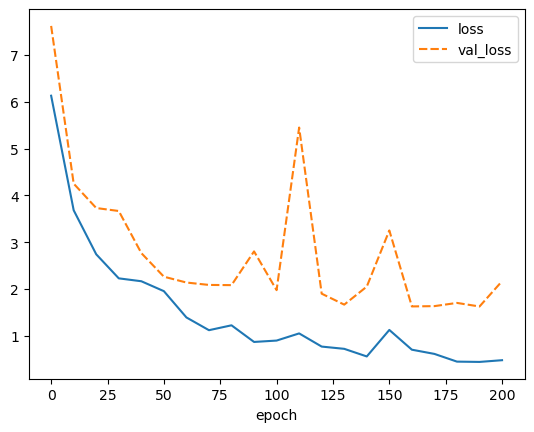

best weights loaded


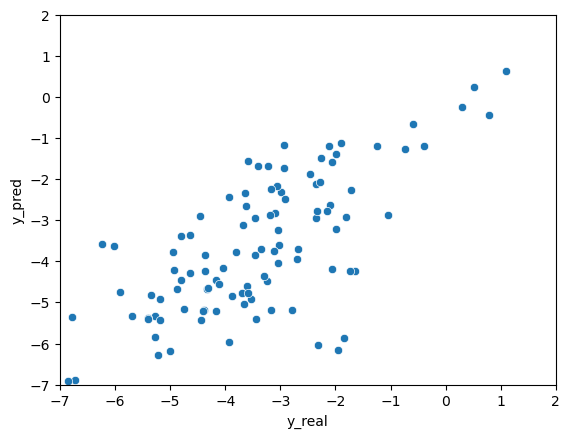

elapsed time: 64.35391759872437
run: 71
{'hidden_channels_list': [256], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F56650C640>, <dgl.data.utils.Subset object at 0x000002F5D727D730>, <dgl.data.utils.Subset object at 0x000002F5D727D9A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.634893107414245 | Validation Loss 7.71239161491394
Epoch 10 | Train Loss 2.3376156171162923 | Validation Loss 3.95448899269104
Epoch 20 | Train Loss 2.0515415191650392 | Validation Loss 3.1582521200180054
Epoch 30 | Train Loss 1.6059410452842713 | Validation Loss 2.7956639528274536
Epoch 40 | Train Loss 1.7726537307103476 | Validation Loss 2.274980068206787
Epoch 50 | Train Loss 1.1938969373703003 | Validation Loss 3.6850459575653076
Epoch 60 | Train Loss 1.0710371613502503 | Validation Loss 1.9855486750602722
Epoch 70 | Train Loss 0.9586428761482239 | Validation Loss 1.9679373502731323
Epoch 80 | Train Loss 0.9747897962729136 | Validation Loss 1.8766868114471436
Epoch 90 | Train Loss 0.9542229851086934 | Validation Loss 2.6180593967437744
Epoch 100 | Train Loss 0.814555017153422 | Validation Loss 2.146872878074646
Epoch 110 | Train Loss 0.8473138173421224 | Validation Loss 1.7681270837783813
Epoch 120 | Train Loss 0.6077413856983185 | Validation Loss 2.098241329

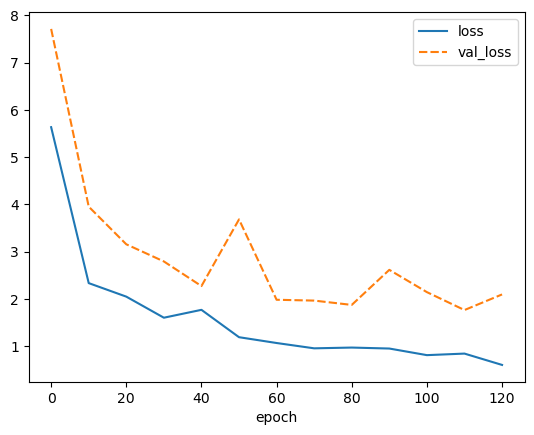

best weights loaded


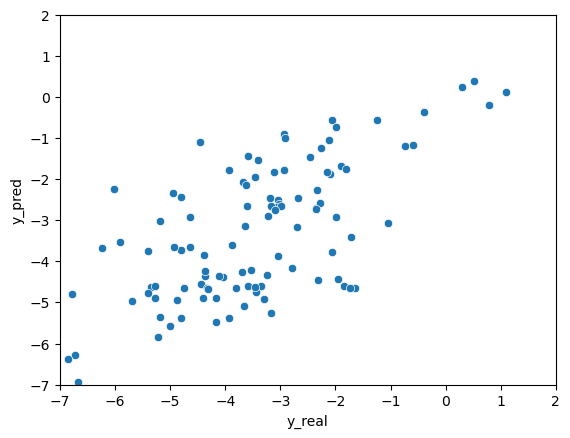

elapsed time: 40.68567895889282
run: 72
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D6FCC2E0>, <dgl.data.utils.Subset object at 0x000002F56666B6D0>, <dgl.data.utils.Subset object at 0x000002F56666B0A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  6145


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.161103010177612 | Validation Loss 4.647766351699829
Epoch 10 | Train Loss 3.428114819526672 | Validation Loss 4.262270450592041
Epoch 20 | Train Loss 3.35667405128479 | Validation Loss 4.202139973640442
Epoch 30 | Train Loss 3.0511794408162434 | Validation Loss 4.290571689605713
Epoch 40 | Train Loss 2.4774443387985228 | Validation Loss 4.118311882019043
Epoch 50 | Train Loss 2.421925926208496 | Validation Loss 4.253251075744629
Epoch 60 | Train Loss 2.3543070554733276 | Validation Loss 3.7361245155334473
Epoch 70 | Train Loss 2.1192230860392254 | Validation Loss 3.8932541608810425
Epoch 80 | Train Loss 2.03243309656779 | Validation Loss 3.5977977514266968
Epoch 90 | Train Loss 2.099289313952128 | Validation Loss 3.4791765213012695
Epoch 100 | Train Loss 1.8925792217254638 | Validation Loss 3.275314211845398
Epoch 110 | Train Loss 1.808626389503479 | Validation Loss 3.049333930015564
Epoch 120 | Train Loss 1.671017551422119 | Validation Loss 3.058652400970459
Epo

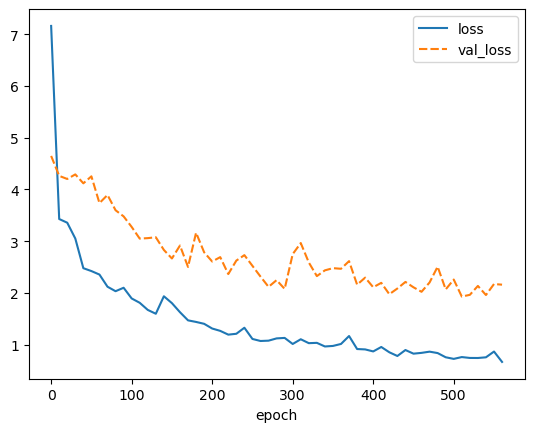

best weights loaded


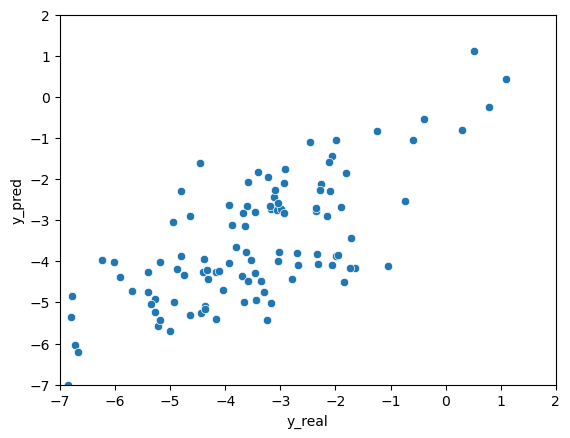

elapsed time: 120.46023106575012
run: 73
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5E73A60>, <dgl.data.utils.Subset object at 0x000002F56660CE20>, <dgl.data.utils.Subset object at 0x000002F5D70AE100>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  5633
Epoch 0 | Train Loss 6.538896989822388 | Validation Loss 4.795186758041382


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.921331262588501 | Validation Loss 4.559696197509766
Epoch 20 | Train Loss 3.6223820368448894 | Validation Loss 4.880471706390381
Epoch 30 | Train Loss 3.455670642852783 | Validation Loss 4.285711407661438
Epoch 40 | Train Loss 3.272725470860799 | Validation Loss 4.08682656288147
Epoch 50 | Train Loss 3.5993426005045572 | Validation Loss 4.117953300476074
Epoch 60 | Train Loss 2.8270631949106853 | Validation Loss 4.31600284576416
Epoch 70 | Train Loss 3.0447370449701947 | Validation Loss 3.9578447341918945
Epoch 80 | Train Loss 2.8016274134318033 | Validation Loss 3.905482769012451
Epoch 90 | Train Loss 2.689176829655965 | Validation Loss 3.7724080085754395
Epoch 100 | Train Loss 2.55896901289622 | Validation Loss 3.791958212852478
Epoch 110 | Train Loss 2.45984001159668 | Validation Loss 3.722648501396179
Epoch 120 | Train Loss 2.5048139015833537 | Validation Loss 3.8294384479522705
Epoch 130 | Train Loss 2.317934787273407 | Validation Loss 3.468674898147583
Epo

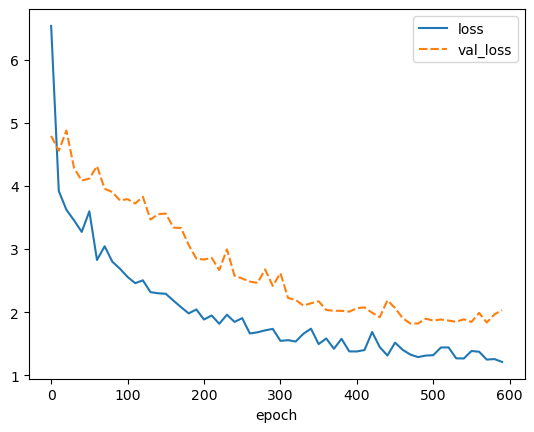

best weights loaded


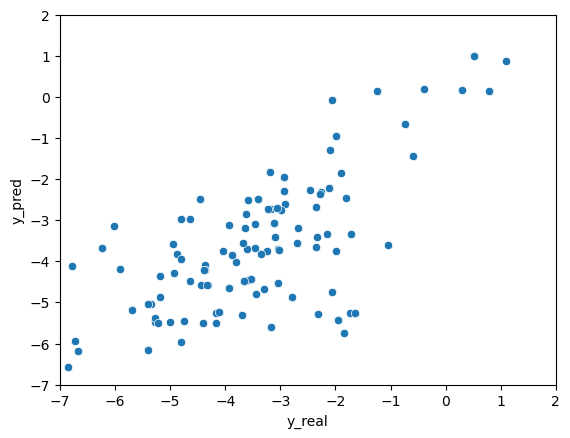

elapsed time: 118.97260618209839
run: 74
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5663E9760>, <dgl.data.utils.Subset object at 0x000002F5D92D69D0>, <dgl.data.utils.Subset object at 0x000002F5D92E96D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  5633


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.603158473968506 | Validation Loss 4.800097465515137
Epoch 10 | Train Loss 3.54010108311971 | Validation Loss 4.470088839530945
Epoch 20 | Train Loss 3.2827938715616862 | Validation Loss 4.52939248085022
Epoch 30 | Train Loss 3.253002325693766 | Validation Loss 4.262960910797119
Epoch 40 | Train Loss 2.9220967928568524 | Validation Loss 4.2422497272491455
Epoch 50 | Train Loss 2.6912608544031777 | Validation Loss 4.372443199157715
Epoch 60 | Train Loss 2.6399514198303224 | Validation Loss 4.386563539505005
Epoch 70 | Train Loss 2.3746980587641398 | Validation Loss 4.12489378452301
Epoch 80 | Train Loss 2.38921586672465 | Validation Loss 3.692905068397522
Epoch 90 | Train Loss 2.320687993367513 | Validation Loss 3.8714972734451294
Epoch 100 | Train Loss 2.1745237509409585 | Validation Loss 3.8008276224136353
Epoch 110 | Train Loss 2.103290549914042 | Validation Loss 4.032817125320435
Epoch 120 | Train Loss 2.0033154845237733 | Validation Loss 3.340006470680237
Epoc

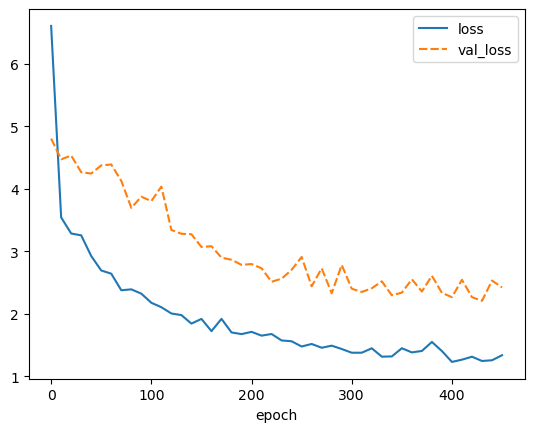

best weights loaded


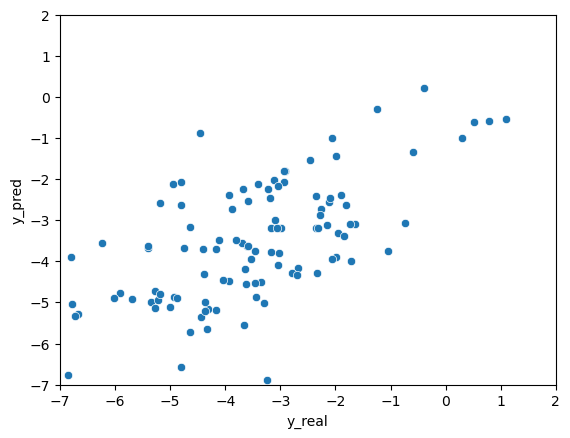

elapsed time: 92.11775040626526
run: 75
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566772AF0>, <dgl.data.utils.Subset object at 0x000002F5660CCC10>, <dgl.data.utils.Subset object at 0x000002F5660CC8B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  268801


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.115385389328003 | Validation Loss 6.284807920455933
Epoch 10 | Train Loss 3.2097015221913656 | Validation Loss 4.365623235702515
Epoch 20 | Train Loss 2.571314493815104 | Validation Loss 4.869596242904663
Epoch 30 | Train Loss 2.0670448859532673 | Validation Loss 3.4600067138671875
Epoch 40 | Train Loss 2.0048087358474733 | Validation Loss 3.1091800928115845
Epoch 50 | Train Loss 1.7474104404449462 | Validation Loss 2.897254705429077
Epoch 60 | Train Loss 1.7352945327758789 | Validation Loss 2.4831444025039673
Epoch 70 | Train Loss 1.215312111377716 | Validation Loss 2.7016173601150513
Epoch 80 | Train Loss 1.0801725745201112 | Validation Loss 2.0749324560165405
Epoch 90 | Train Loss 0.9678580661614736 | Validation Loss 1.8992448449134827
Epoch 100 | Train Loss 0.8846219837665558 | Validation Loss 1.9167845249176025
Epoch 110 | Train Loss 0.7801454782485961 | Validation Loss 1.8093850016593933
Epoch 120 | Train Loss 0.688155206044515 | Validation Loss 2.254287898

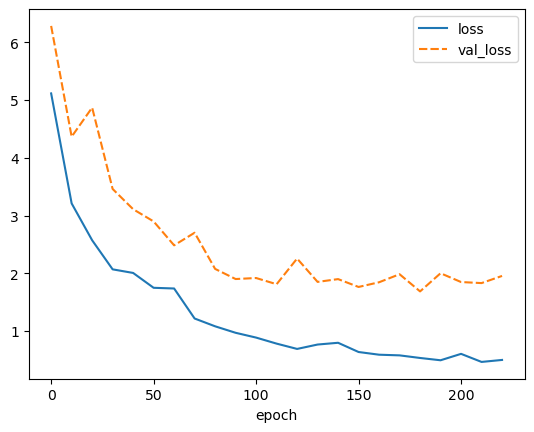

best weights loaded


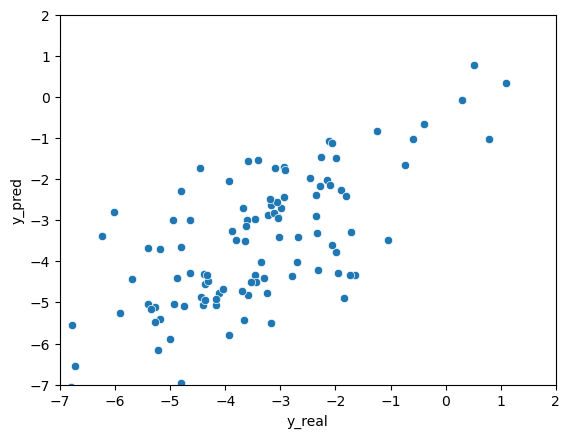

elapsed time: 55.027472734451294
run: 76
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D71ED3D0>, <dgl.data.utils.Subset object at 0x000002F51EEBC220>, <dgl.data.utils.Subset object at 0x000002F51EEBCB80>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  268289


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.612101968129476 | Validation Loss 6.7028563022613525
Epoch 10 | Train Loss 3.676146459579468 | Validation Loss 4.667859792709351
Epoch 20 | Train Loss 2.911604340871175 | Validation Loss 4.73649001121521
Epoch 30 | Train Loss 2.5066829840342204 | Validation Loss 5.974591255187988
Epoch 40 | Train Loss 2.3240975459416706 | Validation Loss 3.8895293474197388
Epoch 50 | Train Loss 2.1020517031351726 | Validation Loss 2.638576865196228
Epoch 60 | Train Loss 2.473966693878174 | Validation Loss 2.5121458768844604
Epoch 70 | Train Loss 1.6025421937306723 | Validation Loss 2.136631190776825
Epoch 80 | Train Loss 1.4249746481577554 | Validation Loss 2.3766729831695557
Epoch 90 | Train Loss 1.516823442776998 | Validation Loss 2.766440272331238
Epoch 100 | Train Loss 1.3549718022346497 | Validation Loss 3.006111264228821
Epoch 110 | Train Loss 1.2797163764635722 | Validation Loss 2.185500979423523
Epoch 120 | Train Loss 1.3084586262702942 | Validation Loss 2.062344491481781

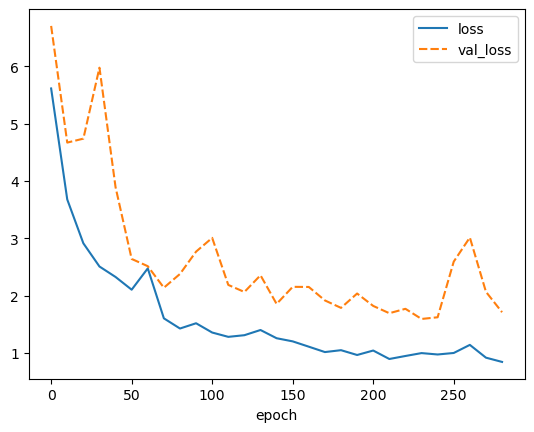

best weights loaded


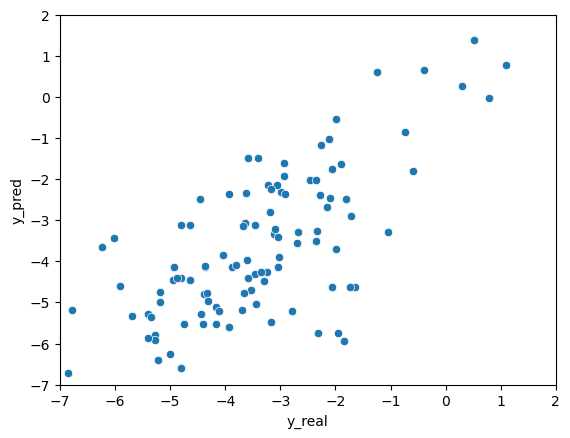

elapsed time: 63.13820838928223
run: 77
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566611970>, <dgl.data.utils.Subset object at 0x000002F5661ECFA0>, <dgl.data.utils.Subset object at 0x000002F5D5E633A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  268289


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.488664754231771 | Validation Loss 7.065638542175293
Epoch 10 | Train Loss 3.2944893995920816 | Validation Loss 4.27268385887146
Epoch 20 | Train Loss 2.366180149714152 | Validation Loss 4.0442997217178345
Epoch 30 | Train Loss 1.9824461301167806 | Validation Loss 3.9891393184661865
Epoch 40 | Train Loss 1.6580007831255594 | Validation Loss 2.916174054145813
Epoch 50 | Train Loss 1.4995044231414796 | Validation Loss 2.626247763633728
Epoch 60 | Train Loss 1.376881464322408 | Validation Loss 2.332467198371887
Epoch 70 | Train Loss 1.1549237449963887 | Validation Loss 2.1238162517547607
Epoch 80 | Train Loss 1.5719566027323404 | Validation Loss 2.0072428584098816
Epoch 90 | Train Loss 1.1806839227676391 | Validation Loss 1.9845900535583496
Epoch 100 | Train Loss 1.2169117709000905 | Validation Loss 3.408939480781555
Epoch 110 | Train Loss 0.9403684337933859 | Validation Loss 1.8372395634651184
Epoch 120 | Train Loss 1.1226944128672283 | Validation Loss 1.84922623634

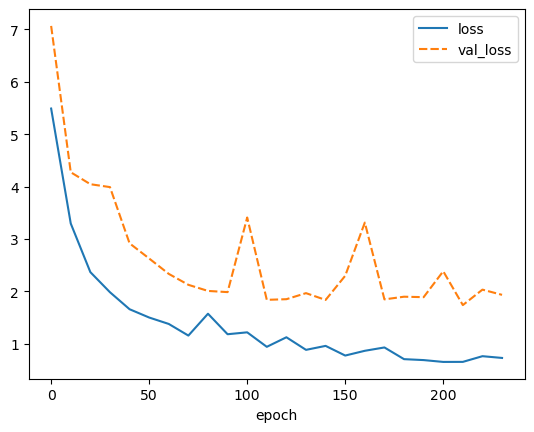

best weights loaded


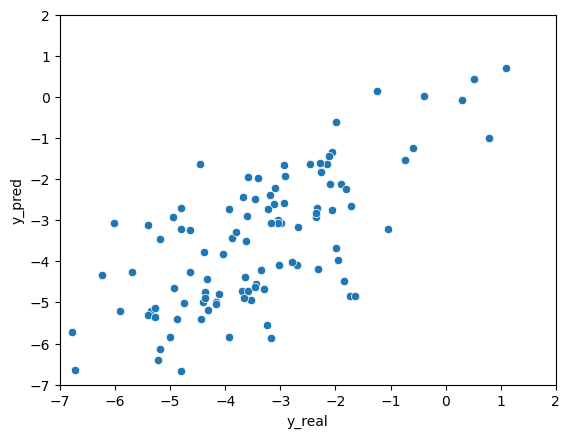

elapsed time: 55.42601418495178
run: 78
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5665C2760>, <dgl.data.utils.Subset object at 0x000002F56662EC10>, <dgl.data.utils.Subset object at 0x000002F56662E790>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  531457


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.1631246169408165 | Validation Loss 5.370327472686768
Epoch 10 | Train Loss 2.850373168786367 | Validation Loss 5.017819404602051
Epoch 20 | Train Loss 2.002741058667501 | Validation Loss 3.9223384857177734
Epoch 30 | Train Loss 1.7125341892242432 | Validation Loss 2.6895722150802612
Epoch 40 | Train Loss 1.4995198090871176 | Validation Loss 3.442449450492859
Epoch 50 | Train Loss 1.4070470730463664 | Validation Loss 3.6887245178222656
Epoch 60 | Train Loss 0.9926964282989502 | Validation Loss 1.9629883766174316
Epoch 70 | Train Loss 0.9197231610616048 | Validation Loss 1.8709101676940918
Epoch 80 | Train Loss 0.6813493549823761 | Validation Loss 1.6774851083755493
Epoch 90 | Train Loss 0.7280309756596883 | Validation Loss 1.8016515374183655
Epoch 100 | Train Loss 0.5784981330235799 | Validation Loss 2.095796287059784
Epoch 110 | Train Loss 0.5435352543989818 | Validation Loss 1.6886129975318909
Epoch 120 | Train Loss 0.5663781121373177 | Validation Loss 2.0174744

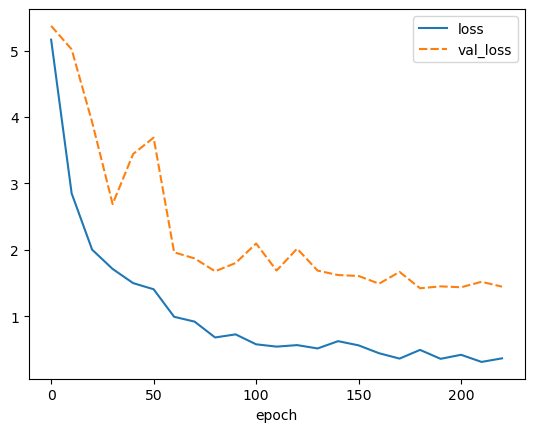

best weights loaded


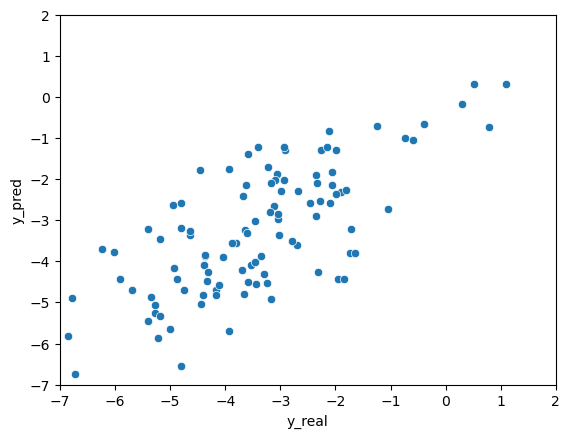

elapsed time: 63.00387263298035
run: 79
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5F20700>, <dgl.data.utils.Subset object at 0x000002F5D92BA1C0>, <dgl.data.utils.Subset object at 0x000002F5D92BA730>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  530945


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.4113704840342205 | Validation Loss 4.973638296127319
Epoch 10 | Train Loss 3.22673548857371 | Validation Loss 4.585562467575073
Epoch 20 | Train Loss 2.73972004254659 | Validation Loss 4.130497932434082
Epoch 30 | Train Loss 1.8870978752772014 | Validation Loss 3.3504645824432373
Epoch 40 | Train Loss 1.6956227620442708 | Validation Loss 2.4999338388442993
Epoch 50 | Train Loss 1.7646460056304931 | Validation Loss 2.0674092173576355
Epoch 60 | Train Loss 1.2465087493260703 | Validation Loss 2.342736840248108
Epoch 70 | Train Loss 1.2544649322827657 | Validation Loss 2.0874244570732117
Epoch 80 | Train Loss 1.2311697522799174 | Validation Loss 2.4621078968048096
Epoch 90 | Train Loss 1.012803852558136 | Validation Loss 2.165767192840576
Epoch 100 | Train Loss 0.9273838599522909 | Validation Loss 1.945179522037506
Epoch 110 | Train Loss 1.2238861123720806 | Validation Loss 1.731888473033905
Epoch 120 | Train Loss 0.9094461391369502 | Validation Loss 2.2700129747390

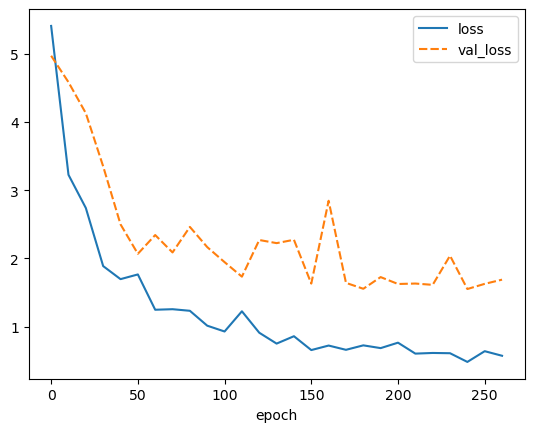

best weights loaded


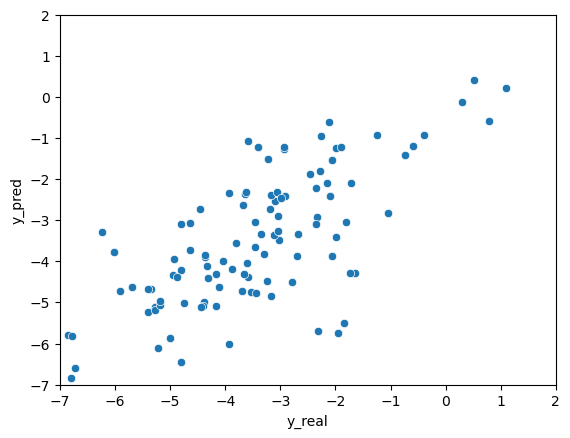

elapsed time: 67.58199644088745
run: 80
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5D20910>, <dgl.data.utils.Subset object at 0x000002F5663AE2B0>, <dgl.data.utils.Subset object at 0x000002F5663AEE20>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  530945


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 4.878263465563456 | Validation Loss 5.192086577415466
Epoch 10 | Train Loss 2.9082256237665813 | Validation Loss 3.6693230867385864
Epoch 20 | Train Loss 1.9798423608144124 | Validation Loss 3.9463703632354736
Epoch 30 | Train Loss 1.9717079798380535 | Validation Loss 2.6461649537086487
Epoch 40 | Train Loss 1.497808289527893 | Validation Loss 4.467209339141846
Epoch 50 | Train Loss 1.3331233481566112 | Validation Loss 2.1221486926078796
Epoch 60 | Train Loss 0.9747632702191671 | Validation Loss 1.8522105813026428
Epoch 70 | Train Loss 0.8863340854644776 | Validation Loss 1.749116063117981
Epoch 80 | Train Loss 1.2141563773155213 | Validation Loss 2.5710731744766235
Epoch 90 | Train Loss 0.820662792523702 | Validation Loss 1.8213540315628052
Epoch 100 | Train Loss 0.7227324604988098 | Validation Loss 3.1980496644973755
Epoch 110 | Train Loss 0.7626964410146078 | Validation Loss 2.3864749670028687


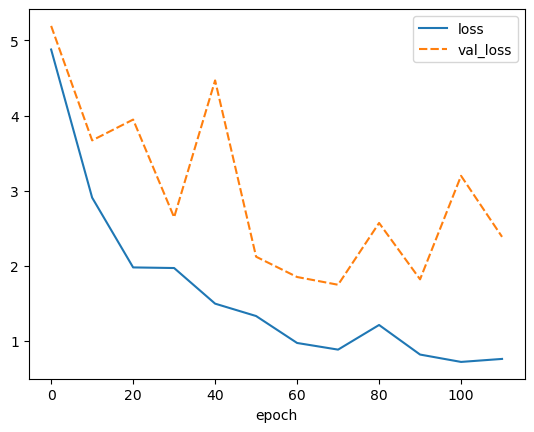

best weights loaded


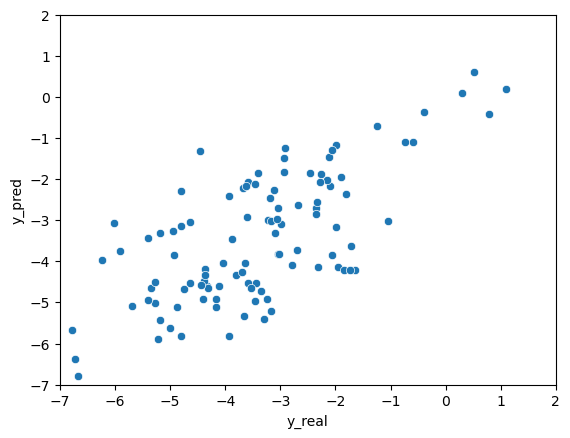

elapsed time: 30.327579736709595
run: 81
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D71B3E80>, <dgl.data.utils.Subset object at 0x000002F5664351F0>, <dgl.data.utils.Subset object at 0x000002F566435460>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.326467927296957 | Validation Loss 6.178978443145752
Epoch 10 | Train Loss 2.482559005419413 | Validation Loss 4.459656476974487
Epoch 20 | Train Loss 1.718406351407369 | Validation Loss 5.251240253448486
Epoch 30 | Train Loss 1.5262416481971741 | Validation Loss 2.5708351135253906
Epoch 40 | Train Loss 1.5840433110793433 | Validation Loss 2.1562613248825073
Epoch 50 | Train Loss 1.2067474961280822 | Validation Loss 3.832119941711426
Epoch 60 | Train Loss 0.861309798558553 | Validation Loss 2.034577250480652
Epoch 70 | Train Loss 0.6582589705785116 | Validation Loss 1.8367100954055786
Epoch 80 | Train Loss 0.6755950291951497 | Validation Loss 1.6920901536941528
Epoch 90 | Train Loss 0.7570128122965495 | Validation Loss 2.2438774704933167
Epoch 100 | Train Loss 0.5706423660119374 | Validation Loss 1.5897027850151062
Epoch 110 | Train Loss 0.46009811758995056 | Validation Loss 1.455044686794281
Epoch 120 | Train Loss 0.42761760552724204 | Validation Loss 1.463554322

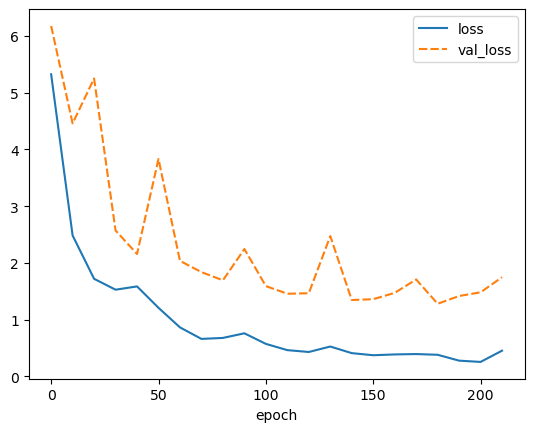

best weights loaded


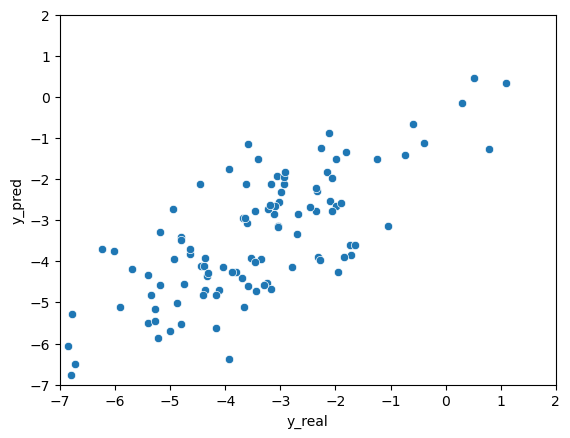

elapsed time: 67.09612202644348
run: 82
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5D700A0>, <dgl.data.utils.Subset object at 0x000002F56658AD00>, <dgl.data.utils.Subset object at 0x000002F56658ADF0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.816063797473907 | Validation Loss 4.534105062484741
Epoch 10 | Train Loss 3.7445706367492675 | Validation Loss 4.191439628601074
Epoch 20 | Train Loss 3.025188517570496 | Validation Loss 3.675475597381592
Epoch 30 | Train Loss 2.12819527387619 | Validation Loss 2.1681992411613464
Epoch 40 | Train Loss 1.4901056329409281 | Validation Loss 3.52310311794281
Epoch 50 | Train Loss 1.257153574625651 | Validation Loss 1.9614938497543335
Epoch 60 | Train Loss 1.2896929502487182 | Validation Loss 1.9290031790733337
Epoch 70 | Train Loss 1.0919327775637309 | Validation Loss 2.5511423349380493
Epoch 80 | Train Loss 0.9588426788647969 | Validation Loss 2.0065548419952393
Epoch 90 | Train Loss 1.0805211385091147 | Validation Loss 2.3179529309272766
Epoch 100 | Train Loss 0.973691189289093 | Validation Loss 3.6436731815338135
Epoch 110 | Train Loss 0.746208377679189 | Validation Loss 1.8880839347839355
Epoch 120 | Train Loss 0.6597419391075771 | Validation Loss 1.8056584596633

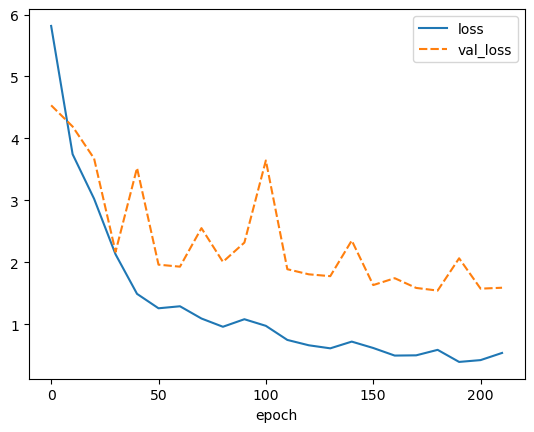

best weights loaded


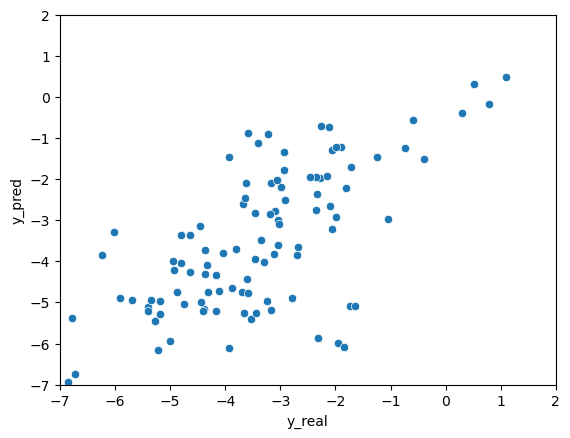

elapsed time: 67.15294289588928
run: 83
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D70A4130>, <dgl.data.utils.Subset object at 0x000002F566646BB0>, <dgl.data.utils.Subset object at 0x000002F5665CABE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.636585172017416 | Validation Loss 4.5827178955078125
Epoch 10 | Train Loss 2.5994443893432617 | Validation Loss 4.497818946838379
Epoch 20 | Train Loss 2.268346079190572 | Validation Loss 3.4302639961242676
Epoch 30 | Train Loss 2.1352316538492837 | Validation Loss 3.2361884117126465
Epoch 40 | Train Loss 1.7783494234085082 | Validation Loss 2.5099308490753174
Epoch 50 | Train Loss 1.2445234974225363 | Validation Loss 3.0705902576446533
Epoch 60 | Train Loss 1.2298425475756327 | Validation Loss 1.9229764342308044
Epoch 70 | Train Loss 0.9785938064257304 | Validation Loss 2.049856424331665
Epoch 80 | Train Loss 0.6991250395774842 | Validation Loss 2.1505799293518066
Epoch 90 | Train Loss 0.6392668743928274 | Validation Loss 2.9261672496795654
Epoch 100 | Train Loss 0.6412772019704183 | Validation Loss 2.3291728496551514
Epoch 110 | Train Loss 0.5521086782217026 | Validation Loss 1.7825175523757935
Epoch 120 | Train Loss 1.1931379040082295 | Validation Loss 2.38297

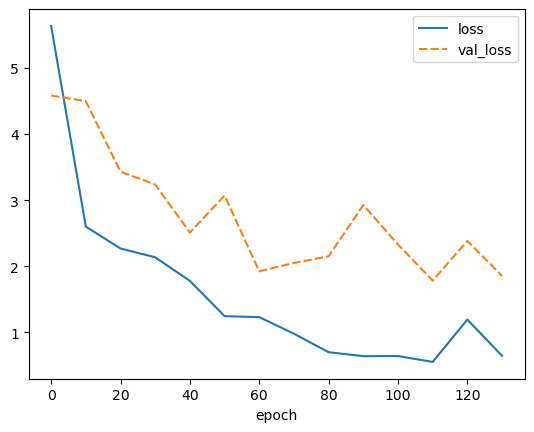

best weights loaded


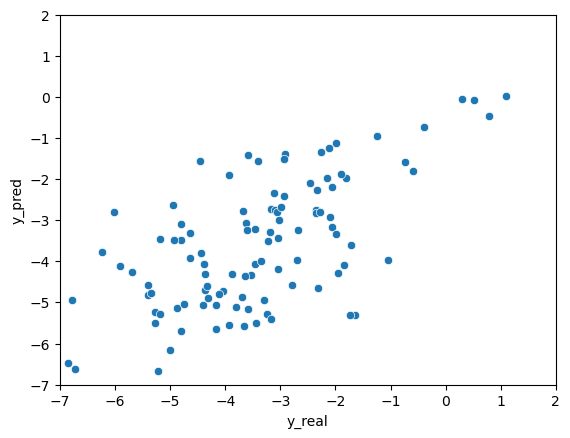

elapsed time: 41.33516716957092
run: 84
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5660EE460>, <dgl.data.utils.Subset object at 0x000002F522EBD640>, <dgl.data.utils.Subset object at 0x000002F522EBDD30>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  6145


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.0644592126210535 | Validation Loss 4.889533519744873
Epoch 10 | Train Loss 3.537302764256795 | Validation Loss 4.215374708175659
Epoch 20 | Train Loss 3.270408852895101 | Validation Loss 4.177197575569153
Epoch 30 | Train Loss 2.8156893889109296 | Validation Loss 4.149670124053955
Epoch 40 | Train Loss 2.5194624582926433 | Validation Loss 4.156370520591736
Epoch 50 | Train Loss 2.363441220919291 | Validation Loss 3.916012167930603
Epoch 60 | Train Loss 2.2727659861246745 | Validation Loss 3.919321298599243
Epoch 70 | Train Loss 2.041830849647522 | Validation Loss 3.8387060165405273
Epoch 80 | Train Loss 2.0676887035369873 | Validation Loss 3.944521903991699
Epoch 90 | Train Loss 1.7836950421333313 | Validation Loss 3.3362174034118652
Epoch 100 | Train Loss 1.818465002377828 | Validation Loss 3.3663617372512817
Epoch 110 | Train Loss 1.693742326895396 | Validation Loss 3.453275680541992
Epoch 120 | Train Loss 1.8296783208847045 | Validation Loss 3.0896681547164917

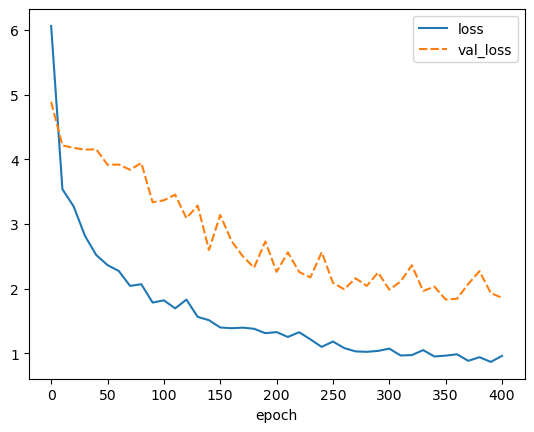

best weights loaded


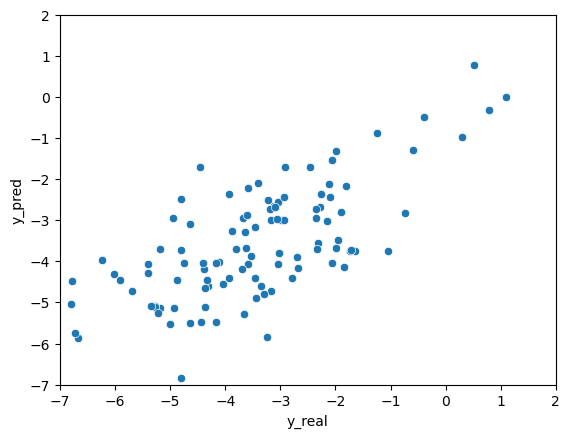

elapsed time: 81.3300952911377
run: 85
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F56670C490>, <dgl.data.utils.Subset object at 0x000002F5D707B610>, <dgl.data.utils.Subset object at 0x000002F56669BB20>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  5633
Epoch 0 | Train Loss 6.425293842951457 | Validation Loss 4.782736778259277


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 10 | Train Loss 3.772551902135213 | Validation Loss 4.979403495788574
Epoch 20 | Train Loss 3.5652429262797036 | Validation Loss 4.929900646209717
Epoch 30 | Train Loss 3.412539561589559 | Validation Loss 4.329499244689941
Epoch 40 | Train Loss 3.254209105173747 | Validation Loss 4.630018711090088
Epoch 50 | Train Loss 2.99820396900177 | Validation Loss 4.919312000274658
Epoch 60 | Train Loss 2.9261781374613443 | Validation Loss 4.06149160861969
Epoch 70 | Train Loss 2.683033307393392 | Validation Loss 3.964292883872986
Epoch 80 | Train Loss 2.6260818243026733 | Validation Loss 3.9130353927612305
Epoch 90 | Train Loss 2.5876661936442056 | Validation Loss 4.014435291290283
Epoch 100 | Train Loss 2.5541353861490887 | Validation Loss 3.7562999725341797
Epoch 110 | Train Loss 2.3100507060686746 | Validation Loss 3.6415305137634277
Epoch 120 | Train Loss 2.4511041084925336 | Validation Loss 3.5695488452911377
Epoch 130 | Train Loss 2.2209583123524985 | Validation Loss 3.57110404968261

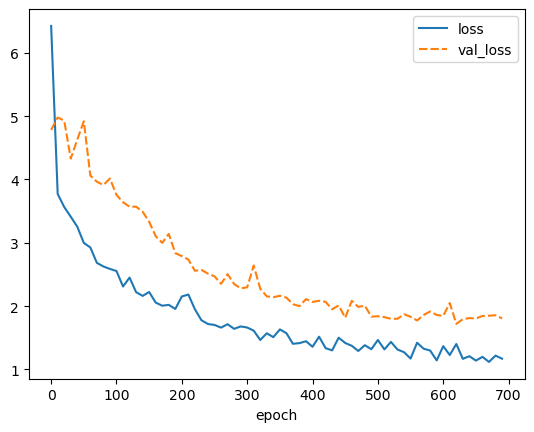

best weights loaded


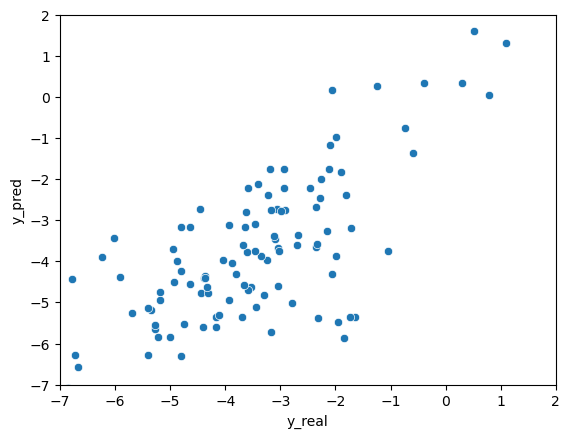

elapsed time: 132.1057891845703
run: 86
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566419910>, <dgl.data.utils.Subset object at 0x000002F5D931F7C0>, <dgl.data.utils.Subset object at 0x000002F5D931FA30>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  5633


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 4.949412743250529 | Validation Loss 4.977959871292114
Epoch 10 | Train Loss 3.5408843835194905 | Validation Loss 4.8421242237091064
Epoch 20 | Train Loss 3.137946057319641 | Validation Loss 4.174388527870178
Epoch 30 | Train Loss 2.8983845710754395 | Validation Loss 4.669260740280151
Epoch 40 | Train Loss 2.773865501085917 | Validation Loss 4.222215056419373
Epoch 50 | Train Loss 2.512496882677078 | Validation Loss 4.245451211929321
Epoch 60 | Train Loss 2.4345938046773274 | Validation Loss 4.024522542953491
Epoch 70 | Train Loss 2.2030829111735026 | Validation Loss 3.894720673561096
Epoch 80 | Train Loss 2.23712633450826 | Validation Loss 3.606127977371216
Epoch 90 | Train Loss 2.514849321047465 | Validation Loss 3.48577082157135
Epoch 100 | Train Loss 2.0058706680933636 | Validation Loss 3.640005111694336
Epoch 110 | Train Loss 1.9119285186131796 | Validation Loss 3.4577765464782715
Epoch 120 | Train Loss 1.9160886843999227 | Validation Loss 3.1025688648223877
Ep

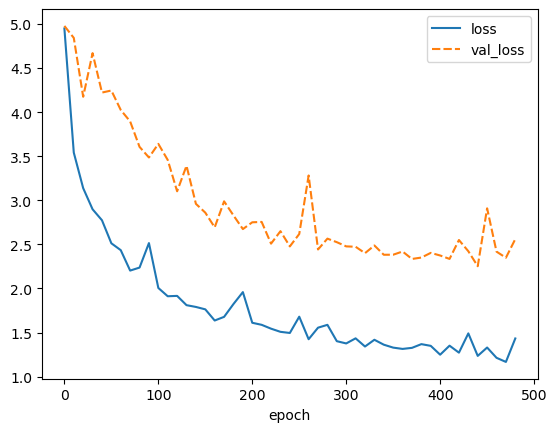

best weights loaded


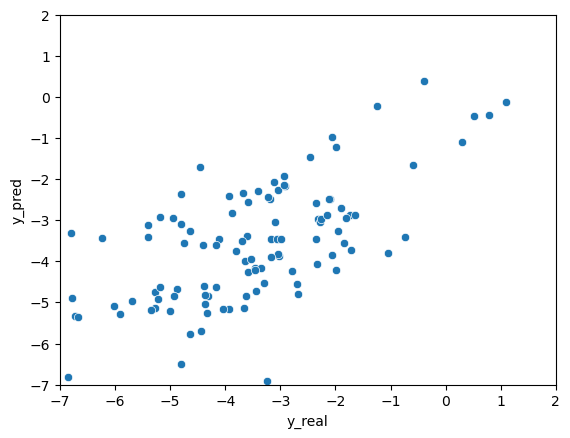

elapsed time: 94.19537377357483
run: 87
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5667246D0>, <dgl.data.utils.Subset object at 0x000002F5666A65B0>, <dgl.data.utils.Subset object at 0x000002F5666A6C70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  268801


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.085850429534912 | Validation Loss 7.373641014099121
Epoch 10 | Train Loss 3.2604870160420734 | Validation Loss 4.534741163253784
Epoch 20 | Train Loss 2.567265764872233 | Validation Loss 3.8914401531219482
Epoch 30 | Train Loss 2.169866689046224 | Validation Loss 3.8998074531555176
Epoch 40 | Train Loss 1.7972540934880574 | Validation Loss 3.7296483516693115
Epoch 50 | Train Loss 1.5232500433921814 | Validation Loss 2.6604260206222534
Epoch 60 | Train Loss 1.3006569067637126 | Validation Loss 2.659078598022461
Epoch 70 | Train Loss 1.248604408899943 | Validation Loss 2.577101707458496
Epoch 80 | Train Loss 1.2378721555074057 | Validation Loss 2.0849318504333496
Epoch 90 | Train Loss 1.0699207385381062 | Validation Loss 1.904001235961914
Epoch 100 | Train Loss 0.8739058136940002 | Validation Loss 1.9987289905548096
Epoch 110 | Train Loss 0.8427457491556803 | Validation Loss 2.282708764076233
Epoch 120 | Train Loss 0.8964125514030457 | Validation Loss 1.87445163726

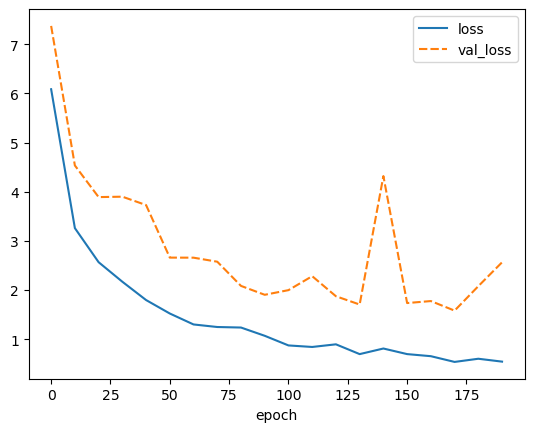

best weights loaded


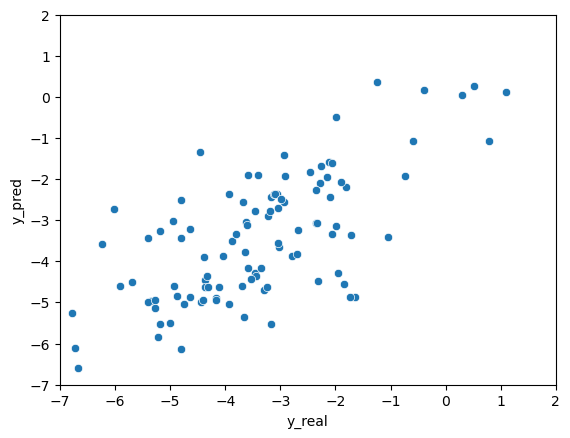

elapsed time: 48.244731426239014
run: 88
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5F64B20>, <dgl.data.utils.Subset object at 0x000002F5D92E6B20>, <dgl.data.utils.Subset object at 0x000002F5D5EC05E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  268289


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.889245478312175 | Validation Loss 7.49429726600647
Epoch 10 | Train Loss 3.6795402844746907 | Validation Loss 4.15656304359436
Epoch 20 | Train Loss 2.9227942625681558 | Validation Loss 4.308865308761597
Epoch 30 | Train Loss 2.5383132219314577 | Validation Loss 3.4719910621643066
Epoch 40 | Train Loss 2.4702754875024158 | Validation Loss 4.0516440868377686
Epoch 50 | Train Loss 2.221409551302592 | Validation Loss 2.9686818718910217
Epoch 60 | Train Loss 1.6806244214375814 | Validation Loss 2.644051432609558
Epoch 70 | Train Loss 1.7375809987386068 | Validation Loss 2.211903691291809
Epoch 80 | Train Loss 1.5168711821238199 | Validation Loss 2.001396894454956
Epoch 90 | Train Loss 1.377865735689799 | Validation Loss 3.259691596031189
Epoch 100 | Train Loss 1.2952275355656941 | Validation Loss 1.9716084599494934
Epoch 110 | Train Loss 1.1551369508107503 | Validation Loss 2.0251572132110596
Epoch 120 | Train Loss 1.1504334688186646 | Validation Loss 2.6872367858886

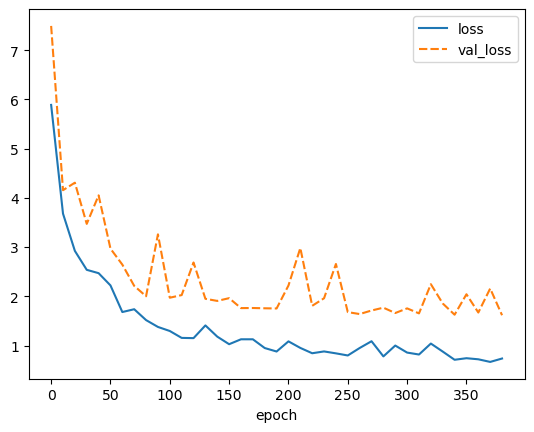

best weights loaded


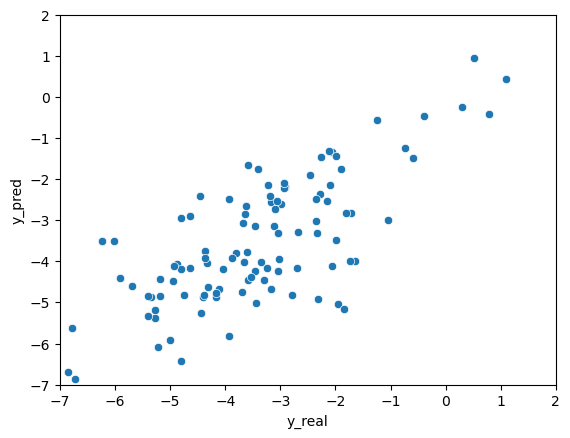

elapsed time: 88.14192914962769
run: 89
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F51EE414F0>, <dgl.data.utils.Subset object at 0x000002F5663BCBE0>, <dgl.data.utils.Subset object at 0x000002F5663BCDC0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  268289


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.333105786641439 | Validation Loss 7.0193493366241455
Epoch 10 | Train Loss 3.284698232014974 | Validation Loss 4.705118775367737
Epoch 20 | Train Loss 2.485779579480489 | Validation Loss 4.03259539604187
Epoch 30 | Train Loss 2.2474241813023883 | Validation Loss 3.575935125350952
Epoch 40 | Train Loss 1.8258853673934936 | Validation Loss 2.951680064201355
Epoch 50 | Train Loss 1.61324253877004 | Validation Loss 2.8008954524993896
Epoch 60 | Train Loss 1.700962527592977 | Validation Loss 3.824078679084778
Epoch 70 | Train Loss 1.2950651446978252 | Validation Loss 2.1597981452941895
Epoch 80 | Train Loss 1.4175028324127197 | Validation Loss 2.5966354608535767
Epoch 90 | Train Loss 1.1140032311280568 | Validation Loss 1.989549458026886
Epoch 100 | Train Loss 1.012375255425771 | Validation Loss 2.2075838446617126
Epoch 110 | Train Loss 0.9395284414291382 | Validation Loss 2.1091856956481934
Epoch 120 | Train Loss 1.0158114353815715 | Validation Loss 1.947433829307556

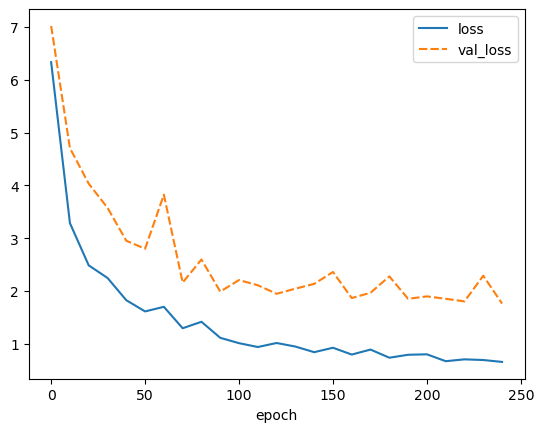

best weights loaded


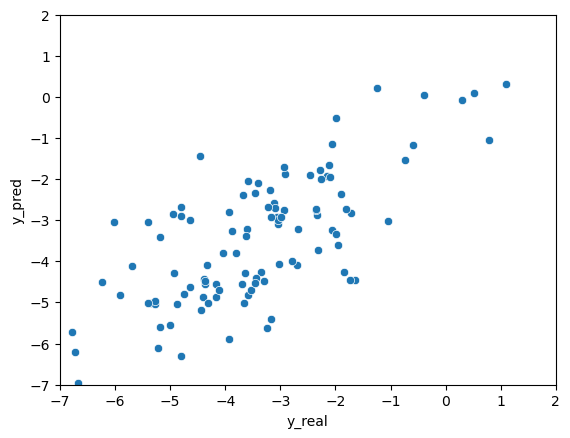

elapsed time: 59.78573203086853
run: 90
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5D28A60>, <dgl.data.utils.Subset object at 0x000002F5D6FC7FA0>, <dgl.data.utils.Subset object at 0x000002F5664D8EE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  531457


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.57041056950887 | Validation Loss 5.345263957977295
Epoch 10 | Train Loss 2.9571667035420734 | Validation Loss 4.278628826141357
Epoch 20 | Train Loss 1.9419193665186565 | Validation Loss 3.3929848670959473
Epoch 30 | Train Loss 2.201305039723714 | Validation Loss 2.4032500982284546
Epoch 40 | Train Loss 1.4294984896977743 | Validation Loss 2.36327588558197
Epoch 50 | Train Loss 1.1068021774291992 | Validation Loss 1.9026752710342407
Epoch 60 | Train Loss 1.0674439827601114 | Validation Loss 2.026625156402588
Epoch 70 | Train Loss 0.875285788377126 | Validation Loss 1.7795436382293701
Epoch 80 | Train Loss 1.0560059189796447 | Validation Loss 2.0187628269195557
Epoch 90 | Train Loss 0.6979152202606201 | Validation Loss 1.6393779516220093
Epoch 100 | Train Loss 0.628532596429189 | Validation Loss 1.8185058236122131
Epoch 110 | Train Loss 0.5669588367144267 | Validation Loss 1.8365819454193115
Epoch 120 | Train Loss 0.5391178329785665 | Validation Loss 1.51827710866

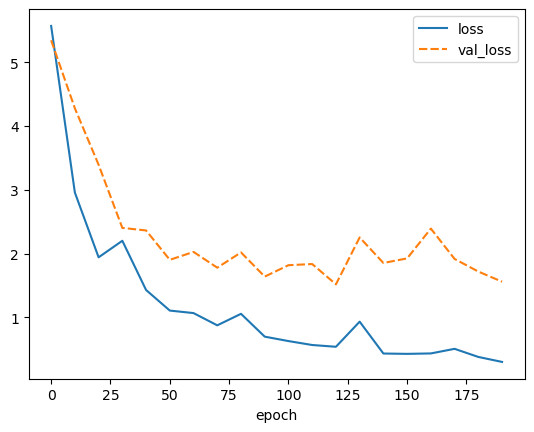

best weights loaded


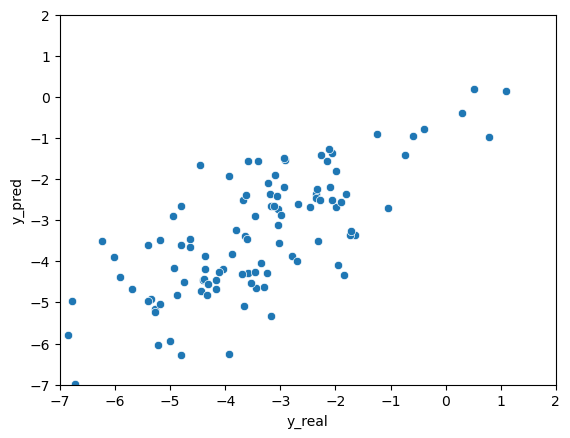

elapsed time: 57.468727827072144
run: 91
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5D28220>, <dgl.data.utils.Subset object at 0x000002F5D7261A60>, <dgl.data.utils.Subset object at 0x000002F5D7261CD0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  530945


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.172077178955078 | Validation Loss 6.194053411483765
Epoch 10 | Train Loss 3.5647356033325197 | Validation Loss 4.761253833770752
Epoch 20 | Train Loss 2.9767056624094645 | Validation Loss 4.029978394508362
Epoch 30 | Train Loss 2.1520880858103433 | Validation Loss 3.616931438446045
Epoch 40 | Train Loss 1.7391915162404379 | Validation Loss 2.621457099914551
Epoch 50 | Train Loss 1.6544248541196187 | Validation Loss 3.919649362564087
Epoch 60 | Train Loss 1.2658785422643026 | Validation Loss 2.13657283782959
Epoch 70 | Train Loss 1.2307894786198934 | Validation Loss 2.664306163787842
Epoch 80 | Train Loss 1.3011102596918742 | Validation Loss 2.1295979619026184
Epoch 90 | Train Loss 1.129083025455475 | Validation Loss 2.990012526512146
Epoch 100 | Train Loss 1.0715850869814554 | Validation Loss 2.0915659070014954
Epoch 110 | Train Loss 0.8488601764043172 | Validation Loss 2.559690833091736
Epoch 120 | Train Loss 0.7962860186894735 | Validation Loss 2.39127022027969

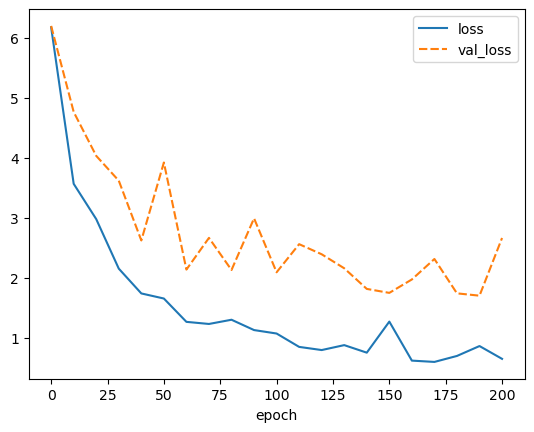

best weights loaded


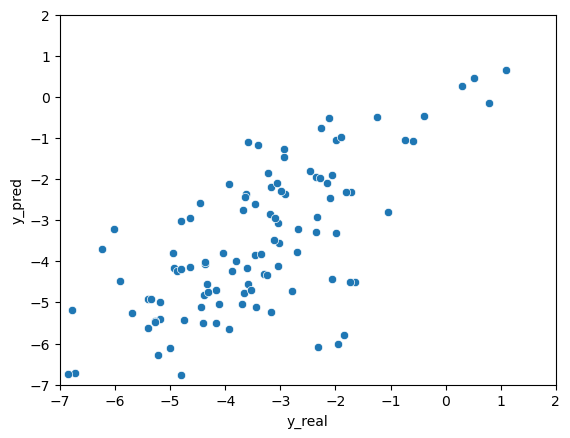

elapsed time: 59.35958409309387
run: 92
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566583280>, <dgl.data.utils.Subset object at 0x000002F56674E250>, <dgl.data.utils.Subset object at 0x000002F56674EFA0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  530945


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.276305929819743 | Validation Loss 5.147090673446655
Epoch 10 | Train Loss 2.7551814715067544 | Validation Loss 4.569255471229553
Epoch 20 | Train Loss 2.172399973869324 | Validation Loss 3.9269649982452393
Epoch 30 | Train Loss 1.9111753145853678 | Validation Loss 3.804302453994751
Epoch 40 | Train Loss 1.5196457942326864 | Validation Loss 3.4180679321289062
Epoch 50 | Train Loss 1.3579975525538126 | Validation Loss 2.278719127178192
Epoch 60 | Train Loss 1.5912052114804587 | Validation Loss 3.5853748321533203
Epoch 70 | Train Loss 0.8855922063191731 | Validation Loss 1.8356034755706787
Epoch 80 | Train Loss 1.0940584063529968 | Validation Loss 3.7693684101104736
Epoch 90 | Train Loss 0.7260751674572626 | Validation Loss 2.026527225971222
Epoch 100 | Train Loss 0.7263133565584818 | Validation Loss 1.7707767486572266
Epoch 110 | Train Loss 0.6998354911804199 | Validation Loss 1.9011829197406769
Epoch 120 | Train Loss 0.6764309386412303 | Validation Loss 1.83645617

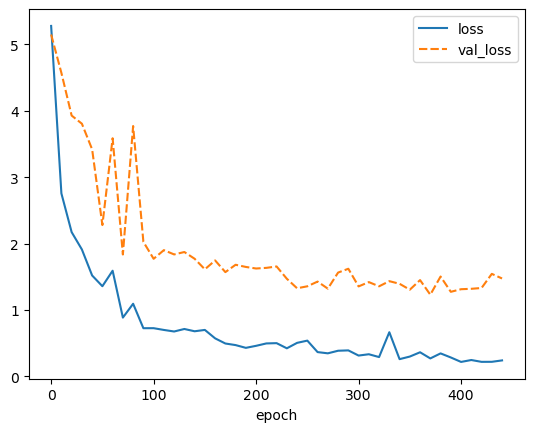

best weights loaded


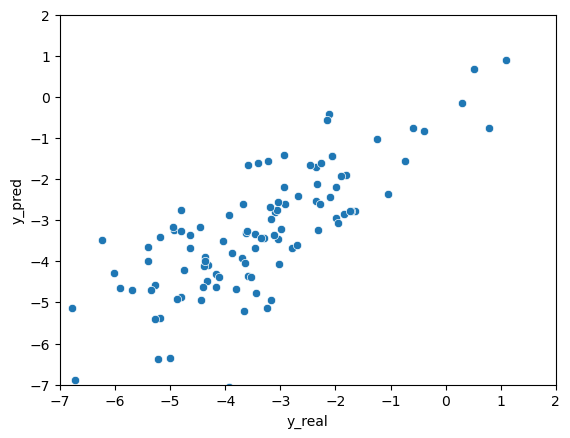

elapsed time: 118.68316435813904
run: 93
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566501490>, <dgl.data.utils.Subset object at 0x000002F5D935EC10>, <dgl.data.utils.Subset object at 0x000002F5D935EE80>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.392179934183757 | Validation Loss 5.952134609222412
Epoch 10 | Train Loss 2.9941375573476154 | Validation Loss 4.129997491836548
Epoch 20 | Train Loss 2.342135453224182 | Validation Loss 3.5315558910369873
Epoch 30 | Train Loss 1.7978655735651652 | Validation Loss 2.4357837438583374
Epoch 40 | Train Loss 1.0295830607414245 | Validation Loss 2.3901556730270386
Epoch 50 | Train Loss 1.0734341144561768 | Validation Loss 3.158355474472046
Epoch 60 | Train Loss 0.9167412837346395 | Validation Loss 1.8499410152435303
Epoch 70 | Train Loss 0.9891850471496582 | Validation Loss 1.7526260018348694
Epoch 80 | Train Loss 0.6672223846117655 | Validation Loss 2.1594064235687256
Epoch 90 | Train Loss 0.6173356990019481 | Validation Loss 1.8140061497688293
Epoch 100 | Train Loss 0.5700449675321579 | Validation Loss 1.794334053993225
Epoch 110 | Train Loss 0.5376297016938527 | Validation Loss 1.5780407786369324
Epoch 120 | Train Loss 0.5100300133228302 | Validation Loss 1.7493143

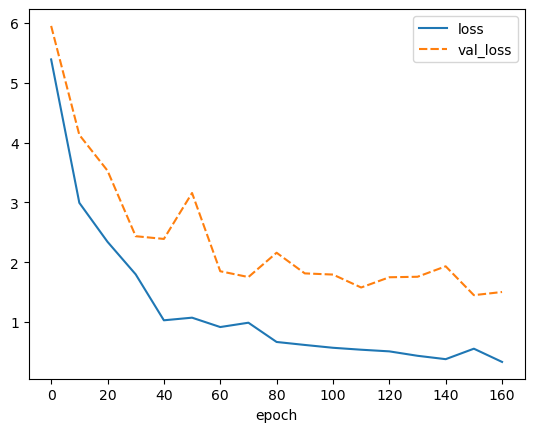

best weights loaded


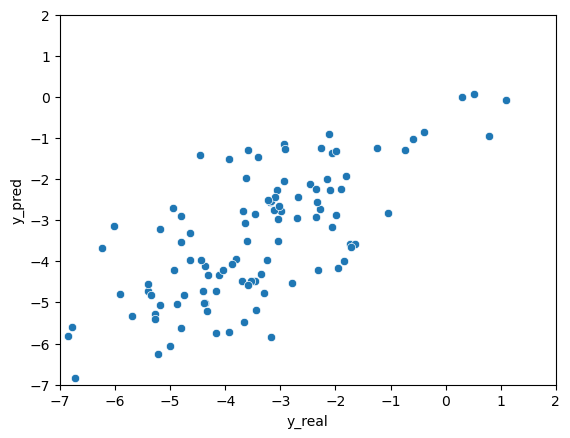

elapsed time: 54.04732584953308
run: 94
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566759280>, <dgl.data.utils.Subset object at 0x000002F566239BE0>, <dgl.data.utils.Subset object at 0x000002F566239460>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.281142139434815 | Validation Loss 6.413945436477661
Epoch 10 | Train Loss 2.5723173300425213 | Validation Loss 6.712869644165039
Epoch 20 | Train Loss 2.6445910692214967 | Validation Loss 2.8079930543899536
Epoch 30 | Train Loss 1.6934791723887126 | Validation Loss 2.3235036730766296
Epoch 40 | Train Loss 1.4471424698829651 | Validation Loss 2.434917449951172
Epoch 50 | Train Loss 1.3115486264228822 | Validation Loss 2.159362554550171
Epoch 60 | Train Loss 1.4425510068734486 | Validation Loss 2.1662193536758423
Epoch 70 | Train Loss 0.9958810389041901 | Validation Loss 1.8889608979225159
Epoch 80 | Train Loss 1.0863446176052094 | Validation Loss 1.7300578951835632
Epoch 90 | Train Loss 1.0142685810724894 | Validation Loss 1.7710343599319458
Epoch 100 | Train Loss 0.9238508621851603 | Validation Loss 5.544610500335693
Epoch 110 | Train Loss 0.7390464017788569 | Validation Loss 1.7240992784500122
Epoch 120 | Train Loss 0.6633205711841583 | Validation Loss 2.1188965

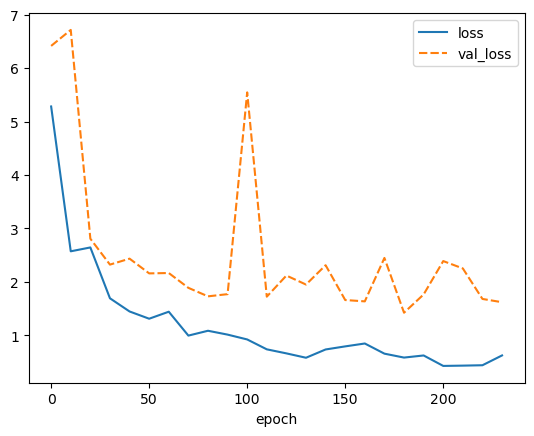

best weights loaded


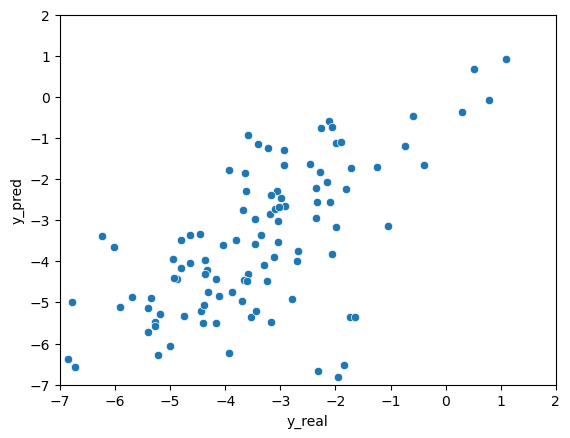

elapsed time: 74.51984000205994
run: 95
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5DE0550>, <dgl.data.utils.Subset object at 0x000002F522EE8610>, <dgl.data.utils.Subset object at 0x000002F522EE8490>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.354712931315104 | Validation Loss 4.717737436294556
Epoch 10 | Train Loss 3.0367062727610272 | Validation Loss 4.056332111358643
Epoch 20 | Train Loss 2.113501191139221 | Validation Loss 3.513658881187439
Epoch 30 | Train Loss 1.8027012904485067 | Validation Loss 4.1941077709198
Epoch 40 | Train Loss 1.3309707005818685 | Validation Loss 2.7863279581069946
Epoch 50 | Train Loss 1.0446754535039267 | Validation Loss 2.3066391944885254
Epoch 60 | Train Loss 0.9307840983072917 | Validation Loss 1.9875290989875793
Epoch 70 | Train Loss 0.9655680855115255 | Validation Loss 2.144748091697693
Epoch 80 | Train Loss 0.7512043674786886 | Validation Loss 2.397502303123474
Epoch 90 | Train Loss 0.7274940848350525 | Validation Loss 1.8306815028190613
Epoch 100 | Train Loss 0.6337849656740825 | Validation Loss 1.6791594624519348
Epoch 110 | Train Loss 0.5040454516808192 | Validation Loss 2.1745075583457947
Epoch 120 | Train Loss 0.49808507760365806 | Validation Loss 1.7946072816

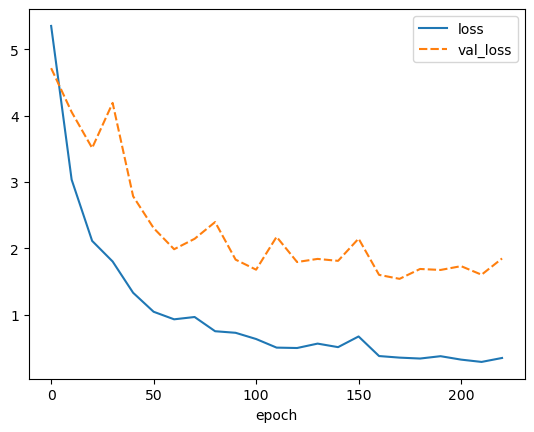

best weights loaded


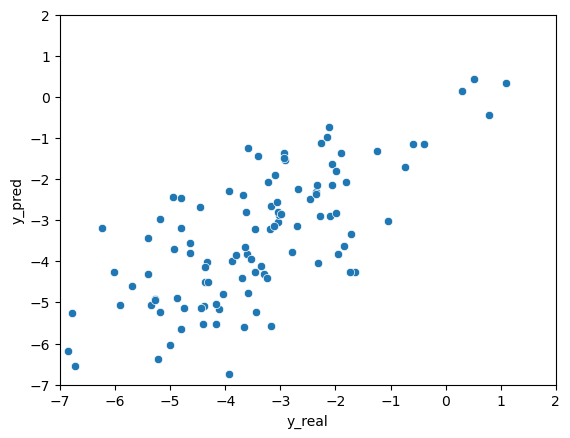

elapsed time: 74.26049518585205
run: 96
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F522ECE400>, <dgl.data.utils.Subset object at 0x000002F5D5DFC3D0>, <dgl.data.utils.Subset object at 0x000002F5D5DFC640>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  6145


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.460893535614014 | Validation Loss 4.721304893493652
Epoch 10 | Train Loss 3.3053714116414388 | Validation Loss 4.2501091957092285
Epoch 20 | Train Loss 2.996780840555827 | Validation Loss 4.3329176902771
Epoch 30 | Train Loss 2.7062415281931558 | Validation Loss 4.220370411872864
Epoch 40 | Train Loss 2.5123700141906737 | Validation Loss 4.047242879867554
Epoch 50 | Train Loss 2.2644894043604533 | Validation Loss 3.8894773721694946
Epoch 60 | Train Loss 2.0091598550478618 | Validation Loss 3.786988139152527
Epoch 70 | Train Loss 2.065835404396057 | Validation Loss 3.602694511413574
Epoch 80 | Train Loss 1.9240055243174234 | Validation Loss 3.3813083171844482
Epoch 90 | Train Loss 1.8749874194463094 | Validation Loss 3.239850401878357
Epoch 100 | Train Loss 1.7215201218922933 | Validation Loss 3.260163426399231
Epoch 110 | Train Loss 1.664340321222941 | Validation Loss 3.0324596166610718
Epoch 120 | Train Loss 1.5708036820093791 | Validation Loss 2.745624423027038

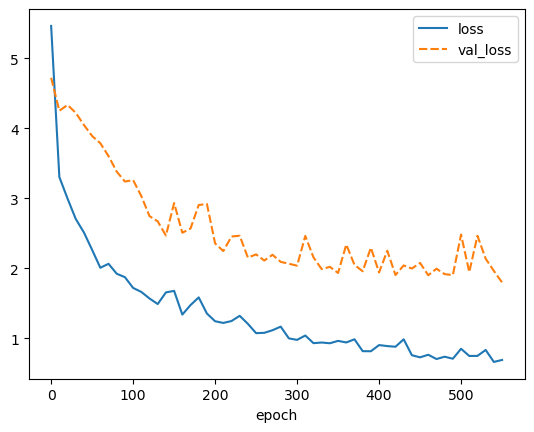

best weights loaded


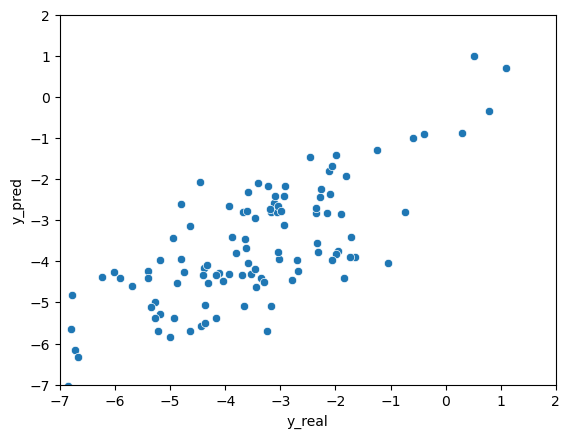

elapsed time: 114.96953773498535
run: 97
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5664188B0>, <dgl.data.utils.Subset object at 0x000002F5663695E0>, <dgl.data.utils.Subset object at 0x000002F5663697F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  5633


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.394847885767619 | Validation Loss 4.96381151676178
Epoch 10 | Train Loss 3.8304225126902263 | Validation Loss 4.383811712265015
Epoch 20 | Train Loss 3.739187542597453 | Validation Loss 4.515052795410156
Epoch 30 | Train Loss 3.3901585578918456 | Validation Loss 4.327801465988159
Epoch 40 | Train Loss 3.215804688135783 | Validation Loss 4.7202208042144775
Epoch 50 | Train Loss 3.041636085510254 | Validation Loss 4.040412783622742
Epoch 60 | Train Loss 3.0208436012268067 | Validation Loss 4.219944715499878
Epoch 70 | Train Loss 2.7632538159688314 | Validation Loss 4.245787858963013
Epoch 80 | Train Loss 2.689856831232707 | Validation Loss 3.930233359336853
Epoch 90 | Train Loss 2.7231632232666017 | Validation Loss 4.267172813415527
Epoch 100 | Train Loss 2.8343285163243612 | Validation Loss 3.6742721796035767
Epoch 110 | Train Loss 2.6925907452901203 | Validation Loss 4.041872024536133
Epoch 120 | Train Loss 2.413608916600545 | Validation Loss 3.81680691242218
Epo

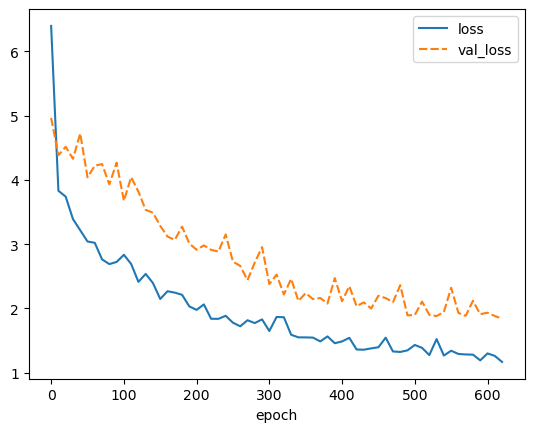

best weights loaded


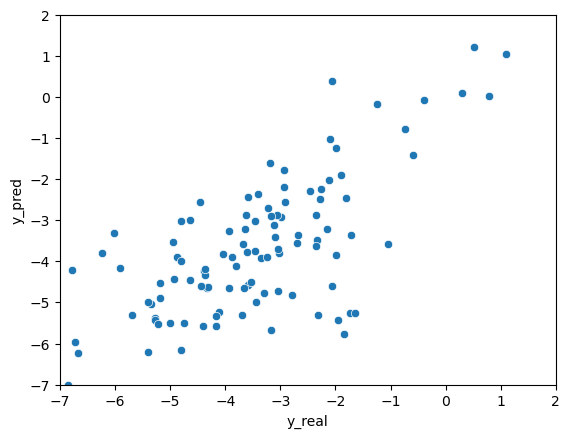

elapsed time: 126.30165219306946
run: 98
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D7242E80>, <dgl.data.utils.Subset object at 0x000002F566514D30>, <dgl.data.utils.Subset object at 0x000002F566514220>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  5633


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.240368684132894 | Validation Loss 4.749961614608765
Epoch 10 | Train Loss 3.3634606838226317 | Validation Loss 4.7378928661346436
Epoch 20 | Train Loss 3.256433931986491 | Validation Loss 4.4295055866241455
Epoch 30 | Train Loss 3.211833349863688 | Validation Loss 4.260161995887756
Epoch 40 | Train Loss 3.0091402769088744 | Validation Loss 4.602925777435303
Epoch 50 | Train Loss 2.627226463953654 | Validation Loss 4.214840412139893
Epoch 60 | Train Loss 2.4162627935409544 | Validation Loss 3.865439295768738
Epoch 70 | Train Loss 2.535336172580719 | Validation Loss 3.884578824043274
Epoch 80 | Train Loss 2.2421523571014403 | Validation Loss 3.6608290672302246
Epoch 90 | Train Loss 2.551069990793864 | Validation Loss 3.7390451431274414
Epoch 100 | Train Loss 2.040095778306325 | Validation Loss 3.40845263004303
Epoch 110 | Train Loss 2.1395307938257853 | Validation Loss 3.3721576929092407
Epoch 120 | Train Loss 1.906940221786499 | Validation Loss 3.4680304527282715


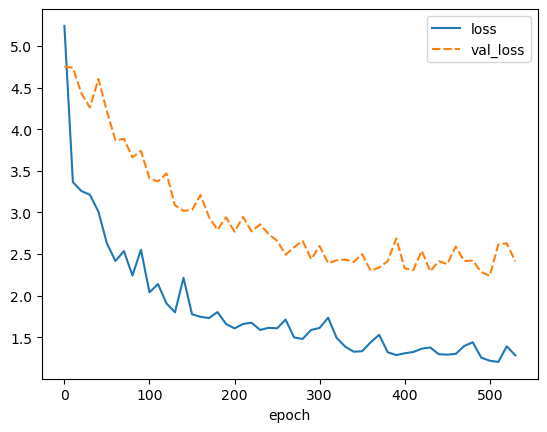

best weights loaded


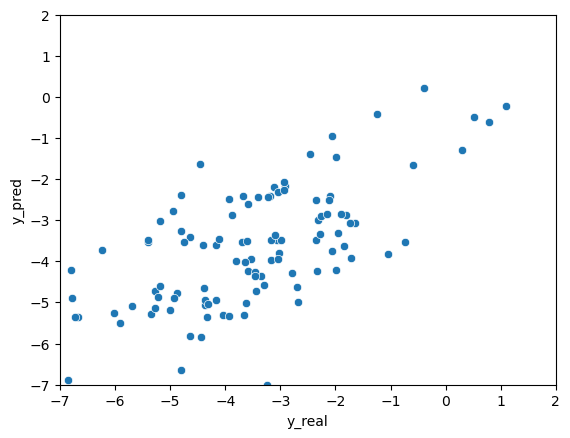

elapsed time: 104.8253436088562
run: 99
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5665579D0>, <dgl.data.utils.Subset object at 0x000002F5D5D46CD0>, <dgl.data.utils.Subset object at 0x000002F5D5D46C40>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  268801


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.025363842646281 | Validation Loss 7.2607502937316895
Epoch 10 | Train Loss 3.306340726216634 | Validation Loss 4.048226475715637
Epoch 20 | Train Loss 2.411503537495931 | Validation Loss 3.957685351371765
Epoch 30 | Train Loss 2.09782501856486 | Validation Loss 3.4010661840438843
Epoch 40 | Train Loss 2.44465921719869 | Validation Loss 3.476060390472412
Epoch 50 | Train Loss 1.7696959137916566 | Validation Loss 4.366774916648865
Epoch 60 | Train Loss 1.5167040745417277 | Validation Loss 2.5412198305130005
Epoch 70 | Train Loss 1.3924036741256713 | Validation Loss 2.870175361633301
Epoch 80 | Train Loss 1.8430222193400065 | Validation Loss 2.754744529724121
Epoch 90 | Train Loss 1.0692598462104796 | Validation Loss 2.2291051149368286
Epoch 100 | Train Loss 1.1132836143175762 | Validation Loss 1.9834312796592712
Epoch 110 | Train Loss 0.8747211337089539 | Validation Loss 1.899929404258728
Epoch 120 | Train Loss 0.8102204481760661 | Validation Loss 2.37980055809021


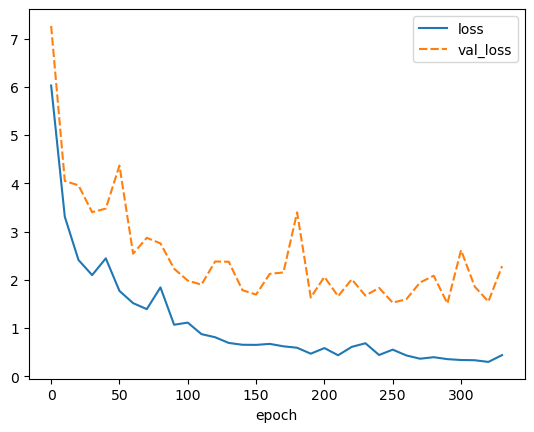

best weights loaded


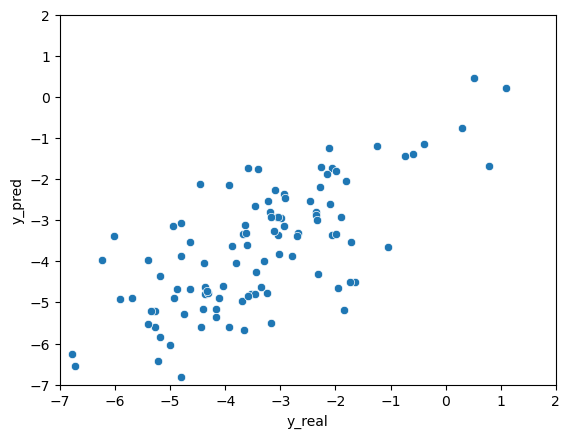

elapsed time: 77.89772081375122
run: 100
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5664A3370>, <dgl.data.utils.Subset object at 0x000002F5D9373340>, <dgl.data.utils.Subset object at 0x000002F5D9373DF0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  268289


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.531990003585816 | Validation Loss 7.265436887741089
Epoch 10 | Train Loss 3.519010639190674 | Validation Loss 4.829875946044922
Epoch 20 | Train Loss 2.890055799484253 | Validation Loss 3.8256064653396606
Epoch 30 | Train Loss 2.254103167851766 | Validation Loss 3.160058856010437
Epoch 40 | Train Loss 2.0258532603581747 | Validation Loss 2.693939208984375
Epoch 50 | Train Loss 1.5975584030151366 | Validation Loss 2.4195141792297363
Epoch 60 | Train Loss 1.694416077931722 | Validation Loss 1.9892221689224243
Epoch 70 | Train Loss 1.4022323846817017 | Validation Loss 1.9387022256851196
Epoch 80 | Train Loss 1.3583762526512146 | Validation Loss 2.1945229172706604
Epoch 90 | Train Loss 1.4225667595863343 | Validation Loss 1.9919636845588684
Epoch 100 | Train Loss 1.2257449865341186 | Validation Loss 2.062167763710022
Epoch 110 | Train Loss 1.357360593477885 | Validation Loss 1.7515215873718262
Epoch 120 | Train Loss 1.5272137562433878 | Validation Loss 2.119179069995

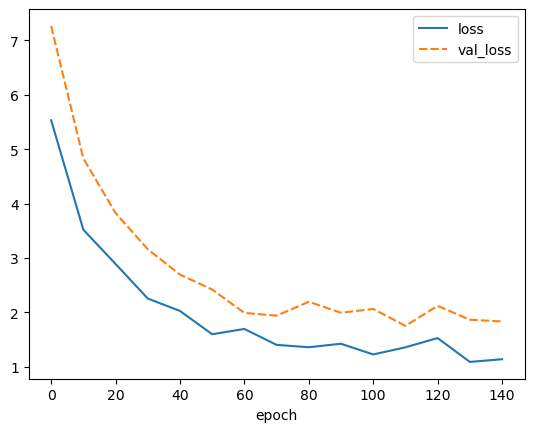

best weights loaded


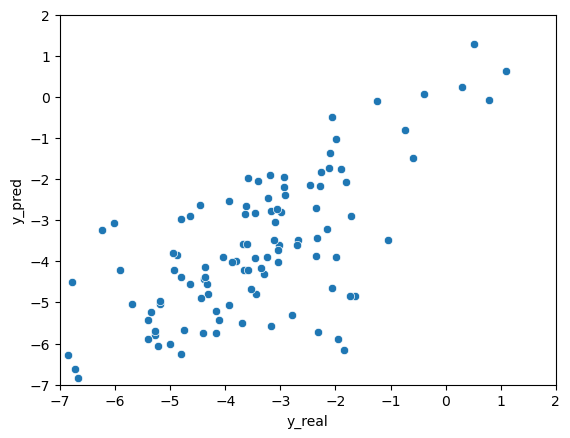

elapsed time: 37.49506878852844
run: 101
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D70FD3A0>, <dgl.data.utils.Subset object at 0x000002F566241D90>, <dgl.data.utils.Subset object at 0x000002F566241E50>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  268289


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.45991248289744 | Validation Loss 7.978283643722534
Epoch 10 | Train Loss 3.262957239151001 | Validation Loss 4.283355951309204
Epoch 20 | Train Loss 2.495846172173818 | Validation Loss 5.013293743133545
Epoch 30 | Train Loss 2.1914851029713946 | Validation Loss 3.7416911125183105
Epoch 40 | Train Loss 1.856033726533254 | Validation Loss 3.346437692642212
Epoch 50 | Train Loss 1.6132921775182087 | Validation Loss 2.9069292545318604
Epoch 60 | Train Loss 1.3777043958504995 | Validation Loss 2.5976853370666504
Epoch 70 | Train Loss 1.3183808008829752 | Validation Loss 2.2748184204101562
Epoch 80 | Train Loss 1.3036721289157867 | Validation Loss 2.1349955797195435
Epoch 90 | Train Loss 1.1589329918225606 | Validation Loss 2.126424729824066
Epoch 100 | Train Loss 1.110817281405131 | Validation Loss 2.075383424758911
Epoch 110 | Train Loss 0.9446105321248373 | Validation Loss 1.9817993640899658
Epoch 120 | Train Loss 1.0135783831278482 | Validation Loss 1.9011446833610

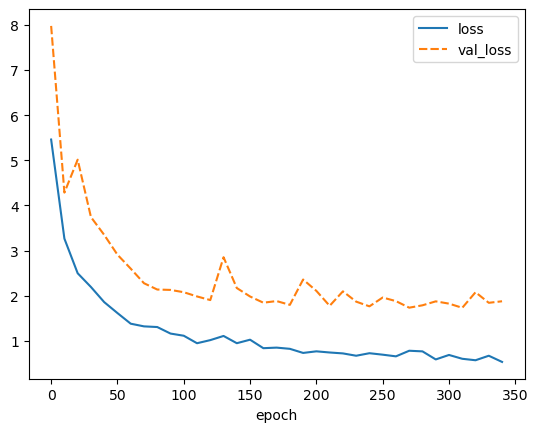

best weights loaded


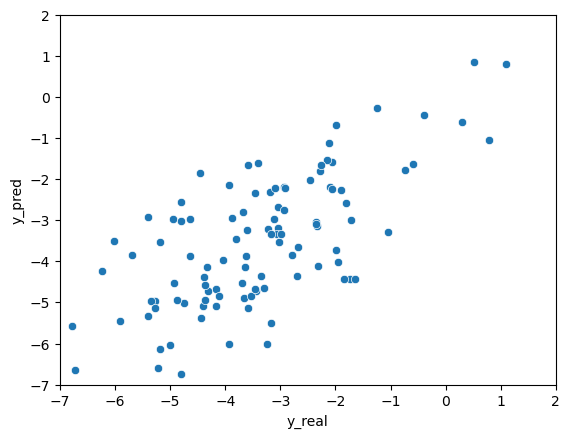

elapsed time: 80.63839054107666
run: 102
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566778220>, <dgl.data.utils.Subset object at 0x000002F56613C2B0>, <dgl.data.utils.Subset object at 0x000002F56613C6D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  531457


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.554416449864705 | Validation Loss 5.344034910202026
Epoch 10 | Train Loss 2.890693211555481 | Validation Loss 3.9995068311691284
Epoch 20 | Train Loss 1.9222558657328288 | Validation Loss 3.128193736076355
Epoch 30 | Train Loss 1.5843912045160928 | Validation Loss 2.5703080892562866
Epoch 40 | Train Loss 1.3886338273684184 | Validation Loss 2.7843241691589355
Epoch 50 | Train Loss 1.203202740351359 | Validation Loss 2.189608097076416
Epoch 60 | Train Loss 1.1778778990109762 | Validation Loss 2.0476917028427124
Epoch 70 | Train Loss 1.5292384505271912 | Validation Loss 2.2752097249031067
Epoch 80 | Train Loss 0.7490868687629699 | Validation Loss 1.7038747072219849
Epoch 90 | Train Loss 0.7802765965461731 | Validation Loss 1.8143550157546997
Epoch 100 | Train Loss 1.0917556951443355 | Validation Loss 1.6304421424865723
Epoch 110 | Train Loss 0.6298066775004069 | Validation Loss 2.1310824155807495
Epoch 120 | Train Loss 0.5181450764338176 | Validation Loss 1.7147697

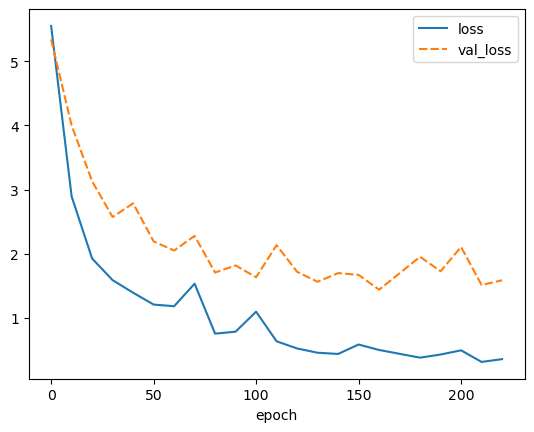

best weights loaded


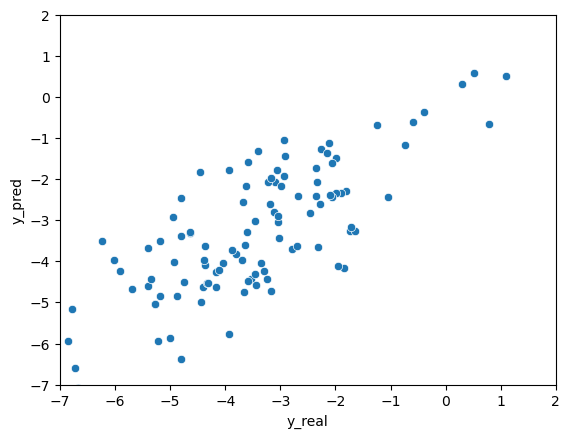

elapsed time: 58.11202383041382
run: 103
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D5E11310>, <dgl.data.utils.Subset object at 0x000002F5D9335370>, <dgl.data.utils.Subset object at 0x000002F5D93355E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  530945


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.583628416061401 | Validation Loss 6.0596604347229
Epoch 10 | Train Loss 3.218082038561503 | Validation Loss 4.042687177658081
Epoch 20 | Train Loss 2.04933762550354 | Validation Loss 2.9708532094955444
Epoch 30 | Train Loss 2.279750386873881 | Validation Loss 3.0849339962005615
Epoch 40 | Train Loss 2.0151682058970133 | Validation Loss 2.1075428128242493
Epoch 50 | Train Loss 1.7386407136917115 | Validation Loss 3.3814382553100586
Epoch 60 | Train Loss 1.4029529174168904 | Validation Loss 2.7099488973617554
Epoch 70 | Train Loss 1.3395522157351176 | Validation Loss 2.33376944065094
Epoch 80 | Train Loss 1.3169200817743938 | Validation Loss 1.9099847078323364
Epoch 90 | Train Loss 1.263690960407257 | Validation Loss 3.2852638959884644
Epoch 100 | Train Loss 1.0028262575467428 | Validation Loss 1.8112521767616272
Epoch 110 | Train Loss 0.9075107018152873 | Validation Loss 2.00589656829834
Epoch 120 | Train Loss 0.9485897342363994 | Validation Loss 1.737474262714386

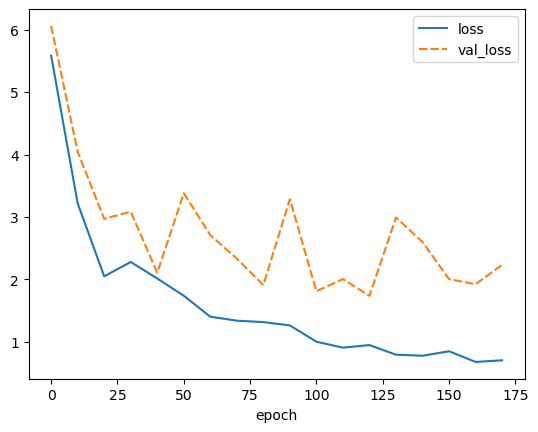

best weights loaded


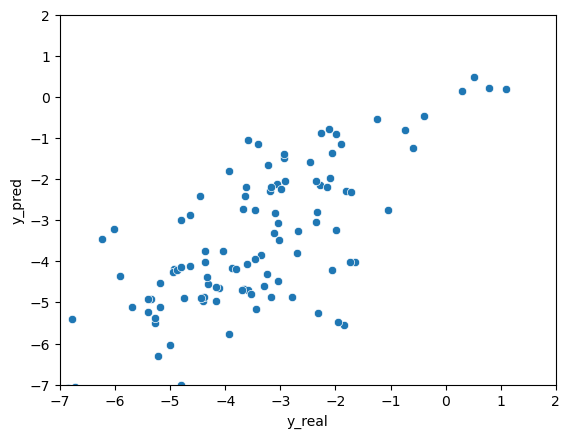

elapsed time: 43.55951929092407
run: 104
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F566775100>, <dgl.data.utils.Subset object at 0x000002F5D7092310>, <dgl.data.utils.Subset object at 0x000002F5660D2970>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  530945


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.421030553181966 | Validation Loss 4.980792760848999
Epoch 10 | Train Loss 3.0602563619613647 | Validation Loss 5.247233152389526
Epoch 20 | Train Loss 2.3325878143310548 | Validation Loss 3.6485795974731445
Epoch 30 | Train Loss 2.0876633882522584 | Validation Loss 3.2617474794387817
Epoch 40 | Train Loss 1.5964135567347209 | Validation Loss 4.458087682723999
Epoch 50 | Train Loss 1.280539858341217 | Validation Loss 2.430075764656067
Epoch 60 | Train Loss 1.1623116890589396 | Validation Loss 2.0680999755859375
Epoch 70 | Train Loss 0.9472734530766805 | Validation Loss 1.928359866142273
Epoch 80 | Train Loss 0.8876108209292094 | Validation Loss 1.8868622779846191
Epoch 90 | Train Loss 0.8803676764170328 | Validation Loss 1.8037627935409546
Epoch 100 | Train Loss 0.7099922180175782 | Validation Loss 1.8111523389816284
Epoch 110 | Train Loss 0.6546075244744619 | Validation Loss 2.104733407497406
Epoch 120 | Train Loss 0.6234814683596294 | Validation Loss 1.697977960

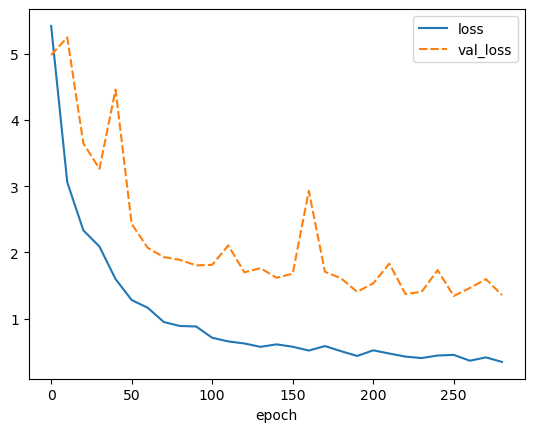

best weights loaded


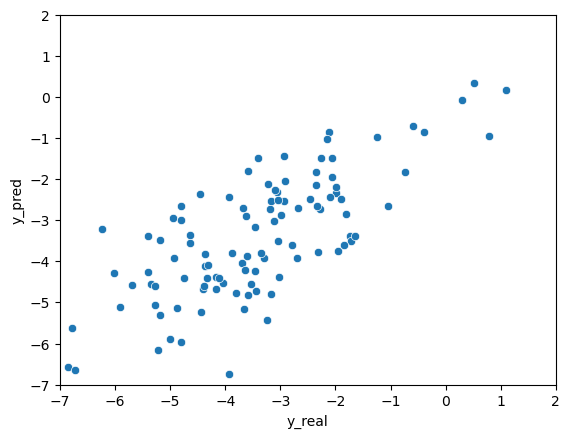

elapsed time: 74.22773504257202
run: 105
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>, <function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5664C78B0>, <dgl.data.utils.Subset object at 0x000002F5D5D64C70>, <dgl.data.utils.Subset object at 0x000002F5D5D64A60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.408862829208374 | Validation Loss 4.472600936889648
Epoch 10 | Train Loss 2.7720427672068277 | Validation Loss 4.459078073501587
Epoch 20 | Train Loss 2.219077738126119 | Validation Loss 4.017756938934326
Epoch 30 | Train Loss 1.7004103342692056 | Validation Loss 3.019769310951233
Epoch 40 | Train Loss 1.2345266660054526 | Validation Loss 1.9697726964950562
Epoch 50 | Train Loss 1.0972707311312357 | Validation Loss 1.852449119091034
Epoch 60 | Train Loss 1.4273903727531434 | Validation Loss 1.7410590648651123
Epoch 70 | Train Loss 1.0868275552988051 | Validation Loss 3.9147753715515137
Epoch 80 | Train Loss 0.7381093978881836 | Validation Loss 1.6369823813438416
Epoch 90 | Train Loss 0.7427487134933471 | Validation Loss 1.612991988658905
Epoch 100 | Train Loss 0.5767943600813548 | Validation Loss 2.142865300178528
Epoch 110 | Train Loss 0.5352640410264333 | Validation Loss 1.6345064640045166
Epoch 120 | Train Loss 0.5271596173445384 | Validation Loss 1.7150375843

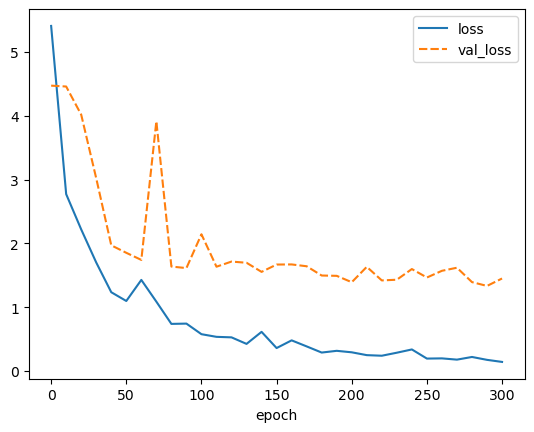

best weights loaded


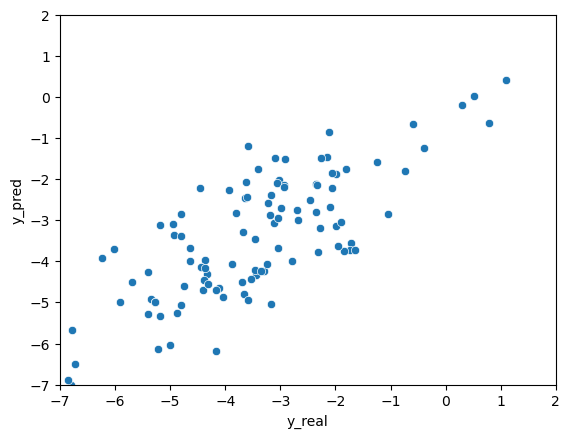

elapsed time: 88.35202956199646
run: 106
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002F561541C10>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5661D94F0>, <dgl.data.utils.Subset object at 0x000002F5D5E516D0>, <dgl.data.utils.Subset object at 0x000002F5D5E514C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.4663875261942545 | Validation Loss 4.55672550201416
Epoch 10 | Train Loss 2.9376121679941813 | Validation Loss 4.80694317817688
Epoch 20 | Train Loss 2.9321783622105917 | Validation Loss 3.865453004837036
Epoch 30 | Train Loss 2.1330948193868 | Validation Loss 4.327919840812683
Epoch 40 | Train Loss 1.6660350640614827 | Validation Loss 2.2081708908081055
Epoch 50 | Train Loss 1.3772466739018758 | Validation Loss 3.2199103832244873
Epoch 60 | Train Loss 0.9969750722249349 | Validation Loss 2.0211533904075623
Epoch 70 | Train Loss 1.050253732999166 | Validation Loss 2.362581253051758
Epoch 80 | Train Loss 0.9262996097405751 | Validation Loss 1.8401841521263123
Epoch 90 | Train Loss 1.0005698323249816 | Validation Loss 2.8560363054275513
Epoch 100 | Train Loss 1.0427436113357544 | Validation Loss 3.077054262161255
Epoch 110 | Train Loss 1.0571329553922018 | Validation Loss 2.575263261795044
Epoch 120 | Train Loss 0.6142124970753987 | Validation Loss 1.73464536666870

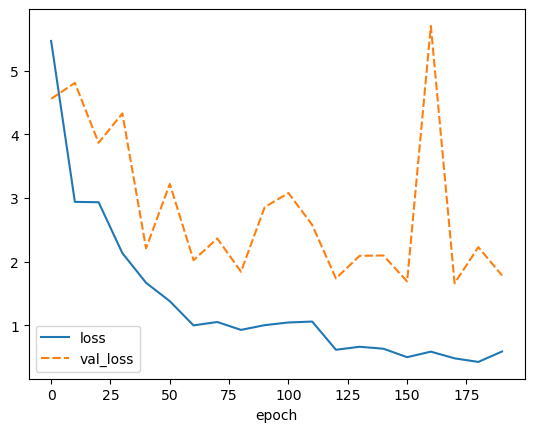

best weights loaded


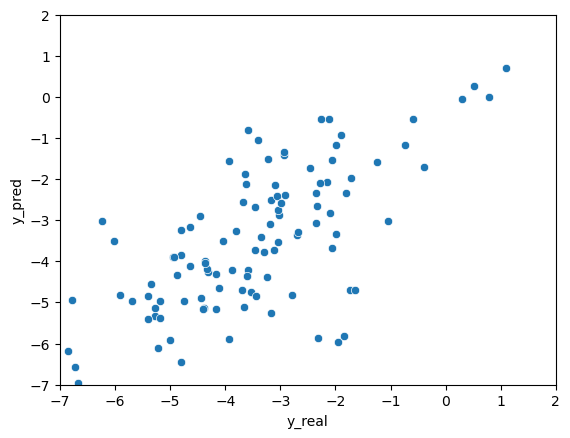

elapsed time: 55.71765351295471
run: 107
{'hidden_channels_list': [512], 'linear_sizes_list': [512, 256], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002F5615575E0>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002F5D7247F10>, <dgl.data.utils.Subset object at 0x000002F56653D940>, <dgl.data.utils.Subset object at 0x000002F56653DFD0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.340437221527099 | Validation Loss 4.568132638931274
Epoch 10 | Train Loss 3.0383296330769856 | Validation Loss 4.355946063995361
Epoch 20 | Train Loss 2.299736913045247 | Validation Loss 3.6122684478759766
Epoch 30 | Train Loss 1.9233312527338664 | Validation Loss 3.2200114727020264
Epoch 40 | Train Loss 1.479011599222819 | Validation Loss 2.5180100202560425
Epoch 50 | Train Loss 1.3384421149889627 | Validation Loss 2.7254514694213867
Epoch 60 | Train Loss 1.0863545219103494 | Validation Loss 2.4705694913864136
Epoch 70 | Train Loss 0.958579542239507 | Validation Loss 2.867590546607971
Epoch 80 | Train Loss 0.8725474357604981 | Validation Loss 1.9955087304115295
Epoch 90 | Train Loss 0.7736611942450206 | Validation Loss 2.030933380126953
Epoch 100 | Train Loss 0.7291077593962352 | Validation Loss 2.2046828269958496
Epoch 110 | Train Loss 0.6596957623958588 | Validation Loss 1.9056081771850586
Epoch 120 | Train Loss 0.6627462267875671 | Validation Loss 1.879678249

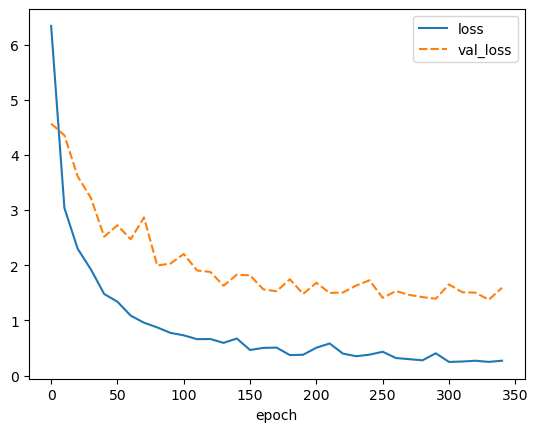

best weights loaded


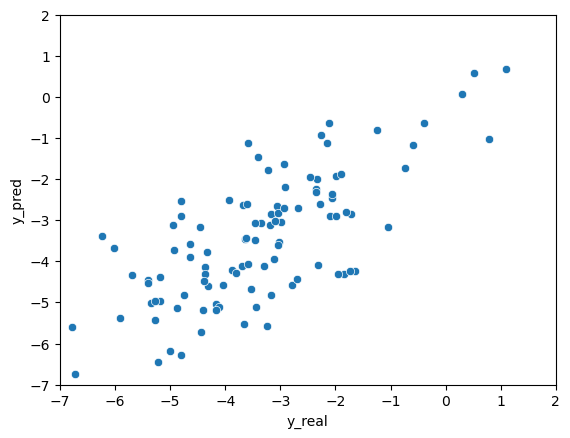

elapsed time: 95.1283450126648


In [13]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()

    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 



    if create_new_data:
        data, data_y = load_esol()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, apply_scaffold_split = apply_scaffold_split )
        loader, test_loader, val_loader = create_dataloader(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_reg_esol.pkl'
        else: 
            loader_file = 'datasets_reg_esol.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders


        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(morgan_data_val, 
                                    batch_size=batch_size, shuffle=True)

        else:
            loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, val_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)


    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #regression
    save_dict["mean_mse"] = mean_mse
    save_dict["mean_l1"] = mean_l1

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names
    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp
        
    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    save_dict["losses"] = losses
    save_dict["val_losses"] = val_losses

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    